In [42]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl


import neuro_morpho_toolbox as nmt
%matplotlib inline
import pickle
pickle_in = open("/home/penglab/FeaCal/all_ns.pickle","rb")
[ns] = pickle.load(pickle_in)


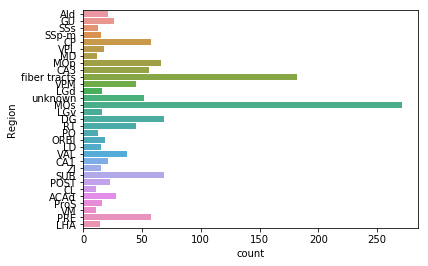

In [46]:
sf = ns.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>10])],
                 )

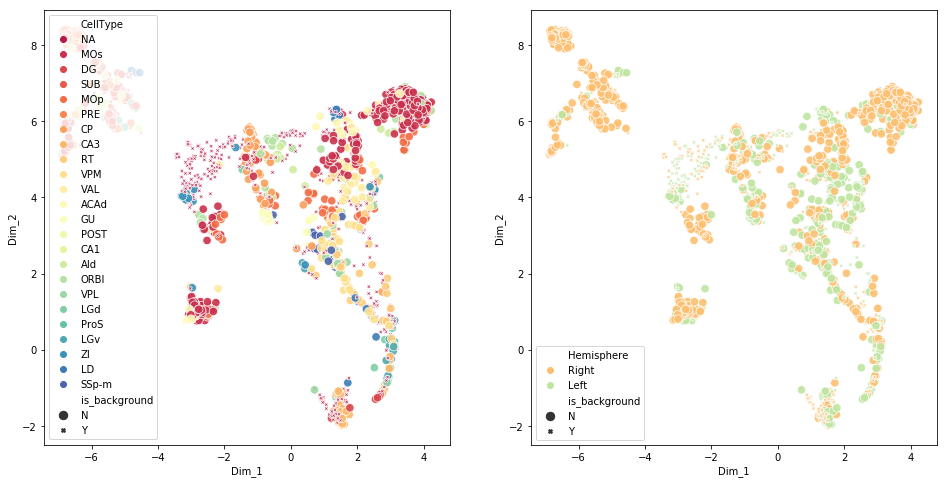

In [47]:
_ = ns.ReduceDimUMAP(feature_set="projection_features", n_neighbors=100)
_ = ns.FeatureScatter(["CellType", "Hemisphere"], map="UMAP")

In [51]:
id_to_name(nmt.bs,int(9))

'SSp-tr6a'

In [48]:
def id_to_name(self, region_ID):
        # region_name can be either Abbreviation (checked first) or description
        if region_ID in self.level.index.tolist():
            return self.level.loc[region_ID,'Abbreviation']
        else:
            print("Cannot find any regions with ID %s." % region_ID)

In [59]:
print('\n')

In [55]:
import multiprocessing
import time
def Contour_Matrix(RegionID, M_reg, M_contour, co_1_in, co_2_in, co_3_in):
    # M_reg is the matrix mask, 1 for point outside the region
    M_contour = nmt.annotation.array.copy()
    M_contour[:,:,:] = 0
    count_p = 0
    for iter_pixel in range(len(co_1_in)):
        #print(iter_pixel)
        #print((co_1[iter_pixel],co_2[iter_pixel],co_3[iter_pixel]))
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        assert M_mask.shape == nmt.annotation.array.shape
        M_mask[max(0,co_1_in[iter_pixel]-1),co_2_in[iter_pixel],co_3_in[iter_pixel]]=1                 # -1,0,0
        M_mask[min(M_mask.shape[0]-1,co_1_in[iter_pixel]+1),co_2_in[iter_pixel],co_3_in[iter_pixel]]=1 # +1,0,0
        M_mask[co_1_in[iter_pixel],max(0,co_2_in[iter_pixel]-1),co_3_in[iter_pixel]]=1# 0,-1,0
        M_mask[co_1_in[iter_pixel],min(M_mask.shape[1]-1,co_2_in[iter_pixel]+1),co_3_in[iter_pixel]]=1 # 0,+1,0
        M_mask[co_1_in[iter_pixel],co_2_in[iter_pixel],max(0,co_3_in[iter_pixel]-1)]=1# 0,0,-1
        M_mask[co_1_in[iter_pixel],co_2_in[iter_pixel],min(M_mask.shape[2]-1,co_3_in[iter_pixel]+1)]=1 # 0,0,+1
        assert M_mask.shape == nmt.annotation.array.shape
        M_contour[co_1_in[iter_pixel],co_2_in[iter_pixel],co_3_in[iter_pixel]]=np.sum(np.sum(np.multiply(M_reg,M_mask)))>0
        #print((co_1_in[iter_pixel],co_2_in[iter_pixel],co_3_in[iter_pixel]))
        count_p = count_p + int(np.sum(np.sum(np.multiply(M_reg,M_mask)))>0)
        #print('Number of vertices: '+ str(count_p))
        if np.sum(M_contour)%10 == 0:
            print('The contour of region '+ str(id_to_name(nmt.bs,int(RegionID))) + ' has '+ str(np.sum(M_contour)) + ' vertices now')
        #print(type(M_contour))
    return M_contour.copy()

corenum = 24
Regtype, Regcount = np.unique(nmt.annotation.array, return_counts=True) 

ContourDic = {}

for iterReg in Regtype[::-1]:
    start = time.perf_counter ()
    start=time.time()
    cores = corenum#multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cores)
    M_region = nmt.annotation.array != iterReg  # a np.ndarray
    co_1,co_2,co_3 = np.where(nmt.annotation.array == iterReg) 
    borderM = nmt.annotation.array.copy()
    borderM[:,:,:] = 0
    pool_list=[]
    result_list=[]
    pool_list.append(pool.apply_async(Contour_Matrix, (iterReg,M_region,borderM, co_1, co_2, co_3)))
        # 这里不能 get， 会阻塞进程

    #pool.apply_async之后的语句都是阻塞执行的，
    #调用 result.get() 会等待上一个任务执行完之后才会分配下一个任务。
    #事实上，获取返回值的过程最好放在进程池回收之后进行，避免阻塞后面的语句。
    result_list=[xx.get() for xx in pool_list]
    #print(sum([xx for xx in  result_list]))
    # 最后我们使用一下语句回收进程池:
    pool.close()
    pool.join()
    elapsed = (time.time() - start)
    print('Time needed to run region '+ str(iterReg)+ 'is '+ str(elapsed))
    ContourDic[iterReg]= sum([xx for xx in  result_list])

The contour of region Su3 has 10 vertices now
The contour of region Su3 has 20 vertices now
The contour of region Su3 has 30 vertices now
The contour of region Su3 has 40 vertices now
The contour of region Su3 has 50 vertices now
The contour of region Su3 has 60 vertices now
The contour of region Su3 has 70 vertices now
The contour of region Su3 has 80 vertices now
The contour of region Su3 has 90 vertices now
The contour of region Su3 has 90 vertices now
The contour of region Su3 has 90 vertices now
The contour of region Su3 has 90 vertices now
The contour of region Su3 has 90 vertices now
The contour of region Su3 has 100 vertices now
The contour of region Su3 has 110 vertices now
The contour of region Su3 has 120 vertices now
The contour of region Su3 has 130 vertices now
The contour of region Su3 has 140 vertices now
The contour of region Su3 has 150 vertices now
The contour of region Su3 has 160 vertices now
The contour of region Su3 has 170 vertices now
The contour of region Su3 

Process ForkPoolWorker-112:
Process ForkPoolWorker-111:
Process ForkPoolWorker-109:
Process ForkPoolWorker-117:
Process ForkPoolWorker-118:
Process ForkPoolWorker-108:
Process ForkPoolWorker-107:
Process ForkPoolWorker-120:


KeyboardInterrupt: 

Process ForkPoolWorker-106:
Process ForkPoolWorker-113:
Process ForkPoolWorker-100:
Process ForkPoolWorker-98:
Process ForkPoolWorker-116:
Process ForkPoolWorker-99:
Process ForkPoolWorker-119:
Process ForkPoolWorker-115:
Process ForkPoolWorker-105:
Process ForkPoolWorker-114:
Process ForkPoolWorker-110:
Process ForkPoolWorker-101:
Process ForkPoolWorker-103:
Process ForkPoolWorker-102:
Process ForkPoolWorker-104:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/penglab/anaconda3/lib/python3.7/multiproces

  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self

KeyboardInterrupt


In [65]:
import multiprocessing
import time
def Contour_Matrix(M_ori, M_contour, co_1_in, co_2_in, co_3_in):
    assert np.sum(M_contour)== 0
    assert M_contour.shape == M_ori.shape
    for iter_pixel in range(len(co_1_in)):
        centerV =  M_ori[co_1_in[iter_pixel],co_2_in[iter_pixel],co_3_in[iter_pixel]]  
        assert M_ori.shape == nmt.annotation.array.shape
        x1 = M_ori[max(0,co_1_in[iter_pixel]-1),co_2_in[iter_pixel],co_3_in[iter_pixel]]            # -1,0,0
        x2 = M_ori[min(M_ori.shape[0]-1,co_1_in[iter_pixel]+1),co_2_in[iter_pixel],co_3_in[iter_pixel]]#+1,0,0
        y1 = M_ori[co_1_in[iter_pixel],max(0,co_2_in[iter_pixel]-1),co_3_in[iter_pixel]]# 0,-1,0
        y2 = M_ori[co_1_in[iter_pixel],min(M_ori.shape[1]-1,co_2_in[iter_pixel]+1),co_3_in[iter_pixel]] # 0,+1,0
        z1 = M_ori[co_1_in[iter_pixel],co_2_in[iter_pixel],max(0,co_3_in[iter_pixel]-1)]# 0,0,-1
        z2 = M_ori[co_1_in[iter_pixel],co_2_in[iter_pixel],min(M_ori.shape[2]-1,co_3_in[iter_pixel]+1)]# 0,0,+1
        if not all(v == centerV for v in [x1,x2,y1,y2,z1,z2]):
            M_contour[co_1_in[iter_pixel],co_2_in[iter_pixel],co_3_in[iter_pixel]] = centerV
        if np.sum(M_contour!=0)%10 == 0:
            print('\n')
            print('The contour inside the brain has '+ str(np.sum(M_contour!=0)) + ' vertices now')
        print('Loading progess: %.6f' % (iter_pixel/len(co_1_in)))
    return M_contour.copy()

In [66]:


corenum = 24
Regtype, Regcount = np.unique(nmt.annotation.array, return_counts=True) 

ContourDic = {}

start = time.perf_counter ()
start=time.time()
iterReg = 0
cores = corenum#multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=cores)
# array where the index is not 0
M_region = nmt.annotation.array.copy()
M_region = M_region!= iterReg  # a np.ndarray
M_origin = nmt.annotation.array.copy()
co_1,co_2,co_3 = np.where(nmt.annotation.array != 0) 
borderM = nmt.annotation.array.copy()
borderM[:,:,:] = 0
pool_list=[]
result_list=[]
pool_list.append(pool.apply_async(Contour_Matrix, (M_origin,borderM, co_1, co_2, co_3)))
    # 这里不能 get， 会阻塞进程

#pool.apply_async之后的语句都是阻塞执行的，
#调用 result.get() 会等待上一个任务执行完之后才会分配下一个任务。
#事实上，获取返回值的过程最好放在进程池回收之后进行，避免阻塞后面的语句。
result_list=[xx.get() for xx in pool_list]
#print(sum([xx for xx in  result_list]))
# 最后我们使用一下语句回收进程池:
pool.close()
pool.join()
elapsed = (time.time() - start)
print('Time needed to run the whole matrix is '+ str(elapsed))
ContourDic['ALL']= sum([xx for xx in  result_list])

Loading progess: 0.000000
Loading progess: 0.000000
Loading progess: 0.000000
Loading progess: 0.000000
Loading progess: 0.000000
Loading progess: 0.000000
Loading progess: 0.000000
Loading progess: 0.000000
Loading progess: 0.000000


The contour inside the brain has 10 vertices now
Loading progess: 0.000000
Loading progess: 0.000000
Loading progess: 0.000000
Loading progess: 0.000000
Loading progess: 0.000000
Loading progess: 0.000000
Loading progess: 0.000000
Loading progess: 0.000000
Loading progess: 0.000001
Loading progess: 0.000001


The contour inside the brain has 20 vertices now
Loading progess: 0.000001
Loading progess: 0.000001
Loading progess: 0.000001
Loading progess: 0.000001
Loading progess: 0.000001
Loading progess: 0.000001
Loading progess: 0.000001
Loading progess: 0.000001
Loading progess: 0.000001
Loading progess: 0.000001


The contour inside the brain has 30 vertices now
Loading progess: 0.000001
Loading progess: 0.000001
Loading progess: 0.000001
Loading progess

Loading progess: 0.000008
Loading progess: 0.000008
Loading progess: 0.000008
Loading progess: 0.000008
Loading progess: 0.000008


The contour inside the brain has 270 vertices now
Loading progess: 0.000008
Loading progess: 0.000008
Loading progess: 0.000008
Loading progess: 0.000008
Loading progess: 0.000008
Loading progess: 0.000008
Loading progess: 0.000008
Loading progess: 0.000009
Loading progess: 0.000009
Loading progess: 0.000009


The contour inside the brain has 280 vertices now
Loading progess: 0.000009
Loading progess: 0.000009
Loading progess: 0.000009
Loading progess: 0.000009
Loading progess: 0.000009
Loading progess: 0.000009
Loading progess: 0.000009
Loading progess: 0.000009
Loading progess: 0.000009
Loading progess: 0.000009


The contour inside the brain has 290 vertices now
Loading progess: 0.000009
Loading progess: 0.000009
Loading progess: 0.000009
Loading progess: 0.000009
Loading progess: 0.000009
Loading progess: 0.000009
Loading progess: 0.000009
Loading prog

Loading progess: 0.000016


The contour inside the brain has 530 vertices now
Loading progess: 0.000016
Loading progess: 0.000016
Loading progess: 0.000016
Loading progess: 0.000016
Loading progess: 0.000016
Loading progess: 0.000016
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017


The contour inside the brain has 540 vertices now
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017


The contour inside the brain has 550 vertices now
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017
Loading progess: 0.000017


The contour inside the brain has 560

Loading progess: 0.000024
Loading progess: 0.000024
Loading progess: 0.000024
Loading progess: 0.000024
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025


The contour inside the brain has 800 vertices now
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025


The contour inside the brain has 810 vertices now
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025


The contour inside the brain has 820 vertices now
Loading progess: 0.000025
Loading progess: 0.000025
Loading progess: 0.000025
Loading prog

Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033


The contour inside the brain has 1060 vertices now
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033


The contour inside the brain has 1070 vertices now
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033


The contour inside the brain has 1080 vertices now
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading progess: 0.000033
Loading p

Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041


The contour inside the brain has 1320 vertices now
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041


The contour inside the brain has 1330 vertices now
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041


The contour inside the brain has 1340 vertices now
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000041
Loading progess: 0.000042
Loading progess: 0.000042
Loading progess: 0.000042
Loading p



The contour inside the brain has 1580 vertices now
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049


The contour inside the brain has 1590 vertices now
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049


The contour inside the brain has 1600 vertices now
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000049
Loading progess: 0.000050
Loading progess: 0.000050
Loading progess: 0.000050
Loading progess: 0.000050
Loading progess: 0.000050


The contour inside the brain has 1610 vertices now
Loading 

Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057


The contour inside the brain has 1850 vertices now
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057


The contour inside the brain has 1860 vertices now
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000057
Loading progess: 0.000058
Loading progess: 0.000058
Loading progess: 0.000058
Loading progess: 0.000058
Loading progess: 0.000058
Loading progess: 0.000058


The contour inside the brain has 1870 vertices now
Loading progess: 0.000058
Loading progess: 0.000058
Loading progess: 0.000058
Loading p

Loading progess: 0.000065
Loading progess: 0.000065
Loading progess: 0.000065
Loading progess: 0.000065
Loading progess: 0.000065
Loading progess: 0.000065


The contour inside the brain has 2110 vertices now
Loading progess: 0.000065
Loading progess: 0.000065
Loading progess: 0.000065
Loading progess: 0.000065
Loading progess: 0.000065
Loading progess: 0.000065
Loading progess: 0.000065
Loading progess: 0.000065
Loading progess: 0.000065
Loading progess: 0.000065


The contour inside the brain has 2120 vertices now
Loading progess: 0.000065
Loading progess: 0.000065
Loading progess: 0.000065
Loading progess: 0.000066
Loading progess: 0.000066
Loading progess: 0.000066
Loading progess: 0.000066
Loading progess: 0.000066
Loading progess: 0.000066
Loading progess: 0.000066


The contour inside the brain has 2130 vertices now
Loading progess: 0.000066
Loading progess: 0.000066
Loading progess: 0.000066
Loading progess: 0.000066
Loading progess: 0.000066
Loading progess: 0.000066
Loading p

Loading progess: 0.000073
Loading progess: 0.000073
Loading progess: 0.000073


The contour inside the brain has 2370 vertices now
Loading progess: 0.000073
Loading progess: 0.000073
Loading progess: 0.000073
Loading progess: 0.000073
Loading progess: 0.000073
Loading progess: 0.000073
Loading progess: 0.000073
Loading progess: 0.000073
Loading progess: 0.000073
Loading progess: 0.000073


The contour inside the brain has 2380 vertices now
Loading progess: 0.000073
Loading progess: 0.000073
Loading progess: 0.000074
Loading progess: 0.000074
Loading progess: 0.000074
Loading progess: 0.000074
Loading progess: 0.000074
Loading progess: 0.000074
Loading progess: 0.000074
Loading progess: 0.000074


The contour inside the brain has 2390 vertices now
Loading progess: 0.000074
Loading progess: 0.000074
Loading progess: 0.000074
Loading progess: 0.000074
Loading progess: 0.000074
Loading progess: 0.000074
Loading progess: 0.000074
Loading progess: 0.000074
Loading progess: 0.000074
Loading p



The contour inside the brain has 2630 vertices now
Loading progess: 0.000081
Loading progess: 0.000081
Loading progess: 0.000081
Loading progess: 0.000081
Loading progess: 0.000081
Loading progess: 0.000081
Loading progess: 0.000081
Loading progess: 0.000081
Loading progess: 0.000081
Loading progess: 0.000081


The contour inside the brain has 2640 vertices now
Loading progess: 0.000081
Loading progess: 0.000082
Loading progess: 0.000082
Loading progess: 0.000082
Loading progess: 0.000082
Loading progess: 0.000082
Loading progess: 0.000082
Loading progess: 0.000082
Loading progess: 0.000082
Loading progess: 0.000082


The contour inside the brain has 2650 vertices now
Loading progess: 0.000082
Loading progess: 0.000082
Loading progess: 0.000082
Loading progess: 0.000082
Loading progess: 0.000082
Loading progess: 0.000082
Loading progess: 0.000082
Loading progess: 0.000082
Loading progess: 0.000082
Loading progess: 0.000082


The contour inside the brain has 2660 vertices now
Loading 

Loading progess: 0.000089
Loading progess: 0.000089
Loading progess: 0.000089
Loading progess: 0.000089
Loading progess: 0.000089
Loading progess: 0.000089
Loading progess: 0.000089
Loading progess: 0.000089
Loading progess: 0.000089


The contour inside the brain has 2900 vertices now
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090


The contour inside the brain has 2910 vertices now
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090


The contour inside the brain has 2920 vertices now
Loading progess: 0.000090
Loading progess: 0.000090
Loading progess: 0.000090
Loading p

Loading progess: 0.000097
Loading progess: 0.000097
Loading progess: 0.000097
Loading progess: 0.000097
Loading progess: 0.000097
Loading progess: 0.000098


The contour inside the brain has 3160 vertices now
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098


The contour inside the brain has 3170 vertices now
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098


The contour inside the brain has 3180 vertices now
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading progess: 0.000098
Loading p

Loading progess: 0.000105
Loading progess: 0.000106
Loading progess: 0.000106


The contour inside the brain has 3420 vertices now
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106


The contour inside the brain has 3430 vertices now
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106


The contour inside the brain has 3440 vertices now
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading progess: 0.000106
Loading p



The contour inside the brain has 3680 vertices now
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114


The contour inside the brain has 3690 vertices now
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114


The contour inside the brain has 3700 vertices now
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114
Loading progess: 0.000114


The contour inside the brain has 3710 vertices now
Loading 

Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122


The contour inside the brain has 3950 vertices now
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122


The contour inside the brain has 3960 vertices now
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000122
Loading progess: 0.000123


The contour inside the brain has 3970 vertices now
Loading progess: 0.000123
Loading progess: 0.000123
Loading progess: 0.000123
Loading p

Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130


The contour inside the brain has 4210 vertices now
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130


The contour inside the brain has 4220 vertices now
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000130
Loading progess: 0.000131
Loading progess: 0.000131


The contour inside the brain has 4230 vertices now
Loading progess: 0.000131
Loading progess: 0.000131
Loading progess: 0.000131
Loading progess: 0.000131
Loading progess: 0.000131
Loading progess: 0.000131
Loading p

Loading progess: 0.000138
Loading progess: 0.000138
Loading progess: 0.000138


The contour inside the brain has 4470 vertices now
Loading progess: 0.000138
Loading progess: 0.000138
Loading progess: 0.000138
Loading progess: 0.000138
Loading progess: 0.000138
Loading progess: 0.000138
Loading progess: 0.000138
Loading progess: 0.000138
Loading progess: 0.000138
Loading progess: 0.000138


The contour inside the brain has 4480 vertices now
Loading progess: 0.000138
Loading progess: 0.000138
Loading progess: 0.000138
Loading progess: 0.000138
Loading progess: 0.000138
Loading progess: 0.000138
Loading progess: 0.000138
Loading progess: 0.000139
Loading progess: 0.000139
Loading progess: 0.000139


The contour inside the brain has 4490 vertices now
Loading progess: 0.000139
Loading progess: 0.000139
Loading progess: 0.000139
Loading progess: 0.000139
Loading progess: 0.000139
Loading progess: 0.000139
Loading progess: 0.000139
Loading progess: 0.000139
Loading progess: 0.000139
Loading p



The contour inside the brain has 4730 vertices now
Loading progess: 0.000146
Loading progess: 0.000146
Loading progess: 0.000146
Loading progess: 0.000146
Loading progess: 0.000146
Loading progess: 0.000146
Loading progess: 0.000146
Loading progess: 0.000146
Loading progess: 0.000146
Loading progess: 0.000146


The contour inside the brain has 4740 vertices now
Loading progess: 0.000146
Loading progess: 0.000146
Loading progess: 0.000146
Loading progess: 0.000146
Loading progess: 0.000146
Loading progess: 0.000146
Loading progess: 0.000147
Loading progess: 0.000147
Loading progess: 0.000147
Loading progess: 0.000147


The contour inside the brain has 4750 vertices now
Loading progess: 0.000147
Loading progess: 0.000147
Loading progess: 0.000147
Loading progess: 0.000147
Loading progess: 0.000147
Loading progess: 0.000147
Loading progess: 0.000147
Loading progess: 0.000147
Loading progess: 0.000147
Loading progess: 0.000147


The contour inside the brain has 4760 vertices now
Loading 

Loading progess: 0.000154
Loading progess: 0.000154
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155


The contour inside the brain has 4940 vertices now
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000155
Loading progess: 0.000156
Loading pro

Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164


The contour inside the brain has 5020 vertices now
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000164
Loading progess: 0.000165
Loading progess: 0.000165
Loading progess: 0.000165
Loading progess: 0.000165
Loading progess: 0.000165
Loading progess: 0.000165
Loading progess: 0.000165
Loading progess: 0.000165
Loading progess: 0.000165
Loading pro

Loading progess: 0.000173
Loading progess: 0.000173
Loading progess: 0.000173
Loading progess: 0.000173
Loading progess: 0.000173
Loading progess: 0.000173
Loading progess: 0.000173
Loading progess: 0.000173
Loading progess: 0.000173
Loading progess: 0.000173
Loading progess: 0.000173
Loading progess: 0.000173
Loading progess: 0.000173
Loading progess: 0.000173
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174
Loading progess: 0.000174


The contour inside the brain has 5070 vertices now
Loading pro

Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000181
Loading progess: 0.000182
Loading progess: 0.000182
Loading progess: 0.000182
Loading progess: 0.000182
Loading progess: 0.000182
Loading progess: 0.000182
Loading progess: 0.000182
Loading prog



The contour inside the brain has 5120 vertices now
Loading progess: 0.000188


The contour inside the brain has 5120 vertices now
Loading progess: 0.000188


The contour inside the brain has 5120 vertices now
Loading progess: 0.000188


The contour inside the brain has 5120 vertices now
Loading progess: 0.000188


The contour inside the brain has 5120 vertices now
Loading progess: 0.000188


The contour inside the brain has 5120 vertices now
Loading progess: 0.000188


The contour inside the brain has 5120 vertices now
Loading progess: 0.000189


The contour inside the brain has 5120 vertices now
Loading progess: 0.000189
Loading progess: 0.000189
Loading progess: 0.000189
Loading progess: 0.000189
Loading progess: 0.000189
Loading progess: 0.000189
Loading progess: 0.000189
Loading progess: 0.000189
Loading progess: 0.000189
Loading progess: 0.000189
Loading progess: 0.000189
Loading progess: 0.000189
Loading progess: 0.000189
Loading progess: 0.000189
Loading progess: 0.000189
Load

Loading progess: 0.000195
Loading progess: 0.000195
Loading progess: 0.000195
Loading progess: 0.000195
Loading progess: 0.000195
Loading progess: 0.000195
Loading progess: 0.000195
Loading progess: 0.000195
Loading progess: 0.000195
Loading progess: 0.000195
Loading progess: 0.000195
Loading progess: 0.000195
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading progess: 0.000196
Loading prog

Loading progess: 0.000203


The contour inside the brain has 5160 vertices now
Loading progess: 0.000203


The contour inside the brain has 5160 vertices now
Loading progess: 0.000203


The contour inside the brain has 5160 vertices now
Loading progess: 0.000203


The contour inside the brain has 5160 vertices now
Loading progess: 0.000203


The contour inside the brain has 5160 vertices now
Loading progess: 0.000204


The contour inside the brain has 5160 vertices now
Loading progess: 0.000204


The contour inside the brain has 5160 vertices now
Loading progess: 0.000204


The contour inside the brain has 5160 vertices now
Loading progess: 0.000204


The contour inside the brain has 5160 vertices now
Loading progess: 0.000204


The contour inside the brain has 5160 vertices now
Loading progess: 0.000204


The contour inside the brain has 5160 vertices now
Loading progess: 0.000204


The contour inside the brain has 5160 vertices now
Loading progess: 0.000204


The contour inside the b

Loading progess: 0.000212
Loading progess: 0.000212
Loading progess: 0.000212
Loading progess: 0.000212
Loading progess: 0.000212
Loading progess: 0.000212
Loading progess: 0.000212
Loading progess: 0.000212
Loading progess: 0.000212
Loading progess: 0.000212
Loading progess: 0.000212
Loading progess: 0.000212
Loading progess: 0.000212
Loading progess: 0.000212
Loading progess: 0.000212
Loading progess: 0.000212
Loading progess: 0.000213
Loading progess: 0.000213
Loading progess: 0.000213
Loading progess: 0.000213
Loading progess: 0.000213
Loading progess: 0.000213
Loading progess: 0.000213
Loading progess: 0.000213
Loading progess: 0.000213
Loading progess: 0.000213
Loading progess: 0.000213
Loading progess: 0.000213
Loading progess: 0.000213
Loading progess: 0.000213
Loading progess: 0.000213


The contour inside the brain has 5180 vertices now
Loading progess: 0.000213
Loading progess: 0.000213
Loading progess: 0.000213
Loading progess: 0.000213
Loading progess: 0.000213
Loading pro

Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000222
Loading progess: 0.000223
Loading progess: 0.000223
Loading progess: 0.000223
Loading progess: 0.000223
Loading progess: 0.000223
Loading progess: 0.000223
Loading progess: 0.000223
Loading progess: 0.000223
Loading progess: 0.000223
Loading progess: 0.000223
Loading prog

Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000229
Loading progess: 0.000230
Loading progess: 0.000230
Loading progess: 0.000230
Loading progess: 0.000230
Loading progess: 0.000230
Loading progess: 0.000230
Loading progess: 0.000230
Loading progess: 0.000230
Loading progess: 0.000230
Loading progess: 0.000230
Loading progess: 0.000230
Loading progess: 0.000230
Loading progess: 0.000230
Loading progess: 0.000230
Loading prog

Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000236
Loading progess: 0.000237
Loading progess: 0.000237
Loading progess: 0.000237
Loading progess: 0.000237
Loading progess: 0.000237
Loading progess: 0.000237
Loading progess: 0.000237


The contour inside the brain has 5230 vertices now
Loading progess: 0.000237


The contour inside the brain has 5230 vertices now
Loading progess: 0.000237


The contour inside the brain has 5230 vertices now
Loading progess: 0.000237


The contour inside the brain has 5230 vertices now
Loading progess: 0.000237


The co



The contour inside the brain has 5240 vertices now
Loading progess: 0.000242


The contour inside the brain has 5240 vertices now
Loading progess: 0.000242


The contour inside the brain has 5240 vertices now
Loading progess: 0.000242


The contour inside the brain has 5240 vertices now
Loading progess: 0.000242


The contour inside the brain has 5240 vertices now
Loading progess: 0.000242


The contour inside the brain has 5240 vertices now
Loading progess: 0.000243


The contour inside the brain has 5240 vertices now
Loading progess: 0.000243


The contour inside the brain has 5240 vertices now
Loading progess: 0.000243


The contour inside the brain has 5240 vertices now
Loading progess: 0.000243


The contour inside the brain has 5240 vertices now
Loading progess: 0.000243


The contour inside the brain has 5240 vertices now
Loading progess: 0.000243


The contour inside the brain has 5240 vertices now
Loading progess: 0.000243


The contour inside the brain has 5240 vertices now

Loading progess: 0.000249


The contour inside the brain has 5250 vertices now
Loading progess: 0.000249


The contour inside the brain has 5250 vertices now
Loading progess: 0.000249


The contour inside the brain has 5250 vertices now
Loading progess: 0.000249


The contour inside the brain has 5250 vertices now
Loading progess: 0.000249


The contour inside the brain has 5250 vertices now
Loading progess: 0.000249


The contour inside the brain has 5250 vertices now
Loading progess: 0.000249


The contour inside the brain has 5250 vertices now
Loading progess: 0.000249


The contour inside the brain has 5250 vertices now
Loading progess: 0.000249


The contour inside the brain has 5250 vertices now
Loading progess: 0.000249


The contour inside the brain has 5250 vertices now
Loading progess: 0.000249


The contour inside the brain has 5250 vertices now
Loading progess: 0.000249


The contour inside the brain has 5250 vertices now
Loading progess: 0.000249


The contour inside the b



The contour inside the brain has 5260 vertices now
Loading progess: 0.000256


The contour inside the brain has 5260 vertices now
Loading progess: 0.000256


The contour inside the brain has 5260 vertices now
Loading progess: 0.000256


The contour inside the brain has 5260 vertices now
Loading progess: 0.000256


The contour inside the brain has 5260 vertices now
Loading progess: 0.000256


The contour inside the brain has 5260 vertices now
Loading progess: 0.000256


The contour inside the brain has 5260 vertices now
Loading progess: 0.000256


The contour inside the brain has 5260 vertices now
Loading progess: 0.000256


The contour inside the brain has 5260 vertices now
Loading progess: 0.000256


The contour inside the brain has 5260 vertices now
Loading progess: 0.000256


The contour inside the brain has 5260 vertices now
Loading progess: 0.000256


The contour inside the brain has 5260 vertices now
Loading progess: 0.000256


The contour inside the brain has 5260 vertices now

Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265


The contour inside the brain has 5280 vertices now
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000265
Loading progess: 0.000266
Loading progess: 0.000266
Loading progess: 0.000266
Loading progess: 0.000266
Loading progess: 0.000266
Loading pro

Loading progess: 0.000273


The contour inside the brain has 5310 vertices now
Loading progess: 0.000273


The contour inside the brain has 5310 vertices now
Loading progess: 0.000273


The contour inside the brain has 5310 vertices now
Loading progess: 0.000273


The contour inside the brain has 5310 vertices now
Loading progess: 0.000273


The contour inside the brain has 5310 vertices now
Loading progess: 0.000273


The contour inside the brain has 5310 vertices now
Loading progess: 0.000273


The contour inside the brain has 5310 vertices now
Loading progess: 0.000273


The contour inside the brain has 5310 vertices now
Loading progess: 0.000273


The contour inside the brain has 5310 vertices now
Loading progess: 0.000273


The contour inside the brain has 5310 vertices now
Loading progess: 0.000273


The contour inside the brain has 5310 vertices now
Loading progess: 0.000273


The contour inside the brain has 5310 vertices now
Loading progess: 0.000273


The contour inside the b

Loading progess: 0.000281
Loading progess: 0.000281
Loading progess: 0.000281
Loading progess: 0.000281
Loading progess: 0.000281
Loading progess: 0.000281
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading progess: 0.000282
Loading prog

Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289


The contour inside the brain has 5380 vertices now
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000289
Loading progess: 0.000290
Loading progess: 0.000290
Loading progess: 0.000290
Loading progess: 0.000290
Loading progess: 0.000290
Loading progess: 0.000290
Loading progess: 0.000290
Loading progess: 0.000290
Loading progess: 0.000290
Loading progess: 0.000290
Loading progess: 0.000290
Loading progess: 0.000290
Loading progess: 0.000290
Loading progess: 0.000290
Loading progess: 0.000290
Loading pro

Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000297
Loading progess: 0.000298
Loading progess: 0.000298
Loading progess: 0.000298
Loading progess: 0.000298
Loading progess: 0.000298
Loading progess: 0.000298
Loading progess: 0.000298
Loading progess: 0.000298
Loading progess: 0.000298
Loading progess: 0.000298


The contour inside the brain has 5420 vertices now
Loading pro

Loading progess: 0.000306
Loading progess: 0.000306
Loading progess: 0.000306
Loading progess: 0.000306
Loading progess: 0.000306
Loading progess: 0.000306
Loading progess: 0.000306
Loading progess: 0.000306
Loading progess: 0.000306
Loading progess: 0.000306
Loading progess: 0.000306
Loading progess: 0.000306
Loading progess: 0.000306
Loading progess: 0.000306
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307


The contour inside the brain has 5480 vertices now
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading progess: 0.000307
Loading pro

Loading progess: 0.000315
Loading progess: 0.000315
Loading progess: 0.000315
Loading progess: 0.000315
Loading progess: 0.000315
Loading progess: 0.000315
Loading progess: 0.000315
Loading progess: 0.000315
Loading progess: 0.000315
Loading progess: 0.000315
Loading progess: 0.000315
Loading progess: 0.000315
Loading progess: 0.000315
Loading progess: 0.000315
Loading progess: 0.000316
Loading progess: 0.000316
Loading progess: 0.000316
Loading progess: 0.000316
Loading progess: 0.000316


The contour inside the brain has 5580 vertices now
Loading progess: 0.000316


The contour inside the brain has 5580 vertices now
Loading progess: 0.000316


The contour inside the brain has 5580 vertices now
Loading progess: 0.000316


The contour inside the brain has 5580 vertices now
Loading progess: 0.000316


The contour inside the brain has 5580 vertices now
Loading progess: 0.000316


The contour inside the brain has 5580 vertices now
Loading progess: 0.000316


The contour inside the brain h

Loading progess: 0.000323


The contour inside the brain has 5750 vertices now
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323
Loading progess: 0.000323


The contour inside the brain has 5760 vertices now
Loading progess: 0.000323
Loading progess: 0.000324
Loading progess: 0.000324
Loading progess: 0.000324
Loading progess: 0.000324
Loading progess: 0.000324
Loading progess: 0.000324
Loading progess: 0.000324
Loading pr

Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331


The contour inside the brain has 5820 vertices now
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000331
Loading progess: 0.000332
Loading progess: 0.000332
Loading progess: 0.000332
Loading progess: 0.000332
Loading progess: 0.000332
Loading progess: 0.000332
Loading pro

Loading progess: 0.000340


The contour inside the brain has 5860 vertices now
Loading progess: 0.000340
Loading progess: 0.000340
Loading progess: 0.000340
Loading progess: 0.000340
Loading progess: 0.000340
Loading progess: 0.000340
Loading progess: 0.000340
Loading progess: 0.000340
Loading progess: 0.000340
Loading progess: 0.000340
Loading progess: 0.000340
Loading progess: 0.000340
Loading progess: 0.000340
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading progess: 0.000341
Loading pro

Loading progess: 0.000345
Loading progess: 0.000345
Loading progess: 0.000345
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346
Loading progess: 0.000346


The contour inside the brain has 5890 vertices now
Loading progess: 0.000346


The contour inside the brain has 5890 vertices now
Loading progess: 0.000346


The contour inside the brain has 5890 vertices now
Loading progess: 0.000346


The contour inside the brain has 5890 vertices now
Loading 

Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351
Loading progess: 0.000351


The contour inside the brain has 5910 vertices now
Loading progess: 0.000351


The contour inside the brain has 5910 vertices now
Loading progess: 0.000351


The contour inside the brain has 5910 vertices now
Loading progess: 0.000351


The contour inside the brain has 5910 vertices now
Loading progess: 0.000351


The contour inside the brain has 5910 vertices now
Loading progess: 0.000351


The contour inside the brain ha

Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000358
Loading progess: 0.000359
Loading progess: 0.000359
Loading progess: 0.000359
Loading progess: 0.000359
Loading progess: 0.000359
Loading progess: 0.000359
Loading progess: 0.000359
Loading progess: 0.000359
Loading progess: 0.000359
Loading progess: 0.000359
Loading progess: 0.000359
Loading progess: 0.000359
Loading progess: 0.000359
Loading progess: 0.000359
Loading progess: 0.000359
Loading prog

Loading progess: 0.000364


The contour inside the brain has 5950 vertices now
Loading progess: 0.000364


The contour inside the brain has 5950 vertices now
Loading progess: 0.000365


The contour inside the brain has 5950 vertices now
Loading progess: 0.000365


The contour inside the brain has 5950 vertices now
Loading progess: 0.000365


The contour inside the brain has 5950 vertices now
Loading progess: 0.000365


The contour inside the brain has 5950 vertices now
Loading progess: 0.000365


The contour inside the brain has 5950 vertices now
Loading progess: 0.000365


The contour inside the brain has 5950 vertices now
Loading progess: 0.000365


The contour inside the brain has 5950 vertices now
Loading progess: 0.000365


The contour inside the brain has 5950 vertices now
Loading progess: 0.000365


The contour inside the brain has 5950 vertices now
Loading progess: 0.000365


The contour inside the brain has 5950 vertices now
Loading progess: 0.000365


The contour inside the b

Loading progess: 0.000372
Loading progess: 0.000372
Loading progess: 0.000372
Loading progess: 0.000372
Loading progess: 0.000372
Loading progess: 0.000372


The contour inside the brain has 5970 vertices now
Loading progess: 0.000372
Loading progess: 0.000372
Loading progess: 0.000372
Loading progess: 0.000372
Loading progess: 0.000372
Loading progess: 0.000372
Loading progess: 0.000372
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading progess: 0.000373
Loading pro

Loading progess: 0.000380


The contour inside the brain has 5990 vertices now
Loading progess: 0.000380


The contour inside the brain has 5990 vertices now
Loading progess: 0.000380


The contour inside the brain has 5990 vertices now
Loading progess: 0.000380


The contour inside the brain has 5990 vertices now
Loading progess: 0.000380


The contour inside the brain has 5990 vertices now
Loading progess: 0.000380


The contour inside the brain has 5990 vertices now
Loading progess: 0.000380


The contour inside the brain has 5990 vertices now
Loading progess: 0.000380


The contour inside the brain has 5990 vertices now
Loading progess: 0.000380


The contour inside the brain has 5990 vertices now
Loading progess: 0.000380


The contour inside the brain has 5990 vertices now
Loading progess: 0.000380


The contour inside the brain has 5990 vertices now
Loading progess: 0.000380


The contour inside the brain has 5990 vertices now
Loading progess: 0.000380


The contour inside the b

Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000389
Loading progess: 0.000390
Loading progess: 0.000390
Loading progess: 0.000390
Loading progess: 0.000390
Loading progess: 0.000390
Loading progess: 0.000390
Loading progess: 0.000390
Loading progess: 0.000390
Loading progess: 0.000390
Loading progess: 0.000390
Loading progess: 0.000390
Loading progess: 0.000390
Loading progess: 0.000390
Loading prog

Loading progess: 0.000398
Loading progess: 0.000398
Loading progess: 0.000398
Loading progess: 0.000398
Loading progess: 0.000398
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399


The contour inside the brain has 6040 vertices now
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading progess: 0.000399
Loading pro

Loading progess: 0.000405
Loading progess: 0.000405
Loading progess: 0.000405
Loading progess: 0.000405
Loading progess: 0.000405
Loading progess: 0.000405
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading progess: 0.000406
Loading prog

Loading progess: 0.000412
Loading progess: 0.000412
Loading progess: 0.000412
Loading progess: 0.000412
Loading progess: 0.000412
Loading progess: 0.000412
Loading progess: 0.000412
Loading progess: 0.000412
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading progess: 0.000413
Loading prog

Loading progess: 0.000419
Loading progess: 0.000419
Loading progess: 0.000419
Loading progess: 0.000419
Loading progess: 0.000419
Loading progess: 0.000419
Loading progess: 0.000419
Loading progess: 0.000419
Loading progess: 0.000419
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading progess: 0.000420
Loading prog

Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000429
Loading progess: 0.000430
Loading progess: 0.000430
Loading progess: 0.000430
Loading progess: 0.000430
Loading progess: 0.000430
Loading progess: 0.000430
Loading progess: 0.000430
Loading progess: 0.000430
Loading progess: 0.000430
Loading progess: 0.000430
Loading progess: 0.000430
Loading progess: 0.000430
Loading progess: 0.000430
Loading progess: 0.000430
Loading prog

Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000436
Loading progess: 0.000437
Loading progess: 0.000437
Loading progess: 0.000437
Loading progess: 0.000437
Loading progess: 0.000437
Loading progess: 0.000437
Loading progess: 0.000437
Loading progess: 0.000437
Loading progess: 0.000437
Loading progess: 0.000437
Loading progess: 0.000437
Loading prog

Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000443
Loading progess: 0.000444
Loading progess: 0.000444
Loading progess: 0.000444
Loading progess: 0.000444
Loading progess: 0.000444
Loading progess: 0.000444
Loading progess: 0.000444
Loading progess: 0.000444
Loading progess: 0.000444
Loading progess: 0.000444
Loading progess: 0.000444
Loading prog

Loading progess: 0.000449


The contour inside the brain has 6190 vertices now
Loading progess: 0.000449


The contour inside the brain has 6190 vertices now
Loading progess: 0.000449


The contour inside the brain has 6190 vertices now
Loading progess: 0.000449


The contour inside the brain has 6190 vertices now
Loading progess: 0.000449


The contour inside the brain has 6190 vertices now
Loading progess: 0.000449


The contour inside the brain has 6190 vertices now
Loading progess: 0.000449


The contour inside the brain has 6190 vertices now
Loading progess: 0.000449


The contour inside the brain has 6190 vertices now
Loading progess: 0.000449


The contour inside the brain has 6190 vertices now
Loading progess: 0.000449


The contour inside the brain has 6190 vertices now
Loading progess: 0.000449


The contour inside the brain has 6190 vertices now
Loading progess: 0.000449


The contour inside the brain has 6190 vertices now
Loading progess: 0.000449


The contour inside the b

Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000457
Loading progess: 0.000458
Loading progess: 0.000458
Loading progess: 0.000458
Loading progess: 0.000458
Loading progess: 0.000458
Loading progess: 0.000458
Loading progess: 0.000458
Loading progess: 0.000458
Loading progess: 0.000458
Loading prog

Loading progess: 0.000466
Loading progess: 0.000466
Loading progess: 0.000466
Loading progess: 0.000466
Loading progess: 0.000466
Loading progess: 0.000466
Loading progess: 0.000466
Loading progess: 0.000466
Loading progess: 0.000466
Loading progess: 0.000466
Loading progess: 0.000466
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading progess: 0.000467
Loading prog

Loading progess: 0.000476
Loading progess: 0.000476
Loading progess: 0.000476
Loading progess: 0.000476
Loading progess: 0.000476
Loading progess: 0.000476
Loading progess: 0.000476
Loading progess: 0.000476
Loading progess: 0.000476
Loading progess: 0.000476
Loading progess: 0.000476
Loading progess: 0.000476
Loading progess: 0.000476
Loading progess: 0.000476
Loading progess: 0.000476
Loading progess: 0.000476


The contour inside the brain has 6290 vertices now
Loading progess: 0.000476


The contour inside the brain has 6290 vertices now
Loading progess: 0.000476


The contour inside the brain has 6290 vertices now
Loading progess: 0.000476


The contour inside the brain has 6290 vertices now
Loading progess: 0.000476


The contour inside the brain has 6290 vertices now
Loading progess: 0.000476


The contour inside the brain has 6290 vertices now
Loading progess: 0.000476


The contour inside the brain has 6290 vertices now
Loading progess: 0.000476


The contour inside the brain 

Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000485
Loading progess: 0.000486
Loading progess: 0.000486
Loading progess: 0.000486
Loading progess: 0.000486
Loading progess: 0.000486
Loading progess: 0.000486
Loading progess: 0.000486
Loading progess: 0.000486
Loading progess: 0.000486
Loading progess: 0.000486
Loading progess: 0.000486
Loading progess: 0.000486
Loading progess: 0.000486


The contou

Loading progess: 0.000494
Loading progess: 0.000494
Loading progess: 0.000494
Loading progess: 0.000494
Loading progess: 0.000494
Loading progess: 0.000494
Loading progess: 0.000494
Loading progess: 0.000494
Loading progess: 0.000494
Loading progess: 0.000494
Loading progess: 0.000494
Loading progess: 0.000495
Loading progess: 0.000495
Loading progess: 0.000495
Loading progess: 0.000495
Loading progess: 0.000495
Loading progess: 0.000495
Loading progess: 0.000495
Loading progess: 0.000495
Loading progess: 0.000495
Loading progess: 0.000495
Loading progess: 0.000495
Loading progess: 0.000495


The contour inside the brain has 6380 vertices now
Loading progess: 0.000495


The contour inside the brain has 6380 vertices now
Loading progess: 0.000495


The contour inside the brain has 6380 vertices now
Loading progess: 0.000495


The contour inside the brain has 6380 vertices now
Loading progess: 0.000495


The contour inside the brain has 6380 vertices now
Loading progess: 0.000495


The c

Loading progess: 0.000501
Loading progess: 0.000501
Loading progess: 0.000501
Loading progess: 0.000501
Loading progess: 0.000501
Loading progess: 0.000501
Loading progess: 0.000502
Loading progess: 0.000502


The contour inside the brain has 6430 vertices now
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading progess: 0.000502
Loading pro

Loading progess: 0.000509
Loading progess: 0.000509
Loading progess: 0.000509
Loading progess: 0.000509
Loading progess: 0.000509
Loading progess: 0.000509
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510


The contour inside the brain has 6520 vertices now
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510


The contour inside the brain has 6530 vertices now
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading progess: 0.000510
Loading pr

Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518


The contour inside the brain has 6670 vertices now
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518


The contour inside the brain has 6680 vertices now
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518


The contour inside the brain has 6690 vertices now
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000518
Loading progess: 0.000519
Loading progess: 0.000519
Loading progess: 0.000519
Loading progess: 0.000519
Loading p

Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000527
Loading progess: 0.000528
Loading progess: 0.000528
Loading progess: 0.000528
Loading progess: 0.000528
Loading progess: 0.000528
Loading progess: 0.000528


The contour inside the brain has 6760 vertices now
Loading progess: 0.000528
Loading progess: 0.000528
Loading progess: 0.000528
Loading progess: 0.000528
Loading progess: 0.000528
Loading progess: 0.000528
Loading progess: 0.000528
Loading pro

Loading progess: 0.000536
Loading progess: 0.000536
Loading progess: 0.000536
Loading progess: 0.000536
Loading progess: 0.000536
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537
Loading progess: 0.000537


The contour inside the brain has 6790 vertices now
Loading progess: 0.000537


The contour inside the brain has 6790 vertices now
Loading progess: 0.000537


The contour inside the brain has 6

Loading progess: 0.000542


The contour inside the brain has 6800 vertices now
Loading progess: 0.000542


The contour inside the brain has 6800 vertices now
Loading progess: 0.000542


The contour inside the brain has 6800 vertices now
Loading progess: 0.000542


The contour inside the brain has 6800 vertices now
Loading progess: 0.000542


The contour inside the brain has 6800 vertices now
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000542
Loading progess: 0.000543
Loading progess: 0.000543
Loading progess: 0.000543
Loading progess: 0.000543
Loading progess: 0.000543
Loading

Loading progess: 0.000551
Loading progess: 0.000551
Loading progess: 0.000551
Loading progess: 0.000551
Loading progess: 0.000551
Loading progess: 0.000551
Loading progess: 0.000551
Loading progess: 0.000551
Loading progess: 0.000551
Loading progess: 0.000551
Loading progess: 0.000551
Loading progess: 0.000551
Loading progess: 0.000551
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading progess: 0.000552
Loading prog

Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000561
Loading progess: 0.000562
Loading progess: 0.000562


The contour inside the brain has 6840 vertices now
Loading progess: 0.000562
Loading progess: 0.000562
Loading progess: 0.000562
Loading progess: 0.000562
Loading progess: 0.000562
Loading progess: 0.000562
Loading progess: 0.000562
Loading progess: 0.000562
Loading progess: 0.000562
Loading progess: 0.000562
Loading progess: 0.000562
Loading pro

Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000568
Loading progess: 0.000569
Loading progess: 0.000569
Loading progess: 0.000569
Loading progess: 0.000569
Loading progess: 0.000569
Loading progess: 0.000569
Loading progess: 0.000569
Loading progess: 0.000569
Loading progess: 0.000569
Loading progess: 0.000569
Loading progess: 0.000569
Loading progess: 0.000569
Loading progess: 0.000569
Loading progess: 0.000569
Loading prog

Loading progess: 0.000577
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578


The contour inside the brain has 6870 vertices now
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000578
Loading progess: 0.000579
Loading progess: 0.000579
Loading pro

Loading progess: 0.000587
Loading progess: 0.000587
Loading progess: 0.000587
Loading progess: 0.000587
Loading progess: 0.000587
Loading progess: 0.000587
Loading progess: 0.000587
Loading progess: 0.000587
Loading progess: 0.000587
Loading progess: 0.000587
Loading progess: 0.000587
Loading progess: 0.000587
Loading progess: 0.000587
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading progess: 0.000588
Loading prog

Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000594
Loading progess: 0.000595
Loading progess: 0.000595
Loading progess: 0.000595
Loading progess: 0.000595
Loading progess: 0.000595
Loading progess: 0.000595
Loading progess: 0.000595
Loading progess: 0.000595
Loading progess: 0.000595
Loading progess: 0.000595
Loading progess: 0.000595
Loading progess: 0.000595
Loading progess: 0.000595
Loading progess: 0.000595
Loading progess: 0.000595
Loading progess: 0.000595
Loading progess: 0.000595
Loading progess: 0.000595
Loading prog

Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000604
Loading progess: 0.000605
Loading progess: 0.000605
Loading progess: 0.000605
Loading progess: 0.000605
Loading progess: 0.000605
Loading progess: 0.000605
Loading prog

Loading progess: 0.000613
Loading progess: 0.000613
Loading progess: 0.000613
Loading progess: 0.000613
Loading progess: 0.000613
Loading progess: 0.000613
Loading progess: 0.000613
Loading progess: 0.000613
Loading progess: 0.000613
Loading progess: 0.000613
Loading progess: 0.000613
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading progess: 0.000614
Loading prog

Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000620
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading progess: 0.000621
Loading prog

Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000627
Loading progess: 0.000628
Loading progess: 0.000628
Loading progess: 0.000628
Loading progess: 0.000628
Loading progess: 0.000628
Loading progess: 0.000628
Loading progess: 0.000628
Loading progess: 0.000628
Loading progess: 0.000628
Loading progess: 0.000628
Loading progess: 0.000628
Loading progess: 0.000628
Loading progess: 0.000628
Loading progess: 0.000628
Loading progess: 0.000628
Loading prog

Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000634
Loading progess: 0.000635
Loading progess: 0.000635
Loading progess: 0.000635
Loading progess: 0.000635
Loading progess: 0.000635
Loading progess: 0.000635
Loading progess: 0.000635
Loading progess: 0.000635
Loading progess: 0.000635
Loading prog



The contour inside the brain has 6980 vertices now
Loading progess: 0.000642


The contour inside the brain has 6980 vertices now
Loading progess: 0.000642


The contour inside the brain has 6980 vertices now
Loading progess: 0.000642


The contour inside the brain has 6980 vertices now
Loading progess: 0.000643


The contour inside the brain has 6980 vertices now
Loading progess: 0.000643


The contour inside the brain has 6980 vertices now
Loading progess: 0.000643


The contour inside the brain has 6980 vertices now
Loading progess: 0.000643


The contour inside the brain has 6980 vertices now
Loading progess: 0.000643


The contour inside the brain has 6980 vertices now
Loading progess: 0.000643


The contour inside the brain has 6980 vertices now
Loading progess: 0.000643


The contour inside the brain has 6980 vertices now
Loading progess: 0.000643


The contour inside the brain has 6980 vertices now
Loading progess: 0.000643


The contour inside the brain has 6980 vertices now

Loading progess: 0.000650
Loading progess: 0.000650
Loading progess: 0.000650
Loading progess: 0.000650
Loading progess: 0.000650
Loading progess: 0.000650
Loading progess: 0.000650
Loading progess: 0.000650
Loading progess: 0.000650
Loading progess: 0.000650
Loading progess: 0.000650
Loading progess: 0.000650
Loading progess: 0.000650
Loading progess: 0.000650
Loading progess: 0.000650
Loading progess: 0.000650
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading progess: 0.000651
Loading prog

Loading progess: 0.000657
Loading progess: 0.000657
Loading progess: 0.000657
Loading progess: 0.000657
Loading progess: 0.000657
Loading progess: 0.000657
Loading progess: 0.000657
Loading progess: 0.000657
Loading progess: 0.000657
Loading progess: 0.000657
Loading progess: 0.000657
Loading progess: 0.000657
Loading progess: 0.000657
Loading progess: 0.000657
Loading progess: 0.000657
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading progess: 0.000658
Loading prog



The contour inside the brain has 7050 vertices now
Loading progess: 0.000664


The contour inside the brain has 7050 vertices now
Loading progess: 0.000664
Loading progess: 0.000664
Loading progess: 0.000664
Loading progess: 0.000664
Loading progess: 0.000664
Loading progess: 0.000664
Loading progess: 0.000664
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading progess: 0.000665
Loading pr

Loading progess: 0.000673
Loading progess: 0.000673
Loading progess: 0.000673
Loading progess: 0.000673
Loading progess: 0.000674
Loading progess: 0.000674
Loading progess: 0.000674
Loading progess: 0.000674


The contour inside the brain has 7080 vertices now
Loading progess: 0.000674


The contour inside the brain has 7080 vertices now
Loading progess: 0.000674


The contour inside the brain has 7080 vertices now
Loading progess: 0.000674


The contour inside the brain has 7080 vertices now
Loading progess: 0.000674


The contour inside the brain has 7080 vertices now
Loading progess: 0.000674


The contour inside the brain has 7080 vertices now
Loading progess: 0.000674


The contour inside the brain has 7080 vertices now
Loading progess: 0.000674


The contour inside the brain has 7080 vertices now
Loading progess: 0.000674
Loading progess: 0.000674
Loading progess: 0.000674
Loading progess: 0.000674
Loading progess: 0.000674
Loading progess: 0.000674
Loading progess: 0.000674
Load

Loading progess: 0.000680
Loading progess: 0.000680
Loading progess: 0.000680
Loading progess: 0.000680
Loading progess: 0.000680
Loading progess: 0.000680
Loading progess: 0.000680
Loading progess: 0.000680
Loading progess: 0.000680
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681


The contour inside the brain has 7100 vertices now
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading progess: 0.000681
Loading pro

Loading progess: 0.000689
Loading progess: 0.000689
Loading progess: 0.000689
Loading progess: 0.000689
Loading progess: 0.000689
Loading progess: 0.000689
Loading progess: 0.000689
Loading progess: 0.000689
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading progess: 0.000690
Loading prog

Loading progess: 0.000697


The contour inside the brain has 7150 vertices now
Loading progess: 0.000698


The contour inside the brain has 7150 vertices now
Loading progess: 0.000698


The contour inside the brain has 7150 vertices now
Loading progess: 0.000698


The contour inside the brain has 7150 vertices now
Loading progess: 0.000698


The contour inside the brain has 7150 vertices now
Loading progess: 0.000698


The contour inside the brain has 7150 vertices now
Loading progess: 0.000698


The contour inside the brain has 7150 vertices now
Loading progess: 0.000698


The contour inside the brain has 7150 vertices now
Loading progess: 0.000698


The contour inside the brain has 7150 vertices now
Loading progess: 0.000698


The contour inside the brain has 7150 vertices now
Loading progess: 0.000698


The contour inside the brain has 7150 vertices now
Loading progess: 0.000698


The contour inside the brain has 7150 vertices now
Loading progess: 0.000698


The contour inside the b

Loading progess: 0.000704
Loading progess: 0.000704
Loading progess: 0.000704
Loading progess: 0.000704
Loading progess: 0.000704
Loading progess: 0.000704
Loading progess: 0.000704
Loading progess: 0.000704
Loading progess: 0.000704
Loading progess: 0.000704
Loading progess: 0.000704
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading progess: 0.000705
Loading prog

Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000714
Loading progess: 0.000715
Loading progess: 0.000715
Loading progess: 0.000715
Loading progess: 0.000715


The contour inside the brain has 7220 vertices now
Loading progess: 0.000715


The contour inside the brain has 7220 vertices now
Loading progess: 0.000715


The cont

Loading progess: 0.000721
Loading progess: 0.000721
Loading progess: 0.000721


The contour inside the brain has 7260 vertices now
Loading progess: 0.000721
Loading progess: 0.000721
Loading progess: 0.000721
Loading progess: 0.000721
Loading progess: 0.000721
Loading progess: 0.000721
Loading progess: 0.000721
Loading progess: 0.000721
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading progess: 0.000722
Loading pro

Loading progess: 0.000728
Loading progess: 0.000728
Loading progess: 0.000728
Loading progess: 0.000728
Loading progess: 0.000728
Loading progess: 0.000728
Loading progess: 0.000728
Loading progess: 0.000728
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729


The contour inside the brain has 7340 vertices now
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading progess: 0.000729
Loading pro

Loading progess: 0.000737
Loading progess: 0.000737
Loading progess: 0.000737
Loading progess: 0.000737


The contour inside the brain has 7470 vertices now
Loading progess: 0.000737
Loading progess: 0.000737
Loading progess: 0.000737
Loading progess: 0.000737
Loading progess: 0.000737
Loading progess: 0.000737
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading progess: 0.000738
Loading pro

Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000747
Loading progess: 0.000748
Loading progess: 0.000748
Loading progess: 0.000748
Loading progess: 0.000748
Loading progess: 0.000748
Loading progess: 0.000748
Loading progess: 0.000748
Loading progess: 0.000748
Loading progess: 0.000748
Loading prog

Loading progess: 0.000754
Loading progess: 0.000754
Loading progess: 0.000754
Loading progess: 0.000754
Loading progess: 0.000754
Loading progess: 0.000754
Loading progess: 0.000754
Loading progess: 0.000754
Loading progess: 0.000754
Loading progess: 0.000754
Loading progess: 0.000754
Loading progess: 0.000754
Loading progess: 0.000754
Loading progess: 0.000754
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755


The contour inside the brain has 7540 vertices now
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading progess: 0.000755
Loading pro

Loading progess: 0.000761
Loading progess: 0.000761
Loading progess: 0.000761
Loading progess: 0.000761
Loading progess: 0.000761
Loading progess: 0.000761
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading progess: 0.000762
Loading prog

Loading progess: 0.000768
Loading progess: 0.000768
Loading progess: 0.000768
Loading progess: 0.000768
Loading progess: 0.000768
Loading progess: 0.000768
Loading progess: 0.000768
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading progess: 0.000769
Loading prog

Loading progess: 0.000775
Loading progess: 0.000775
Loading progess: 0.000775
Loading progess: 0.000775
Loading progess: 0.000775
Loading progess: 0.000775
Loading progess: 0.000775
Loading progess: 0.000775
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading progess: 0.000776
Loading prog

Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000785
Loading progess: 0.000786
Loading progess: 0.000786
Loading progess: 0.000786
Loading progess: 0.000786
Loading progess: 0.000786
Loading progess: 0.000786
Loading progess: 0.000786
Loading progess: 0.000786
Loading progess: 0.000786
Loading progess: 0.000786
Loading progess: 0.000786
Loading progess: 0.000786
Loading progess: 0.000786
Loading progess: 0.000786
Loading progess: 0.000786
Loading progess: 0.000786
Loading progess: 0.000786
Loading progess: 0.000786
Loading prog

Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000795
Loading progess: 0.000796
Loading progess: 0.000796
Loading progess: 0.000796
Loading progess: 0.000796
Loading progess: 0.000796
Loading progess: 0.000796
Loading prog

Loading progess: 0.000802


The contour inside the brain has 7650 vertices now
Loading progess: 0.000802


The contour inside the brain has 7650 vertices now
Loading progess: 0.000802


The contour inside the brain has 7650 vertices now
Loading progess: 0.000802


The contour inside the brain has 7650 vertices now
Loading progess: 0.000802


The contour inside the brain has 7650 vertices now
Loading progess: 0.000802


The contour inside the brain has 7650 vertices now
Loading progess: 0.000802


The contour inside the brain has 7650 vertices now
Loading progess: 0.000802
Loading progess: 0.000802
Loading progess: 0.000802
Loading progess: 0.000802
Loading progess: 0.000802
Loading progess: 0.000802
Loading progess: 0.000802
Loading progess: 0.000802
Loading progess: 0.000802
Loading progess: 0.000802
Loading progess: 0.000802
Loading progess: 0.000802
Loading progess: 0.000802
Loading progess: 0.000802
Loading progess: 0.000802
Loading progess: 0.000802
Loading progess: 0.000802
Loadi



The contour inside the brain has 7670 vertices now
Loading progess: 0.000810


The contour inside the brain has 7670 vertices now
Loading progess: 0.000810


The contour inside the brain has 7670 vertices now
Loading progess: 0.000810


The contour inside the brain has 7670 vertices now
Loading progess: 0.000810


The contour inside the brain has 7670 vertices now
Loading progess: 0.000810


The contour inside the brain has 7670 vertices now
Loading progess: 0.000810


The contour inside the brain has 7670 vertices now
Loading progess: 0.000810


The contour inside the brain has 7670 vertices now
Loading progess: 0.000810


The contour inside the brain has 7670 vertices now
Loading progess: 0.000810


The contour inside the brain has 7670 vertices now
Loading progess: 0.000810


The contour inside the brain has 7670 vertices now
Loading progess: 0.000810


The contour inside the brain has 7670 vertices now
Loading progess: 0.000810


The contour inside the brain has 7670 vertices now

Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000818
Loading progess: 0.000819
Loading progess: 0.000819
Loading progess: 0.000819
Loading progess: 0.000819
Loading progess: 0.000819
Loading progess: 0.000819
Loading progess: 0.000819
Loading prog

Loading progess: 0.000824
Loading progess: 0.000824
Loading progess: 0.000824
Loading progess: 0.000824
Loading progess: 0.000824
Loading progess: 0.000824
Loading progess: 0.000824
Loading progess: 0.000824
Loading progess: 0.000824
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading progess: 0.000825
Loading prog

Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000834
Loading progess: 0.000835
Loading progess: 0.000835
Loading progess: 0.000835
Loading progess: 0.000835
Loading progess: 0.000835
Loading progess: 0.000835
Loading progess: 0.000835
Loading progess: 0.000835
Loading progess: 0.000835
Loading progess: 0.000835
Loading progess: 0.000835
Loading progess: 0.000835
Loading progess: 0.000835
Loading progess: 0.000835
Loading progess: 0.000835
Loading progess: 0.000835
Loading progess: 0.000835
Loading prog

Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000844
Loading progess: 0.000845
Loading progess: 0.000845
Loading progess: 0.000845
Loading progess: 0.000845
Loading progess: 0.000845
Loading prog

Loading progess: 0.000853
Loading progess: 0.000853
Loading progess: 0.000853
Loading progess: 0.000853
Loading progess: 0.000853
Loading progess: 0.000853
Loading progess: 0.000853
Loading progess: 0.000853
Loading progess: 0.000853
Loading progess: 0.000853
Loading progess: 0.000853
Loading progess: 0.000853
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854


The contour inside the brain has 7760 vertices now
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading progess: 0.000854
Loading pro

Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000863
Loading progess: 0.000864
Loading progess: 0.000864
Loading progess: 0.000864
Loading progess: 0.000864
Loading progess: 0.000864
Loading progess: 0.000864


The contour inside the brain has 7800 vertices now
Loading progess: 0.000864
Loading pro

Loading progess: 0.000872


The contour inside the brain has 7830 vertices now
Loading progess: 0.000872


The contour inside the brain has 7830 vertices now
Loading progess: 0.000872


The contour inside the brain has 7830 vertices now
Loading progess: 0.000872


The contour inside the brain has 7830 vertices now
Loading progess: 0.000872


The contour inside the brain has 7830 vertices now
Loading progess: 0.000872


The contour inside the brain has 7830 vertices now
Loading progess: 0.000872


The contour inside the brain has 7830 vertices now
Loading progess: 0.000872


The contour inside the brain has 7830 vertices now
Loading progess: 0.000872


The contour inside the brain has 7830 vertices now
Loading progess: 0.000872


The contour inside the brain has 7830 vertices now
Loading progess: 0.000872


The contour inside the brain has 7830 vertices now
Loading progess: 0.000872


The contour inside the brain has 7830 vertices now
Loading progess: 0.000872


The contour inside the b

Loading progess: 0.000876
Loading progess: 0.000876
Loading progess: 0.000876
Loading progess: 0.000876
Loading progess: 0.000876
Loading progess: 0.000876
Loading progess: 0.000876
Loading progess: 0.000876
Loading progess: 0.000876
Loading progess: 0.000876
Loading progess: 0.000876
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading progess: 0.000877
Loading prog

Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886


The contour inside the brain has 7870 vertices now
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000886
Loading progess: 0.000887
Loading progess: 0.000887
Loading progess: 0.000887
Loading progess: 0.000887
Loading pro

Loading progess: 0.000893


The contour inside the brain has 7890 vertices now
Loading progess: 0.000893


The contour inside the brain has 7890 vertices now
Loading progess: 0.000893


The contour inside the brain has 7890 vertices now
Loading progess: 0.000893


The contour inside the brain has 7890 vertices now
Loading progess: 0.000893


The contour inside the brain has 7890 vertices now
Loading progess: 0.000893


The contour inside the brain has 7890 vertices now
Loading progess: 0.000893


The contour inside the brain has 7890 vertices now
Loading progess: 0.000893


The contour inside the brain has 7890 vertices now
Loading progess: 0.000893


The contour inside the brain has 7890 vertices now
Loading progess: 0.000894


The contour inside the brain has 7890 vertices now
Loading progess: 0.000894


The contour inside the brain has 7890 vertices now
Loading progess: 0.000894


The contour inside the brain has 7890 vertices now
Loading progess: 0.000894


The contour inside the b

Loading progess: 0.000899
Loading progess: 0.000899
Loading progess: 0.000899
Loading progess: 0.000899
Loading progess: 0.000899
Loading progess: 0.000899
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading progess: 0.000900
Loading prog

Loading progess: 0.000908


The contour inside the brain has 7930 vertices now
Loading progess: 0.000908


The contour inside the brain has 7930 vertices now
Loading progess: 0.000908


The contour inside the brain has 7930 vertices now
Loading progess: 0.000908
Loading progess: 0.000908
Loading progess: 0.000908
Loading progess: 0.000908
Loading progess: 0.000908
Loading progess: 0.000908
Loading progess: 0.000908
Loading progess: 0.000908
Loading progess: 0.000908
Loading progess: 0.000908
Loading progess: 0.000908
Loading progess: 0.000909
Loading progess: 0.000909
Loading progess: 0.000909
Loading progess: 0.000909
Loading progess: 0.000909
Loading progess: 0.000909
Loading progess: 0.000909
Loading progess: 0.000909
Loading progess: 0.000909
Loading progess: 0.000909
Loading progess: 0.000909
Loading progess: 0.000909
Loading progess: 0.000909
Loading progess: 0.000909
Loading progess: 0.000909
Loading progess: 0.000909
Loading progess: 0.000909
Loading progess: 0.000909
Loading p

Loading progess: 0.000917
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000918
Loading progess: 0.000919


The contour inside the brain has 7960 vertices now
Loading progess: 0.000919
Loading progess: 0.000919
Loading pro

Loading progess: 0.000927
Loading progess: 0.000927
Loading progess: 0.000927
Loading progess: 0.000927
Loading progess: 0.000927
Loading progess: 0.000927
Loading progess: 0.000927
Loading progess: 0.000927
Loading progess: 0.000927
Loading progess: 0.000927
Loading progess: 0.000927


The contour inside the brain has 7990 vertices now
Loading progess: 0.000927
Loading progess: 0.000927
Loading progess: 0.000927
Loading progess: 0.000927
Loading progess: 0.000927
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading progess: 0.000928
Loading pro



The contour inside the brain has 8010 vertices now
Loading progess: 0.000934


The contour inside the brain has 8010 vertices now
Loading progess: 0.000934


The contour inside the brain has 8010 vertices now
Loading progess: 0.000934


The contour inside the brain has 8010 vertices now
Loading progess: 0.000934


The contour inside the brain has 8010 vertices now
Loading progess: 0.000934


The contour inside the brain has 8010 vertices now
Loading progess: 0.000934


The contour inside the brain has 8010 vertices now
Loading progess: 0.000934


The contour inside the brain has 8010 vertices now
Loading progess: 0.000934


The contour inside the brain has 8010 vertices now
Loading progess: 0.000934


The contour inside the brain has 8010 vertices now
Loading progess: 0.000934


The contour inside the brain has 8010 vertices now
Loading progess: 0.000934


The contour inside the brain has 8010 vertices now
Loading progess: 0.000934


The contour inside the brain has 8010 vertices now

Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942


The contour inside the brain has 8050 vertices now
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000942
Loading progess: 0.000943
Loading progess: 0.000943
Loading progess: 0.000943
Loading progess: 0.000943
Loading progess: 0.000943
Loading progess: 0.000943
Loading progess: 0.000943
Loading progess: 0.000943
Loading progess: 0.000943
Loading progess: 0.000943
Loading progess: 0.000943
Loading pro

Loading progess: 0.000950
Loading progess: 0.000950
Loading progess: 0.000950
Loading progess: 0.000950
Loading progess: 0.000950
Loading progess: 0.000950
Loading progess: 0.000950
Loading progess: 0.000950
Loading progess: 0.000950
Loading progess: 0.000950
Loading progess: 0.000950
Loading progess: 0.000950
Loading progess: 0.000950
Loading progess: 0.000950
Loading progess: 0.000950
Loading progess: 0.000950
Loading progess: 0.000950
Loading progess: 0.000951
Loading progess: 0.000951


The contour inside the brain has 8090 vertices now
Loading progess: 0.000951
Loading progess: 0.000951
Loading progess: 0.000951
Loading progess: 0.000951
Loading progess: 0.000951
Loading progess: 0.000951
Loading progess: 0.000951
Loading progess: 0.000951
Loading progess: 0.000951
Loading progess: 0.000951
Loading progess: 0.000951
Loading progess: 0.000951
Loading progess: 0.000951
Loading progess: 0.000951
Loading progess: 0.000951
Loading progess: 0.000951
Loading progess: 0.000951
Loading pro

Loading progess: 0.000958
Loading progess: 0.000958
Loading progess: 0.000958
Loading progess: 0.000958
Loading progess: 0.000958
Loading progess: 0.000958
Loading progess: 0.000958
Loading progess: 0.000958
Loading progess: 0.000958
Loading progess: 0.000958
Loading progess: 0.000958
Loading progess: 0.000958
Loading progess: 0.000958
Loading progess: 0.000959


The contour inside the brain has 8180 vertices now
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading progess: 0.000959
Loading pro

Loading progess: 0.000966
Loading progess: 0.000966
Loading progess: 0.000966
Loading progess: 0.000966
Loading progess: 0.000966
Loading progess: 0.000966
Loading progess: 0.000966
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967


The contour inside the brain has 8270 vertices now
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967


The contour inside the brain has 8280 vertices now
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967
Loading progess: 0.000967


The contour inside the brain has 8

Loading progess: 0.000974
Loading progess: 0.000974
Loading progess: 0.000974
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975


The contour inside the brain has 8530 vertices now
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975


The contour inside the brain has 8540 vertices now
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975
Loading progess: 0.000975


The contour inside the brain has 8550 vertices now
Loading progess: 0.000975
Loading progess: 0.000975
Loading p

Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000983
Loading progess: 0.000984
Loading progess: 0.000984
Loading progess: 0.000984
Loading progess: 0.000984
Loading progess: 0.000984
Loading progess: 0.000984
Loading progess: 0.000984
Loading prog

The contour inside the brain has 8810 vertices now
Loading progess: 0.000989


The contour inside the brain has 8810 vertices now
Loading progess: 0.000989


The contour inside the brain has 8810 vertices now
Loading progess: 0.000989
Loading progess: 0.000989
Loading progess: 0.000989
Loading progess: 0.000989
Loading progess: 0.000989
Loading progess: 0.000989
Loading progess: 0.000989
Loading progess: 0.000989
Loading progess: 0.000989
Loading progess: 0.000989
Loading progess: 0.000989
Loading progess: 0.000989
Loading progess: 0.000989
Loading progess: 0.000989
Loading progess: 0.000989
Loading progess: 0.000989
Loading progess: 0.000989
Loading progess: 0.000990
Loading progess: 0.000990
Loading progess: 0.000990
Loading progess: 0.000990
Loading progess: 0.000990
Loading progess: 0.000990
Loading progess: 0.000990
Loading progess: 0.000990
Loading progess: 0.000990
Loading progess: 0.000990
Loading progess: 0.000990
Loading progess: 0.000990
Loading progess: 0.000990
Loading pro

Loading progess: 0.000996


The contour inside the brain has 8830 vertices now
Loading progess: 0.000996


The contour inside the brain has 8830 vertices now
Loading progess: 0.000996


The contour inside the brain has 8830 vertices now
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading progess: 0.000997
Loading p

Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001004
Loading progess: 0.001005
Loading progess: 0.001005
Loading progess: 0.001005
Loading progess: 0.001005
Loading progess: 0.001005
Loading progess: 0.001005
Loading progess: 0.001005
Loading progess: 0.001005
Loading prog

Loading progess: 0.001011


The contour inside the brain has 8860 vertices now
Loading progess: 0.001011


The contour inside the brain has 8860 vertices now
Loading progess: 0.001011


The contour inside the brain has 8860 vertices now
Loading progess: 0.001011


The contour inside the brain has 8860 vertices now
Loading progess: 0.001011


The contour inside the brain has 8860 vertices now
Loading progess: 0.001011


The contour inside the brain has 8860 vertices now
Loading progess: 0.001011


The contour inside the brain has 8860 vertices now
Loading progess: 0.001011


The contour inside the brain has 8860 vertices now
Loading progess: 0.001011


The contour inside the brain has 8860 vertices now
Loading progess: 0.001011


The contour inside the brain has 8860 vertices now
Loading progess: 0.001011


The contour inside the brain has 8860 vertices now
Loading progess: 0.001011


The contour inside the brain has 8860 vertices now
Loading progess: 0.001011


The contour inside the b

Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001018
Loading progess: 0.001019
Loading progess: 0.001019
Loading progess: 0.001019
Loading progess: 0.001019
Loading progess: 0.001019
Loading progess: 0.001019
Loading progess: 0.001019
Loading progess: 0.001019
Loading progess: 0.001019
Loading progess: 0.001019
Loading progess: 0.001019
Loading progess: 0.001019
Loading progess: 0.001019
Loading prog

Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001025
Loading progess: 0.001026
Loading progess: 0.001026
Loading progess: 0.001026
Loading progess: 0.001026
Loading progess: 0.001026
Loading progess: 0.001026
Loading progess: 0.001026
Loading progess: 0.001026
Loading prog

Loading progess: 0.001031
Loading progess: 0.001031
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001032
Loading progess: 0.001033
Loading progess: 0.001033
Loading progess: 0.001033
Loading progess: 0.001033
Loading prog

Loading progess: 0.001038
Loading progess: 0.001038
Loading progess: 0.001038
Loading progess: 0.001038
Loading progess: 0.001038
Loading progess: 0.001038
Loading progess: 0.001038
Loading progess: 0.001038
Loading progess: 0.001038
Loading progess: 0.001038
Loading progess: 0.001038
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading progess: 0.001039
Loading prog

Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001048
Loading progess: 0.001049
Loading progess: 0.001049
Loading progess: 0.001049
Loading progess: 0.001049
Loading progess: 0.001049
Loading progess: 0.001049
Loading progess: 0.001049
Loading progess: 0.001049
Loading progess: 0.001049
Loading progess: 0.001049
Loading progess: 0.001049
Loading progess: 0.001049
Loading progess: 0.001049
Loading progess: 0.001049
Loading progess: 0.001049
Loading progess: 0.001049
Loading progess: 0.001049
Loading prog

Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058


The contour inside the brain has 8930 vertices now
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001058
Loading progess: 0.001059
Loading progess: 0.001059
Loading progess: 0.001059
Loading progess: 0.001059
Loading progess: 0.001059
Loading pro

Loading progess: 0.001065


The contour inside the brain has 8940 vertices now
Loading progess: 0.001066


The contour inside the brain has 8940 vertices now
Loading progess: 0.001066


The contour inside the brain has 8940 vertices now
Loading progess: 0.001066


The contour inside the brain has 8940 vertices now
Loading progess: 0.001066


The contour inside the brain has 8940 vertices now
Loading progess: 0.001066


The contour inside the brain has 8940 vertices now
Loading progess: 0.001066


The contour inside the brain has 8940 vertices now
Loading progess: 0.001066


The contour inside the brain has 8940 vertices now
Loading progess: 0.001066


The contour inside the brain has 8940 vertices now
Loading progess: 0.001066


The contour inside the brain has 8940 vertices now
Loading progess: 0.001066


The contour inside the brain has 8940 vertices now
Loading progess: 0.001066


The contour inside the brain has 8940 vertices now
Loading progess: 0.001066


The contour inside the b

Loading progess: 0.001073


The contour inside the brain has 8950 vertices now
Loading progess: 0.001073


The contour inside the brain has 8950 vertices now
Loading progess: 0.001073


The contour inside the brain has 8950 vertices now
Loading progess: 0.001073


The contour inside the brain has 8950 vertices now
Loading progess: 0.001073


The contour inside the brain has 8950 vertices now
Loading progess: 0.001073


The contour inside the brain has 8950 vertices now
Loading progess: 0.001073


The contour inside the brain has 8950 vertices now
Loading progess: 0.001073


The contour inside the brain has 8950 vertices now
Loading progess: 0.001073


The contour inside the brain has 8950 vertices now
Loading progess: 0.001073


The contour inside the brain has 8950 vertices now
Loading progess: 0.001073


The contour inside the brain has 8950 vertices now
Loading progess: 0.001073


The contour inside the brain has 8950 vertices now
Loading progess: 0.001073


The contour inside the b

Loading progess: 0.001080
Loading progess: 0.001080
Loading progess: 0.001080
Loading progess: 0.001080
Loading progess: 0.001080
Loading progess: 0.001080
Loading progess: 0.001080
Loading progess: 0.001081
Loading progess: 0.001081
Loading progess: 0.001081
Loading progess: 0.001081
Loading progess: 0.001081
Loading progess: 0.001081
Loading progess: 0.001081


The contour inside the brain has 8960 vertices now
Loading progess: 0.001081


The contour inside the brain has 8960 vertices now
Loading progess: 0.001081


The contour inside the brain has 8960 vertices now
Loading progess: 0.001081


The contour inside the brain has 8960 vertices now
Loading progess: 0.001081


The contour inside the brain has 8960 vertices now
Loading progess: 0.001081


The contour inside the brain has 8960 vertices now
Loading progess: 0.001081


The contour inside the brain has 8960 vertices now
Loading progess: 0.001081


The contour inside the brain has 8960 vertices now
Loading progess: 0.001081


Th

Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001087
Loading progess: 0.001088
Loading progess: 0.001088
Loading progess: 0.001088
Loading progess: 0.001088
Loading progess: 0.001088
Loading progess: 0.001088
Loading progess: 0.001088
Loading progess: 0.001088
Loading progess: 0.001088
Loading progess: 0.001088
Loading progess: 0.001088
Loading progess: 0.001088
Loading progess: 0.001088
Loading progess: 0.001088
Loading progess: 0.001088
Loading progess: 0.001088
Loading prog

Loading progess: 0.001096
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097


The contour inside the brain has 8990 vertices now
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001097
Loading progess: 0.001098
Loading progess: 0.001098
Loading pro

Loading progess: 0.001106
Loading progess: 0.001106
Loading progess: 0.001106
Loading progess: 0.001106
Loading progess: 0.001106
Loading progess: 0.001106
Loading progess: 0.001106
Loading progess: 0.001106
Loading progess: 0.001106
Loading progess: 0.001106
Loading progess: 0.001106
Loading progess: 0.001106
Loading progess: 0.001106
Loading progess: 0.001106
Loading progess: 0.001106
Loading progess: 0.001106
Loading progess: 0.001107
Loading progess: 0.001107
Loading progess: 0.001107
Loading progess: 0.001107
Loading progess: 0.001107
Loading progess: 0.001107
Loading progess: 0.001107
Loading progess: 0.001107
Loading progess: 0.001107
Loading progess: 0.001107
Loading progess: 0.001107
Loading progess: 0.001107
Loading progess: 0.001107
Loading progess: 0.001107


The contour inside the brain has 9020 vertices now
Loading progess: 0.001107
Loading progess: 0.001107
Loading progess: 0.001107
Loading progess: 0.001107
Loading progess: 0.001107
Loading progess: 0.001107
Loading pro

Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001116
Loading progess: 0.001117
Loading progess: 0.001117
Loading progess: 0.001117
Loading progess: 0.001117
Loading progess: 0.001117
Loading progess: 0.001117
Loading progess: 0.001117
Loading prog



The contour inside the brain has 9070 vertices now
Loading progess: 0.001124


The contour inside the brain has 9070 vertices now
Loading progess: 0.001124


The contour inside the brain has 9070 vertices now
Loading progess: 0.001124


The contour inside the brain has 9070 vertices now
Loading progess: 0.001124


The contour inside the brain has 9070 vertices now
Loading progess: 0.001124


The contour inside the brain has 9070 vertices now
Loading progess: 0.001124


The contour inside the brain has 9070 vertices now
Loading progess: 0.001124


The contour inside the brain has 9070 vertices now
Loading progess: 0.001124


The contour inside the brain has 9070 vertices now
Loading progess: 0.001124


The contour inside the brain has 9070 vertices now
Loading progess: 0.001125


The contour inside the brain has 9070 vertices now
Loading progess: 0.001125


The contour inside the brain has 9070 vertices now
Loading progess: 0.001125


The contour inside the brain has 9070 vertices now

Loading progess: 0.001130


The contour inside the brain has 9080 vertices now
Loading progess: 0.001130


The contour inside the brain has 9080 vertices now
Loading progess: 0.001130


The contour inside the brain has 9080 vertices now
Loading progess: 0.001130


The contour inside the brain has 9080 vertices now
Loading progess: 0.001130


The contour inside the brain has 9080 vertices now
Loading progess: 0.001130


The contour inside the brain has 9080 vertices now
Loading progess: 0.001130


The contour inside the brain has 9080 vertices now
Loading progess: 0.001130


The contour inside the brain has 9080 vertices now
Loading progess: 0.001130


The contour inside the brain has 9080 vertices now
Loading progess: 0.001130


The contour inside the brain has 9080 vertices now
Loading progess: 0.001130


The contour inside the brain has 9080 vertices now
Loading progess: 0.001130


The contour inside the brain has 9080 vertices now
Loading progess: 0.001130


The contour inside the b

Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001138
Loading progess: 0.001139
Loading progess: 0.001139
Loading progess: 0.001139
Loading progess: 0.001139
Loading progess: 0.001139
Loading progess: 0.001139
Loading progess: 0.001139
Loading progess: 0.001139
Loading progess: 0.001139
Loading progess: 0.001139
Loading progess: 0.001139
Loading progess: 0.001139
Loading progess: 0.001139
Loading progess: 0.001139
Loading progess: 0.001139
Loading progess: 0.001139
Loading prog

Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145


The contour inside the brain has 9120 vertices now
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001145
Loading progess: 0.001146
Loading progess: 0.001146
Loading progess: 0.001146
Loading progess: 0.001146
Loading progess: 0.001146
Loading progess: 0.001146
Loading progess: 0.001146
Loading progess: 0.001146
Loading progess: 0.001146
Loading progess: 0.001146
Loading progess: 0.001146
Loading progess: 0.001146
Loading progess: 0.001146
Loading progess: 0.001146
Loading pro

Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001152
Loading progess: 0.001153
Loading progess: 0.001153
Loading progess: 0.001153
Loading progess: 0.001153
Loading progess: 0.001153
Loading progess: 0.001153
Loading progess: 0.001153
Loading progess: 0.001153
Loading progess: 0.001153
Loading progess: 0.001153
Loading progess: 0.001153
Loading progess: 0.001153
Loading progess: 0.001153
Loading progess: 0.001153
Loading progess: 0.001153
Loading prog

Loading progess: 0.001160


The contour inside the brain has 9160 vertices now
Loading progess: 0.001160


The contour inside the brain has 9160 vertices now
Loading progess: 0.001160


The contour inside the brain has 9160 vertices now
Loading progess: 0.001160


The contour inside the brain has 9160 vertices now
Loading progess: 0.001160


The contour inside the brain has 9160 vertices now
Loading progess: 0.001160


The contour inside the brain has 9160 vertices now
Loading progess: 0.001160


The contour inside the brain has 9160 vertices now
Loading progess: 0.001160


The contour inside the brain has 9160 vertices now
Loading progess: 0.001160


The contour inside the brain has 9160 vertices now
Loading progess: 0.001160


The contour inside the brain has 9160 vertices now
Loading progess: 0.001161


The contour inside the brain has 9160 vertices now
Loading progess: 0.001161


The contour inside the brain has 9160 vertices now
Loading progess: 0.001161


The contour inside the b

Loading progess: 0.001166


The contour inside the brain has 9170 vertices now
Loading progess: 0.001166


The contour inside the brain has 9170 vertices now
Loading progess: 0.001166


The contour inside the brain has 9170 vertices now
Loading progess: 0.001166


The contour inside the brain has 9170 vertices now
Loading progess: 0.001166


The contour inside the brain has 9170 vertices now
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading progess: 0.001166
Loading

Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001174
Loading progess: 0.001175
Loading progess: 0.001175
Loading progess: 0.001175
Loading progess: 0.001175
Loading progess: 0.001175
Loading progess: 0.001175
Loading progess: 0.001175
Loading progess: 0.001175
Loading progess: 0.001175
Loading progess: 0.001175
Loading progess: 0.001175
Loading progess: 0.001175
Loading progess: 0.001175
Loading progess: 0.001175
Loading progess: 0.001175
Loading progess: 0.001175
Loading prog

Loading progess: 0.001181
Loading progess: 0.001181
Loading progess: 0.001181
Loading progess: 0.001181
Loading progess: 0.001181
Loading progess: 0.001181
Loading progess: 0.001181
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading progess: 0.001182
Loading prog

Loading progess: 0.001188
Loading progess: 0.001188
Loading progess: 0.001188
Loading progess: 0.001188
Loading progess: 0.001188
Loading progess: 0.001188
Loading progess: 0.001188
Loading progess: 0.001188
Loading progess: 0.001188
Loading progess: 0.001188
Loading progess: 0.001188
Loading progess: 0.001188
Loading progess: 0.001188
Loading progess: 0.001188
Loading progess: 0.001188
Loading progess: 0.001188
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading progess: 0.001189
Loading prog

Loading progess: 0.001195
Loading progess: 0.001195
Loading progess: 0.001195
Loading progess: 0.001195
Loading progess: 0.001195
Loading progess: 0.001195
Loading progess: 0.001195
Loading progess: 0.001195
Loading progess: 0.001195
Loading progess: 0.001195
Loading progess: 0.001195
Loading progess: 0.001195
Loading progess: 0.001195
Loading progess: 0.001195
Loading progess: 0.001195
Loading progess: 0.001195
Loading progess: 0.001195
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading progess: 0.001196
Loading prog

Loading progess: 0.001202
Loading progess: 0.001202
Loading progess: 0.001202
Loading progess: 0.001202
Loading progess: 0.001202
Loading progess: 0.001202
Loading progess: 0.001202
Loading progess: 0.001202
Loading progess: 0.001202
Loading progess: 0.001202
Loading progess: 0.001202
Loading progess: 0.001202
Loading progess: 0.001202
Loading progess: 0.001202
Loading progess: 0.001202
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading progess: 0.001203
Loading prog



The contour inside the brain has 9310 vertices now
Loading progess: 0.001211


The contour inside the brain has 9310 vertices now
Loading progess: 0.001211


The contour inside the brain has 9310 vertices now
Loading progess: 0.001211


The contour inside the brain has 9310 vertices now
Loading progess: 0.001211


The contour inside the brain has 9310 vertices now
Loading progess: 0.001211


The contour inside the brain has 9310 vertices now
Loading progess: 0.001211


The contour inside the brain has 9310 vertices now
Loading progess: 0.001211


The contour inside the brain has 9310 vertices now
Loading progess: 0.001211


The contour inside the brain has 9310 vertices now
Loading progess: 0.001211
Loading progess: 0.001211
Loading progess: 0.001212
Loading progess: 0.001212
Loading progess: 0.001212
Loading progess: 0.001212
Loading progess: 0.001212
Loading progess: 0.001212
Loading progess: 0.001212
Loading progess: 0.001212
Loading progess: 0.001212
Loading progess: 0.001212
Loa

Loading progess: 0.001219


The contour inside the brain has 9380 vertices now
Loading progess: 0.001219


The contour inside the brain has 9380 vertices now
Loading progess: 0.001219


The contour inside the brain has 9380 vertices now
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading progess: 0.001219
Loading p

Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227


The contour inside the brain has 9420 vertices now
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001227
Loading progess: 0.001228
Loading progess: 0.001228
Loading progess: 0.001228
Loading progess: 0.001228
Loading pro

Loading progess: 0.001236


The contour inside the brain has 9470 vertices now
Loading progess: 0.001236


The contour inside the brain has 9470 vertices now
Loading progess: 0.001236


The contour inside the brain has 9470 vertices now
Loading progess: 0.001236


The contour inside the brain has 9470 vertices now
Loading progess: 0.001236


The contour inside the brain has 9470 vertices now
Loading progess: 0.001236


The contour inside the brain has 9470 vertices now
Loading progess: 0.001236


The contour inside the brain has 9470 vertices now
Loading progess: 0.001236


The contour inside the brain has 9470 vertices now
Loading progess: 0.001236


The contour inside the brain has 9470 vertices now
Loading progess: 0.001236


The contour inside the brain has 9470 vertices now
Loading progess: 0.001236
Loading progess: 0.001236
Loading progess: 0.001236
Loading progess: 0.001236
Loading progess: 0.001236
Loading progess: 0.001236
Loading progess: 0.001236
Loading progess: 0.001236
Lo



The contour inside the brain has 9510 vertices now
Loading progess: 0.001243


The contour inside the brain has 9510 vertices now
Loading progess: 0.001243
Loading progess: 0.001243
Loading progess: 0.001243
Loading progess: 0.001243
Loading progess: 0.001243
Loading progess: 0.001243
Loading progess: 0.001243
Loading progess: 0.001243
Loading progess: 0.001243
Loading progess: 0.001243
Loading progess: 0.001243
Loading progess: 0.001243
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading progess: 0.001244
Loading pr

Loading progess: 0.001251


The contour inside the brain has 9630 vertices now
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001251
Loading progess: 0.001252
Loading progess: 0.001252
Loading progess: 0.001252
Loading progess: 0.001252
Loading progess: 0.001252
Loading progess: 0.001252


The contour inside the brain has 9640 vertices now
Loading pr

Loading progess: 0.001258
Loading progess: 0.001259
Loading progess: 0.001259
Loading progess: 0.001259
Loading progess: 0.001259
Loading progess: 0.001259
Loading progess: 0.001259
Loading progess: 0.001259
Loading progess: 0.001259
Loading progess: 0.001259
Loading progess: 0.001259
Loading progess: 0.001259


The contour inside the brain has 9670 vertices now
Loading progess: 0.001259


The contour inside the brain has 9670 vertices now
Loading progess: 0.001259


The contour inside the brain has 9670 vertices now
Loading progess: 0.001259


The contour inside the brain has 9670 vertices now
Loading progess: 0.001259


The contour inside the brain has 9670 vertices now
Loading progess: 0.001259


The contour inside the brain has 9670 vertices now
Loading progess: 0.001259


The contour inside the brain has 9670 vertices now
Loading progess: 0.001259


The contour inside the brain has 9670 vertices now
Loading progess: 0.001259


The contour inside the brain has 9670 vertices now
Loa

Loading progess: 0.001266
Loading progess: 0.001266
Loading progess: 0.001266
Loading progess: 0.001266
Loading progess: 0.001266
Loading progess: 0.001266
Loading progess: 0.001266
Loading progess: 0.001266
Loading progess: 0.001266
Loading progess: 0.001266
Loading progess: 0.001266
Loading progess: 0.001266
Loading progess: 0.001266
Loading progess: 0.001266
Loading progess: 0.001266
Loading progess: 0.001266
Loading progess: 0.001266
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading progess: 0.001267
Loading prog

Loading progess: 0.001273
Loading progess: 0.001273
Loading progess: 0.001273
Loading progess: 0.001273
Loading progess: 0.001273
Loading progess: 0.001273
Loading progess: 0.001273
Loading progess: 0.001273
Loading progess: 0.001273
Loading progess: 0.001273
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading progess: 0.001274
Loading prog

Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001283
Loading progess: 0.001284
Loading progess: 0.001284
Loading progess: 0.001284
Loading progess: 0.001284
Loading progess: 0.001284
Loading progess: 0.001284
Loading progess: 0.001284
Loading progess: 0.001284
Loading progess: 0.001284
Loading progess: 0.001284
Loading progess: 0.001284
Loading progess: 0.001284
Loading progess: 0.001284
Loading progess: 0.001284
Loading progess: 0.001284
Loading progess: 0.001284
Loading prog

Loading progess: 0.001290
Loading progess: 0.001290
Loading progess: 0.001290
Loading progess: 0.001290
Loading progess: 0.001290
Loading progess: 0.001290
Loading progess: 0.001290
Loading progess: 0.001290


The contour inside the brain has 9750 vertices now
Loading progess: 0.001290


The contour inside the brain has 9750 vertices now
Loading progess: 0.001290


The contour inside the brain has 9750 vertices now
Loading progess: 0.001290


The contour inside the brain has 9750 vertices now
Loading progess: 0.001290


The contour inside the brain has 9750 vertices now
Loading progess: 0.001290


The contour inside the brain has 9750 vertices now
Loading progess: 0.001290


The contour inside the brain has 9750 vertices now
Loading progess: 0.001290


The contour inside the brain has 9750 vertices now
Loading progess: 0.001290


The contour inside the brain has 9750 vertices now
Loading progess: 0.001290


The contour inside the brain has 9750 vertices now
Loading progess: 0.001290




Loading progess: 0.001296
Loading progess: 0.001296
Loading progess: 0.001296
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001297
Loading progess: 0.001298
Loading progess: 0.001298
Loading progess: 0.001298
Loading prog

Loading progess: 0.001303
Loading progess: 0.001303
Loading progess: 0.001303
Loading progess: 0.001303
Loading progess: 0.001303
Loading progess: 0.001303
Loading progess: 0.001303
Loading progess: 0.001303
Loading progess: 0.001303
Loading progess: 0.001303
Loading progess: 0.001303
Loading progess: 0.001303
Loading progess: 0.001303
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading progess: 0.001304
Loading prog

Loading progess: 0.001312


The contour inside the brain has 9790 vertices now
Loading progess: 0.001312


The contour inside the brain has 9790 vertices now
Loading progess: 0.001312


The contour inside the brain has 9790 vertices now
Loading progess: 0.001312


The contour inside the brain has 9790 vertices now
Loading progess: 0.001312


The contour inside the brain has 9790 vertices now
Loading progess: 0.001312


The contour inside the brain has 9790 vertices now
Loading progess: 0.001312


The contour inside the brain has 9790 vertices now
Loading progess: 0.001312


The contour inside the brain has 9790 vertices now
Loading progess: 0.001312


The contour inside the brain has 9790 vertices now
Loading progess: 0.001312


The contour inside the brain has 9790 vertices now
Loading progess: 0.001312


The contour inside the brain has 9790 vertices now
Loading progess: 0.001312


The contour inside the brain has 9790 vertices now
Loading progess: 0.001313


The contour inside the b

Loading progess: 0.001319
Loading progess: 0.001319
Loading progess: 0.001319
Loading progess: 0.001319
Loading progess: 0.001319
Loading progess: 0.001319
Loading progess: 0.001319
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading progess: 0.001320
Loading prog

Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001326
Loading progess: 0.001327
Loading progess: 0.001327
Loading progess: 0.001327
Loading progess: 0.001327
Loading progess: 0.001327
Loading progess: 0.001327
Loading progess: 0.001327
Loading progess: 0.001327
Loading progess: 0.001327
Loading progess: 0.001327
Loading progess: 0.001327
Loading progess: 0.001327
Loading progess: 0.001327
Loading progess: 0.001327
Loading progess: 0.001327
Loading prog

Loading progess: 0.001332
Loading progess: 0.001332
Loading progess: 0.001332
Loading progess: 0.001332
Loading progess: 0.001332
Loading progess: 0.001332
Loading progess: 0.001332
Loading progess: 0.001332
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading progess: 0.001333
Loading prog

Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001339
Loading progess: 0.001340
Loading progess: 0.001340
Loading progess: 0.001340
Loading progess: 0.001340
Loading progess: 0.001340
Loading progess: 0.001340
Loading progess: 0.001340
Loading progess: 0.001340
Loading progess: 0.001340
Loading progess: 0.001340
Loading progess: 0.001340
Loading progess: 0.001340
Loading prog



The contour inside the brain has 9850 vertices now
Loading progess: 0.001348
Loading progess: 0.001348
Loading progess: 0.001348
Loading progess: 0.001348
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading progess: 0.001349
Loading pro

Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001355
Loading progess: 0.001356
Loading progess: 0.001356
Loading progess: 0.001356
Loading progess: 0.001356
Loading progess: 0.001356
Loading progess: 0.001356
Loading progess: 0.001356
Loading progess: 0.001356
Loading progess: 0.001356
Loading progess: 0.001356
Loading progess: 0.001356
Loading progess: 0.001356
Loading progess: 0.001356
Loading progess: 0.001356
Loading progess: 0.001356
Loading prog

Loading progess: 0.001363


The contour inside the brain has 9890 vertices now
Loading progess: 0.001363


The contour inside the brain has 9890 vertices now
Loading progess: 0.001363


The contour inside the brain has 9890 vertices now
Loading progess: 0.001363


The contour inside the brain has 9890 vertices now
Loading progess: 0.001363


The contour inside the brain has 9890 vertices now
Loading progess: 0.001363


The contour inside the brain has 9890 vertices now
Loading progess: 0.001363


The contour inside the brain has 9890 vertices now
Loading progess: 0.001363


The contour inside the brain has 9890 vertices now
Loading progess: 0.001363


The contour inside the brain has 9890 vertices now
Loading progess: 0.001363


The contour inside the brain has 9890 vertices now
Loading progess: 0.001363


The contour inside the brain has 9890 vertices now
Loading progess: 0.001363


The contour inside the brain has 9890 vertices now
Loading progess: 0.001363


The contour inside the b

Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001371
Loading progess: 0.001372
Loading progess: 0.001372
Loading progess: 0.001372
Loading progess: 0.001372
Loading progess: 0.001372
Loading progess: 0.001372
Loading progess: 0.001372
Loading progess: 0.001372
Loading progess: 0.001372
Loading progess: 0.001372
Loading progess: 0.001372
Loading progess: 0.001372
Loading progess: 0.001372
Loading progess: 0.001372
Loading progess: 0.001372
Loading progess: 0.001372
Loading prog

Loading progess: 0.001380


The contour inside the brain has 9940 vertices now
Loading progess: 0.001380


The contour inside the brain has 9940 vertices now
Loading progess: 0.001380


The contour inside the brain has 9940 vertices now
Loading progess: 0.001380


The contour inside the brain has 9940 vertices now
Loading progess: 0.001380


The contour inside the brain has 9940 vertices now
Loading progess: 0.001380


The contour inside the brain has 9940 vertices now
Loading progess: 0.001380


The contour inside the brain has 9940 vertices now
Loading progess: 0.001380


The contour inside the brain has 9940 vertices now
Loading progess: 0.001380


The contour inside the brain has 9940 vertices now
Loading progess: 0.001380


The contour inside the brain has 9940 vertices now
Loading progess: 0.001380


The contour inside the brain has 9940 vertices now
Loading progess: 0.001380


The contour inside the brain has 9940 vertices now
Loading progess: 0.001380


The contour inside the b

Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001387
Loading progess: 0.001388
Loading progess: 0.001388
Loading progess: 0.001388
Loading progess: 0.001388
Loading progess: 0.001388
Loading progess: 0.001388
Loading progess: 0.001388
Loading progess: 0.001388
Loading progess: 0.001388
Loading progess: 0.001388
Loading progess: 0.001388
Loading progess: 0.001388
Loading progess: 0.001388


The contour inside the brain has 9960 vertices now
Loading progess: 0.001388


The contour inside the brain has 9960 vertices now
Loading progess: 0.001388


The contour inside the brain has 9

Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001394
Loading progess: 0.001395
Loading progess: 0.001395
Loading progess: 0.001395
Loading progess: 0.001395
Loading progess: 0.001395
Loading progess: 0.001395
Loading progess: 0.001395
Loading prog

Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403
Loading progess: 0.001403


The contour inside the brain has 10000 vertices now
Loading progess: 0.001403


The contour inside the brain has 10000 vertices now
Loading progess: 0.001404


The contour inside the brain has 10000 vertices now
Loading progess: 0.001404


The contour inside the brain has 10000 vertices now
Loading progess: 0.001404


The contour inside the brain has 10000 vertices now
Loading progess: 0.001404


The contour inside the brain has 10000 vertices now
Loading progess: 0.001404


Loading progess: 0.001409
Loading progess: 0.001409
Loading progess: 0.001409
Loading progess: 0.001409
Loading progess: 0.001409
Loading progess: 0.001409
Loading progess: 0.001409
Loading progess: 0.001409
Loading progess: 0.001409
Loading progess: 0.001409
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading progess: 0.001410
Loading prog

Loading progess: 0.001417


The contour inside the brain has 10030 vertices now
Loading progess: 0.001417


The contour inside the brain has 10030 vertices now
Loading progess: 0.001417


The contour inside the brain has 10030 vertices now
Loading progess: 0.001417


The contour inside the brain has 10030 vertices now
Loading progess: 0.001417


The contour inside the brain has 10030 vertices now
Loading progess: 0.001417


The contour inside the brain has 10030 vertices now
Loading progess: 0.001417


The contour inside the brain has 10030 vertices now
Loading progess: 0.001417


The contour inside the brain has 10030 vertices now
Loading progess: 0.001417


The contour inside the brain has 10030 vertices now
Loading progess: 0.001417
Loading progess: 0.001417
Loading progess: 0.001417
Loading progess: 0.001417
Loading progess: 0.001417
Loading progess: 0.001417
Loading progess: 0.001417
Loading progess: 0.001417
Loading progess: 0.001417
Loading progess: 0.001417
Loading progess: 0.0

Loading progess: 0.001425
Loading progess: 0.001425
Loading progess: 0.001425
Loading progess: 0.001425
Loading progess: 0.001425
Loading progess: 0.001425
Loading progess: 0.001425
Loading progess: 0.001425
Loading progess: 0.001425
Loading progess: 0.001425
Loading progess: 0.001425
Loading progess: 0.001425
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading progess: 0.001426
Loading prog

Loading progess: 0.001434
Loading progess: 0.001434
Loading progess: 0.001434
Loading progess: 0.001434
Loading progess: 0.001434
Loading progess: 0.001434


The contour inside the brain has 10080 vertices now
Loading progess: 0.001434
Loading progess: 0.001434
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading progess: 0.001435
Loading pr

Loading progess: 0.001441
Loading progess: 0.001441
Loading progess: 0.001441
Loading progess: 0.001441
Loading progess: 0.001441
Loading progess: 0.001441
Loading progess: 0.001441
Loading progess: 0.001441
Loading progess: 0.001441
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442
Loading progess: 0.001442


The contou

Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001448
Loading progess: 0.001449
Loading progess: 0.001449
Loading progess: 0.001449
Loading progess: 0.001449
Loading progess: 0.001449
Loading progess: 0.001449
Loading progess: 0.001449
Loading progess: 0.001449
Loading progess: 0.001449
Loading progess: 0.001449
Loading progess: 0.001449
Loading progess: 0.001449
Loading prog

Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457


The contour inside the brain has 10140 vertices now
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001457
Loading progess: 0.001458
Loading progess: 0.001458
Loading progess: 0.001458
Loading progess: 0.001458
Loading progess: 0.001458
Loading progess: 0.001458
Loading progess: 0.001458
Loading progess: 0.001458
Loading progess: 0.001458
Loading progess: 0.001458
Loading progess: 0.001458
Loading progess: 0.001458
Loading pr

Loading progess: 0.001464
Loading progess: 0.001464
Loading progess: 0.001464
Loading progess: 0.001464
Loading progess: 0.001464
Loading progess: 0.001464
Loading progess: 0.001464
Loading progess: 0.001464
Loading progess: 0.001464
Loading progess: 0.001464
Loading progess: 0.001464
Loading progess: 0.001464
Loading progess: 0.001464
Loading progess: 0.001464
Loading progess: 0.001465
Loading progess: 0.001465
Loading progess: 0.001465
Loading progess: 0.001465
Loading progess: 0.001465
Loading progess: 0.001465
Loading progess: 0.001465
Loading progess: 0.001465


The contour inside the brain has 10160 vertices now
Loading progess: 0.001465


The contour inside the brain has 10160 vertices now
Loading progess: 0.001465


The contour inside the brain has 10160 vertices now
Loading progess: 0.001465


The contour inside the brain has 10160 vertices now
Loading progess: 0.001465


The contour inside the brain has 10160 vertices now
Loading progess: 0.001465


The contour inside the bra

Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001471
Loading progess: 0.001472
Loading progess: 0.001472
Loading progess: 0.001472
Loading progess: 0.001472
Loading progess: 0.001472
Loading progess: 0.001472
Loading progess: 0.001472
Loading progess: 0.001472
Loading progess: 0.001472
Loading progess: 0.001472
Loading progess: 0.001472
Loading progess: 0.001472
Loading progess: 0.001472
Loading progess: 0.001472
Loading progess: 0.001472
Loading prog



The contour inside the brain has 10200 vertices now
Loading progess: 0.001479


The contour inside the brain has 10200 vertices now
Loading progess: 0.001479


The contour inside the brain has 10200 vertices now
Loading progess: 0.001479


The contour inside the brain has 10200 vertices now
Loading progess: 0.001479


The contour inside the brain has 10200 vertices now
Loading progess: 0.001479


The contour inside the brain has 10200 vertices now
Loading progess: 0.001479


The contour inside the brain has 10200 vertices now
Loading progess: 0.001479


The contour inside the brain has 10200 vertices now
Loading progess: 0.001479


The contour inside the brain has 10200 vertices now
Loading progess: 0.001479


The contour inside the brain has 10200 vertices now
Loading progess: 0.001479


The contour inside the brain has 10200 vertices now
Loading progess: 0.001479


The contour inside the brain has 10200 vertices now
Loading progess: 0.001479


The contour inside the brain has 10200

Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001486
Loading progess: 0.001487
Loading progess: 0.001487
Loading progess: 0.001487
Loading progess: 0.001487
Loading progess: 0.001487
Loading progess: 0.001487
Loading progess: 0.001487
Loading progess: 0.001487
Loading progess: 0.001487
Loading progess: 0.001487
Loading progess: 0.001487
Loading progess: 0.001487


The contou

Loading progess: 0.001493
Loading progess: 0.001493
Loading progess: 0.001493
Loading progess: 0.001493
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001494
Loading progess: 0.001495


The contour inside the brain has 102

Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001503
Loading progess: 0.001504
Loading progess: 0.001504
Loading progess: 0.001504
Loading progess: 0.001504


The contour inside the brain has 10360 vertices now
Loading progess: 0.001504
Loading pr

Loading progess: 0.001512
Loading progess: 0.001512
Loading progess: 0.001512
Loading progess: 0.001512
Loading progess: 0.001512
Loading progess: 0.001512
Loading progess: 0.001512
Loading progess: 0.001512
Loading progess: 0.001512
Loading progess: 0.001512
Loading progess: 0.001512
Loading progess: 0.001512
Loading progess: 0.001512
Loading progess: 0.001512
Loading progess: 0.001512
Loading progess: 0.001512
Loading progess: 0.001512
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading progess: 0.001513
Loading prog

Loading progess: 0.001519
Loading progess: 0.001519
Loading progess: 0.001519
Loading progess: 0.001519
Loading progess: 0.001519
Loading progess: 0.001519
Loading progess: 0.001519
Loading progess: 0.001519


The contour inside the brain has 10440 vertices now
Loading progess: 0.001519


The contour inside the brain has 10440 vertices now
Loading progess: 0.001519


The contour inside the brain has 10440 vertices now
Loading progess: 0.001519


The contour inside the brain has 10440 vertices now
Loading progess: 0.001519


The contour inside the brain has 10440 vertices now
Loading progess: 0.001519


The contour inside the brain has 10440 vertices now
Loading progess: 0.001519


The contour inside the brain has 10440 vertices now
Loading progess: 0.001519


The contour inside the brain has 10440 vertices now
Loading progess: 0.001519


The contour inside the brain has 10440 vertices now
Loading progess: 0.001519


The contour inside the brain has 10440 vertices now
Loading progess: 0

Loading progess: 0.001526
Loading progess: 0.001526
Loading progess: 0.001526
Loading progess: 0.001526
Loading progess: 0.001526
Loading progess: 0.001526
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527


The contour inside the brain has 10480 vertices now
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading progess: 0.001527
Loading pr



The contour inside the brain has 10580 vertices now
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001535
Loading progess: 0.001536
Loading progess: 0.001536
Loading progess: 0.001536
Loading progess: 0.001536


The contour inside the brain has 10590 vertices now
Loading progess: 0.001536


The contour inside the brain has 10590 vertices now
Loadin

Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001543
Loading progess: 0.001544
Loading progess: 0.001544
Loading progess: 0.001544
Loading progess: 0.001544
Loading progess: 0.001544
Loading progess: 0.001544
Loading progess: 0.001544
Loading progess: 0.001544
Loading progess: 0.001544
Loading progess: 0.001544
Loading progess: 0.001544
Loading progess: 0.001544
Loading progess: 0.001544
Loading progess: 0.001544
Loading progess: 0.001544
Loading progess: 0.001544
Loading prog

Loading progess: 0.001550


The contour inside the brain has 10630 vertices now
Loading progess: 0.001550


The contour inside the brain has 10630 vertices now
Loading progess: 0.001550


The contour inside the brain has 10630 vertices now
Loading progess: 0.001550


The contour inside the brain has 10630 vertices now
Loading progess: 0.001550


The contour inside the brain has 10630 vertices now
Loading progess: 0.001550


The contour inside the brain has 10630 vertices now
Loading progess: 0.001550


The contour inside the brain has 10630 vertices now
Loading progess: 0.001550


The contour inside the brain has 10630 vertices now
Loading progess: 0.001550


The contour inside the brain has 10630 vertices now
Loading progess: 0.001550


The contour inside the brain has 10630 vertices now
Loading progess: 0.001550


The contour inside the brain has 10630 vertices now
Loading progess: 0.001551


The contour inside the brain has 10630 vertices now
Loading progess: 0.001551


The contour 

Loading progess: 0.001556


The contour inside the brain has 10640 vertices now
Loading progess: 0.001556


The contour inside the brain has 10640 vertices now
Loading progess: 0.001556


The contour inside the brain has 10640 vertices now
Loading progess: 0.001556


The contour inside the brain has 10640 vertices now
Loading progess: 0.001556


The contour inside the brain has 10640 vertices now
Loading progess: 0.001556


The contour inside the brain has 10640 vertices now
Loading progess: 0.001556


The contour inside the brain has 10640 vertices now
Loading progess: 0.001556


The contour inside the brain has 10640 vertices now
Loading progess: 0.001556


The contour inside the brain has 10640 vertices now
Loading progess: 0.001556


The contour inside the brain has 10640 vertices now
Loading progess: 0.001556


The contour inside the brain has 10640 vertices now
Loading progess: 0.001556


The contour inside the brain has 10640 vertices now
Loading progess: 0.001556


The contour 

Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001565
Loading progess: 0.001566
Loading progess: 0.001566
Loading progess: 0.001566
Loading progess: 0.001566
Loading progess: 0.001566
Loading progess: 0.001566
Loading prog



The contour inside the brain has 10670 vertices now
Loading progess: 0.001573


The contour inside the brain has 10670 vertices now
Loading progess: 0.001573


The contour inside the brain has 10670 vertices now
Loading progess: 0.001573


The contour inside the brain has 10670 vertices now
Loading progess: 0.001573


The contour inside the brain has 10670 vertices now
Loading progess: 0.001573


The contour inside the brain has 10670 vertices now
Loading progess: 0.001573


The contour inside the brain has 10670 vertices now
Loading progess: 0.001573


The contour inside the brain has 10670 vertices now
Loading progess: 0.001573


The contour inside the brain has 10670 vertices now
Loading progess: 0.001573


The contour inside the brain has 10670 vertices now
Loading progess: 0.001573


The contour inside the brain has 10670 vertices now
Loading progess: 0.001573


The contour inside the brain has 10670 vertices now
Loading progess: 0.001573


The contour inside the brain has 10670

Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001581
Loading progess: 0.001582
Loading progess: 0.001582
Loading progess: 0.001582
Loading progess: 0.001582
Loading progess: 0.001582
Loading progess: 0.001582
Loading progess: 0.001582
Loading progess: 0.001582
Loading progess: 0.001582
Loading progess: 0.001582
Loading progess: 0.001582
Loading progess: 0.001582
Loading progess: 0.001582
Loading progess: 0.001582
Loading progess: 0.001582
Loading prog

Loading progess: 0.001588


The contour inside the brain has 10690 vertices now
Loading progess: 0.001588


The contour inside the brain has 10690 vertices now
Loading progess: 0.001588


The contour inside the brain has 10690 vertices now
Loading progess: 0.001588


The contour inside the brain has 10690 vertices now
Loading progess: 0.001588


The contour inside the brain has 10690 vertices now
Loading progess: 0.001588


The contour inside the brain has 10690 vertices now
Loading progess: 0.001588


The contour inside the brain has 10690 vertices now
Loading progess: 0.001588


The contour inside the brain has 10690 vertices now
Loading progess: 0.001588


The contour inside the brain has 10690 vertices now
Loading progess: 0.001588
Loading progess: 0.001588
Loading progess: 0.001588
Loading progess: 0.001588
Loading progess: 0.001588
Loading progess: 0.001588
Loading progess: 0.001588
Loading progess: 0.001588
Loading progess: 0.001588
Loading progess: 0.001588
Loading progess: 0.0

Loading progess: 0.001595


The contour inside the brain has 10700 vertices now
Loading progess: 0.001595


The contour inside the brain has 10700 vertices now
Loading progess: 0.001595


The contour inside the brain has 10700 vertices now
Loading progess: 0.001595


The contour inside the brain has 10700 vertices now
Loading progess: 0.001595


The contour inside the brain has 10700 vertices now
Loading progess: 0.001595


The contour inside the brain has 10700 vertices now
Loading progess: 0.001596


The contour inside the brain has 10700 vertices now
Loading progess: 0.001596


The contour inside the brain has 10700 vertices now
Loading progess: 0.001596


The contour inside the brain has 10700 vertices now
Loading progess: 0.001596


The contour inside the brain has 10700 vertices now
Loading progess: 0.001596


The contour inside the brain has 10700 vertices now
Loading progess: 0.001596


The contour inside the brain has 10700 vertices now
Loading progess: 0.001596


The contour 

Loading progess: 0.001602


The contour inside the brain has 10710 vertices now
Loading progess: 0.001602


The contour inside the brain has 10710 vertices now
Loading progess: 0.001602


The contour inside the brain has 10710 vertices now
Loading progess: 0.001602


The contour inside the brain has 10710 vertices now
Loading progess: 0.001602


The contour inside the brain has 10710 vertices now
Loading progess: 0.001602


The contour inside the brain has 10710 vertices now
Loading progess: 0.001602


The contour inside the brain has 10710 vertices now
Loading progess: 0.001602


The contour inside the brain has 10710 vertices now
Loading progess: 0.001602


The contour inside the brain has 10710 vertices now
Loading progess: 0.001602


The contour inside the brain has 10710 vertices now
Loading progess: 0.001602


The contour inside the brain has 10710 vertices now
Loading progess: 0.001602


The contour inside the brain has 10710 vertices now
Loading progess: 0.001602


The contour 

Loading progess: 0.001610


The contour inside the brain has 10720 vertices now
Loading progess: 0.001610


The contour inside the brain has 10720 vertices now
Loading progess: 0.001610


The contour inside the brain has 10720 vertices now
Loading progess: 0.001610


The contour inside the brain has 10720 vertices now
Loading progess: 0.001610


The contour inside the brain has 10720 vertices now
Loading progess: 0.001610


The contour inside the brain has 10720 vertices now
Loading progess: 0.001610


The contour inside the brain has 10720 vertices now
Loading progess: 0.001610


The contour inside the brain has 10720 vertices now
Loading progess: 0.001610


The contour inside the brain has 10720 vertices now
Loading progess: 0.001610


The contour inside the brain has 10720 vertices now
Loading progess: 0.001610


The contour inside the brain has 10720 vertices now
Loading progess: 0.001610


The contour inside the brain has 10720 vertices now
Loading progess: 0.001610


The contour 

Loading progess: 0.001616
Loading progess: 0.001616
Loading progess: 0.001616
Loading progess: 0.001616
Loading progess: 0.001616
Loading progess: 0.001616


The contour inside the brain has 10730 vertices now
Loading progess: 0.001616


The contour inside the brain has 10730 vertices now
Loading progess: 0.001616


The contour inside the brain has 10730 vertices now
Loading progess: 0.001616


The contour inside the brain has 10730 vertices now
Loading progess: 0.001616


The contour inside the brain has 10730 vertices now
Loading progess: 0.001616


The contour inside the brain has 10730 vertices now
Loading progess: 0.001617


The contour inside the brain has 10730 vertices now
Loading progess: 0.001617


The contour inside the brain has 10730 vertices now
Loading progess: 0.001617


The contour inside the brain has 10730 vertices now
Loading progess: 0.001617


The contour inside the brain has 10730 vertices now
Loading progess: 0.001617


The contour inside the brain has 10730 ver

Loading progess: 0.001622
Loading progess: 0.001622
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623
Loading progess: 0.001623


The contour inside the brain has 10740 vertices now
Loading progess: 0.001623


The contour inside the brain has 10740 vertices now
Loading progess: 0.001623


The contour inside the brain has 10740 vertices now
Loading progess: 0.001623


The contour inside the brain has 10740 vertices now
Load

Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001629
Loading progess: 0.001630
Loading progess: 0.001630
Loading progess: 0.001630
Loading progess: 0.001630
Loading progess: 0.001630
Loading progess: 0.001630
Loading progess: 0.001630
Loading progess: 0.001630
Loading progess: 0.001630
Loading progess: 0.001630
Loading progess: 0.001630
Loading progess: 0.001630
Loading prog

Loading progess: 0.001635


The contour inside the brain has 10760 vertices now
Loading progess: 0.001635


The contour inside the brain has 10760 vertices now
Loading progess: 0.001635


The contour inside the brain has 10760 vertices now
Loading progess: 0.001635
Loading progess: 0.001635
Loading progess: 0.001635
Loading progess: 0.001635
Loading progess: 0.001635
Loading progess: 0.001635
Loading progess: 0.001635
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loading progess: 0.001636
Loadin

Loading progess: 0.001641


The contour inside the brain has 10780 vertices now
Loading progess: 0.001641


The contour inside the brain has 10780 vertices now
Loading progess: 0.001641


The contour inside the brain has 10780 vertices now
Loading progess: 0.001641


The contour inside the brain has 10780 vertices now
Loading progess: 0.001641


The contour inside the brain has 10780 vertices now
Loading progess: 0.001641


The contour inside the brain has 10780 vertices now
Loading progess: 0.001641


The contour inside the brain has 10780 vertices now
Loading progess: 0.001641


The contour inside the brain has 10780 vertices now
Loading progess: 0.001641


The contour inside the brain has 10780 vertices now
Loading progess: 0.001641


The contour inside the brain has 10780 vertices now
Loading progess: 0.001641


The contour inside the brain has 10780 vertices now
Loading progess: 0.001641


The contour inside the brain has 10780 vertices now
Loading progess: 0.001641


The contour 



The contour inside the brain has 10790 vertices now
Loading progess: 0.001647


The contour inside the brain has 10790 vertices now
Loading progess: 0.001647


The contour inside the brain has 10790 vertices now
Loading progess: 0.001647


The contour inside the brain has 10790 vertices now
Loading progess: 0.001647


The contour inside the brain has 10790 vertices now
Loading progess: 0.001647


The contour inside the brain has 10790 vertices now
Loading progess: 0.001647


The contour inside the brain has 10790 vertices now
Loading progess: 0.001647


The contour inside the brain has 10790 vertices now
Loading progess: 0.001647


The contour inside the brain has 10790 vertices now
Loading progess: 0.001647


The contour inside the brain has 10790 vertices now
Loading progess: 0.001647


The contour inside the brain has 10790 vertices now
Loading progess: 0.001647


The contour inside the brain has 10790 vertices now
Loading progess: 0.001647


The contour inside the brain has 10790

Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001654
Loading progess: 0.001655
Loading progess: 0.001655
Loading progess: 0.001655
Loading progess: 0.001655
Loading progess: 0.001655
Loading progess: 0.001655
Loading progess: 0.001655


The contour inside the brain has 10810 vertices now
Loading progess: 0.001655
Loading progess: 0.001655
Loading progess: 0.001655
Loading progess: 0.001655
Loading progess: 0.001655
Loading progess: 0.001655
Loading progess: 0.001655
Loading progess: 0.001655
Loading progess: 0.001655
Loading progess: 0.001655
Loading progess: 0.001655
Loading pr

Loading progess: 0.001663
Loading progess: 0.001663
Loading progess: 0.001663
Loading progess: 0.001663
Loading progess: 0.001663
Loading progess: 0.001663
Loading progess: 0.001663
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading progess: 0.001664
Loading prog

Loading progess: 0.001670


The contour inside the brain has 10850 vertices now
Loading progess: 0.001670


The contour inside the brain has 10850 vertices now
Loading progess: 0.001670


The contour inside the brain has 10850 vertices now
Loading progess: 0.001670


The contour inside the brain has 10850 vertices now
Loading progess: 0.001670


The contour inside the brain has 10850 vertices now
Loading progess: 0.001671


The contour inside the brain has 10850 vertices now
Loading progess: 0.001671


The contour inside the brain has 10850 vertices now
Loading progess: 0.001671


The contour inside the brain has 10850 vertices now
Loading progess: 0.001671


The contour inside the brain has 10850 vertices now
Loading progess: 0.001671


The contour inside the brain has 10850 vertices now
Loading progess: 0.001671
Loading progess: 0.001671
Loading progess: 0.001671
Loading progess: 0.001671
Loading progess: 0.001671
Loading progess: 0.001671
Loading progess: 0.001671
Loading progess: 0

Loading progess: 0.001678


The contour inside the brain has 10870 vertices now
Loading progess: 0.001678


The contour inside the brain has 10870 vertices now
Loading progess: 0.001678


The contour inside the brain has 10870 vertices now
Loading progess: 0.001678


The contour inside the brain has 10870 vertices now
Loading progess: 0.001678


The contour inside the brain has 10870 vertices now
Loading progess: 0.001678


The contour inside the brain has 10870 vertices now
Loading progess: 0.001679


The contour inside the brain has 10870 vertices now
Loading progess: 0.001679


The contour inside the brain has 10870 vertices now
Loading progess: 0.001679


The contour inside the brain has 10870 vertices now
Loading progess: 0.001679


The contour inside the brain has 10870 vertices now
Loading progess: 0.001679


The contour inside the brain has 10870 vertices now
Loading progess: 0.001679


The contour inside the brain has 10870 vertices now
Loading progess: 0.001679


The contour 

Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686
Loading progess: 0.001686


The contour inside the brain has 10890 vertices now
Loading progess: 0.001687


The contour inside the brain has 10890 vertices now
Loading progess: 0.001687


The contour inside the brain has 10890 vertices now
Loading progess: 0.001687


The contour inside the brain has 10890 vertices now
Loading progess: 0.001687


The contour inside the brain has 10890 vertices now
Loading progess: 0.001687
Loading progess: 0.001687
Lo

Loading progess: 0.001695
Loading progess: 0.001695
Loading progess: 0.001695
Loading progess: 0.001695
Loading progess: 0.001695
Loading progess: 0.001695
Loading progess: 0.001695
Loading progess: 0.001695
Loading progess: 0.001695
Loading progess: 0.001695
Loading progess: 0.001695
Loading progess: 0.001695
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading progess: 0.001696
Loading prog

Loading progess: 0.001704
Loading progess: 0.001704
Loading progess: 0.001704
Loading progess: 0.001704
Loading progess: 0.001704
Loading progess: 0.001704
Loading progess: 0.001704
Loading progess: 0.001704
Loading progess: 0.001704
Loading progess: 0.001704
Loading progess: 0.001704
Loading progess: 0.001704
Loading progess: 0.001704
Loading progess: 0.001704
Loading progess: 0.001704


The contour inside the brain has 10940 vertices now
Loading progess: 0.001705


The contour inside the brain has 10940 vertices now
Loading progess: 0.001705


The contour inside the brain has 10940 vertices now
Loading progess: 0.001705


The contour inside the brain has 10940 vertices now
Loading progess: 0.001705


The contour inside the brain has 10940 vertices now
Loading progess: 0.001705


The contour inside the brain has 10940 vertices now
Loading progess: 0.001705
Loading progess: 0.001705
Loading progess: 0.001705
Loading progess: 0.001705
Loading progess: 0.001705
Loading progess: 0.001705


Loading progess: 0.001712


The contour inside the brain has 10960 vertices now
Loading progess: 0.001712


The contour inside the brain has 10960 vertices now
Loading progess: 0.001712


The contour inside the brain has 10960 vertices now
Loading progess: 0.001712


The contour inside the brain has 10960 vertices now
Loading progess: 0.001712


The contour inside the brain has 10960 vertices now
Loading progess: 0.001712


The contour inside the brain has 10960 vertices now
Loading progess: 0.001712


The contour inside the brain has 10960 vertices now
Loading progess: 0.001713


The contour inside the brain has 10960 vertices now
Loading progess: 0.001713


The contour inside the brain has 10960 vertices now
Loading progess: 0.001713


The contour inside the brain has 10960 vertices now
Loading progess: 0.001713


The contour inside the brain has 10960 vertices now
Loading progess: 0.001713


The contour inside the brain has 10960 vertices now
Loading progess: 0.001713


The contour 

Loading progess: 0.001720
Loading progess: 0.001720
Loading progess: 0.001720
Loading progess: 0.001720
Loading progess: 0.001720
Loading progess: 0.001720
Loading progess: 0.001720


The contour inside the brain has 10980 vertices now
Loading progess: 0.001720


The contour inside the brain has 10980 vertices now
Loading progess: 0.001720


The contour inside the brain has 10980 vertices now
Loading progess: 0.001720


The contour inside the brain has 10980 vertices now
Loading progess: 0.001720


The contour inside the brain has 10980 vertices now
Loading progess: 0.001720


The contour inside the brain has 10980 vertices now
Loading progess: 0.001720


The contour inside the brain has 10980 vertices now
Loading progess: 0.001720


The contour inside the brain has 10980 vertices now
Loading progess: 0.001720


The contour inside the brain has 10980 vertices now
Loading progess: 0.001721


The contour inside the brain has 10980 vertices now
Loading progess: 0.001721


The contour insi

Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001727
Loading progess: 0.001728
Loading progess: 0.001728
Loading progess: 0.001728
Loading progess: 0.001728
Loading progess: 0.001728
Loading progess: 0.001728
Loading progess: 0.001728
Loading progess: 0.001728
Loading progess: 0.001728
Loading progess: 0.001728
Loading progess: 0.001728
Loading progess: 0.001728
Loading progess: 0.001728
Loading progess: 0.001728
Loading prog

Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001736
Loading progess: 0.001737
Loading progess: 0.001737
Loading progess: 0.001737
Loading progess: 0.001737
Loading progess: 0.001737
Loading progess: 0.001737
Loading progess: 0.001737
Loading progess: 0.001737
Loading progess: 0.001737
Loading progess: 0.001737
Loading progess: 0.001737
Loading progess: 0.001737
Loading progess: 0.001737
Loading progess: 0.001737
Loading progess: 0.001737
Loading progess: 0.001737
Loading prog

Loading progess: 0.001744
Loading progess: 0.001744
Loading progess: 0.001744
Loading progess: 0.001744
Loading progess: 0.001744
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading progess: 0.001745
Loading prog

Loading progess: 0.001751


The contour inside the brain has 11060 vertices now
Loading progess: 0.001751


The contour inside the brain has 11060 vertices now
Loading progess: 0.001751


The contour inside the brain has 11060 vertices now
Loading progess: 0.001751


The contour inside the brain has 11060 vertices now
Loading progess: 0.001751


The contour inside the brain has 11060 vertices now
Loading progess: 0.001751


The contour inside the brain has 11060 vertices now
Loading progess: 0.001751


The contour inside the brain has 11060 vertices now
Loading progess: 0.001751


The contour inside the brain has 11060 vertices now
Loading progess: 0.001751


The contour inside the brain has 11060 vertices now
Loading progess: 0.001751


The contour inside the brain has 11060 vertices now
Loading progess: 0.001751


The contour inside the brain has 11060 vertices now
Loading progess: 0.001751


The contour inside the brain has 11060 vertices now
Loading progess: 0.001751


The contour 

Loading progess: 0.001758


The contour inside the brain has 11080 vertices now
Loading progess: 0.001758


The contour inside the brain has 11080 vertices now
Loading progess: 0.001759


The contour inside the brain has 11080 vertices now
Loading progess: 0.001759


The contour inside the brain has 11080 vertices now
Loading progess: 0.001759


The contour inside the brain has 11080 vertices now
Loading progess: 0.001759


The contour inside the brain has 11080 vertices now
Loading progess: 0.001759


The contour inside the brain has 11080 vertices now
Loading progess: 0.001759


The contour inside the brain has 11080 vertices now
Loading progess: 0.001759


The contour inside the brain has 11080 vertices now
Loading progess: 0.001759
Loading progess: 0.001759
Loading progess: 0.001759
Loading progess: 0.001759
Loading progess: 0.001759
Loading progess: 0.001759
Loading progess: 0.001759
Loading progess: 0.001759
Loading progess: 0.001759
Loading progess: 0.001759
Loading progess: 0.0

Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001768
Loading progess: 0.001769
Loading progess: 0.001769
Loading progess: 0.001769
Loading progess: 0.001769
Loading progess: 0.001769
Loading prog

Loading progess: 0.001777
Loading progess: 0.001777
Loading progess: 0.001777
Loading progess: 0.001777
Loading progess: 0.001777
Loading progess: 0.001777
Loading progess: 0.001777
Loading progess: 0.001777
Loading progess: 0.001777
Loading progess: 0.001777
Loading progess: 0.001777
Loading progess: 0.001777
Loading progess: 0.001777
Loading progess: 0.001777
Loading progess: 0.001777
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading progess: 0.001778
Loading prog



The contour inside the brain has 11160 vertices now
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001787
Loading progess: 0.001788
Loading progess: 0.001788
Loading progess: 0.001788
Loading progess: 0.001788
Loading progess: 0.001788
Loading progess: 0.001788
Loading progess: 0.001788
Loading progess: 0.001788
Loading pr

Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001796


The contour inside the brain has 11260 vertices now
Loading progess: 0.001796
Loading progess: 0.001796
Loading progess: 0.001797
Loading progess: 0.001797
Loading progess: 0.001797
Loading progess: 0.001797
Loading progess: 0.001797
Loading progess: 0.001797
Loading progess: 0.001797
Loading progess: 0.001797


The contour inside the brain has 11270 vertices now
Loading progess: 0.001797
Loading progess: 0.001797
Loading 

Loading progess: 0.001805


The contour inside the brain has 11290 vertices now
Loading progess: 0.001805


The contour inside the brain has 11290 vertices now
Loading progess: 0.001805


The contour inside the brain has 11290 vertices now
Loading progess: 0.001805


The contour inside the brain has 11290 vertices now
Loading progess: 0.001805


The contour inside the brain has 11290 vertices now
Loading progess: 0.001805


The contour inside the brain has 11290 vertices now
Loading progess: 0.001805


The contour inside the brain has 11290 vertices now
Loading progess: 0.001805


The contour inside the brain has 11290 vertices now
Loading progess: 0.001805


The contour inside the brain has 11290 vertices now
Loading progess: 0.001806


The contour inside the brain has 11290 vertices now
Loading progess: 0.001806


The contour inside the brain has 11290 vertices now
Loading progess: 0.001806


The contour inside the brain has 11290 vertices now
Loading progess: 0.001806


The contour 

Loading progess: 0.001811
Loading progess: 0.001811
Loading progess: 0.001811
Loading progess: 0.001811
Loading progess: 0.001811
Loading progess: 0.001811
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812
Loading progess: 0.001812


The contour inside the brain has 11310 vertices now
Loading pr

Loading progess: 0.001821
Loading progess: 0.001821
Loading progess: 0.001821
Loading progess: 0.001821
Loading progess: 0.001821
Loading progess: 0.001821
Loading progess: 0.001821
Loading progess: 0.001821
Loading progess: 0.001821
Loading progess: 0.001821
Loading progess: 0.001821
Loading progess: 0.001821


The contour inside the brain has 11340 vertices now
Loading progess: 0.001821


The contour inside the brain has 11340 vertices now
Loading progess: 0.001821


The contour inside the brain has 11340 vertices now
Loading progess: 0.001821


The contour inside the brain has 11340 vertices now
Loading progess: 0.001821


The contour inside the brain has 11340 vertices now
Loading progess: 0.001821


The contour inside the brain has 11340 vertices now
Loading progess: 0.001821


The contour inside the brain has 11340 vertices now
Loading progess: 0.001821


The contour inside the brain has 11340 vertices now
Loading progess: 0.001821


The contour inside the brain has 11340 vertice

Loading progess: 0.001829
Loading progess: 0.001829
Loading progess: 0.001829
Loading progess: 0.001829
Loading progess: 0.001829
Loading progess: 0.001829


The contour inside the brain has 11370 vertices now
Loading progess: 0.001829
Loading progess: 0.001829
Loading progess: 0.001829
Loading progess: 0.001829
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading progess: 0.001830
Loading pr

Loading progess: 0.001838
Loading progess: 0.001838
Loading progess: 0.001838
Loading progess: 0.001838
Loading progess: 0.001838
Loading progess: 0.001838
Loading progess: 0.001838
Loading progess: 0.001838
Loading progess: 0.001838
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading progess: 0.001839
Loading prog

Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001846
Loading progess: 0.001847
Loading progess: 0.001847
Loading progess: 0.001847
Loading progess: 0.001847
Loading progess: 0.001847
Loading progess: 0.001847
Loading progess: 0.001847
Loading progess: 0.001847
Loading progess: 0.001847
Loading progess: 0.001847
Loading progess: 0.001847
Loading progess: 0.001847
Loading progess: 0.001847
Loading progess: 0.001847
Loading progess: 0.001847
Loading progess: 0.001847
Loading progess: 0.001847
Loading prog

Loading progess: 0.001853


The contour inside the brain has 11510 vertices now
Loading progess: 0.001853


The contour inside the brain has 11510 vertices now
Loading progess: 0.001853
Loading progess: 0.001853
Loading progess: 0.001853
Loading progess: 0.001853
Loading progess: 0.001853
Loading progess: 0.001853
Loading progess: 0.001853
Loading progess: 0.001853
Loading progess: 0.001853
Loading progess: 0.001853
Loading progess: 0.001853
Loading progess: 0.001853
Loading progess: 0.001853
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading progess: 0.001854
Loading 

Loading progess: 0.001862


The contour inside the brain has 11530 vertices now
Loading progess: 0.001862


The contour inside the brain has 11530 vertices now
Loading progess: 0.001862


The contour inside the brain has 11530 vertices now
Loading progess: 0.001862


The contour inside the brain has 11530 vertices now
Loading progess: 0.001862


The contour inside the brain has 11530 vertices now
Loading progess: 0.001862


The contour inside the brain has 11530 vertices now
Loading progess: 0.001862


The contour inside the brain has 11530 vertices now
Loading progess: 0.001862


The contour inside the brain has 11530 vertices now
Loading progess: 0.001862


The contour inside the brain has 11530 vertices now
Loading progess: 0.001862


The contour inside the brain has 11530 vertices now
Loading progess: 0.001862


The contour inside the brain has 11530 vertices now
Loading progess: 0.001862


The contour inside the brain has 11530 vertices now
Loading progess: 0.001862


The contour 

Loading progess: 0.001869
Loading progess: 0.001869
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001870
Loading progess: 0.001871
Loading progess: 0.001871
Loading progess: 0.001871
Loading progess: 0.001871
Loading prog

Loading progess: 0.001878


The contour inside the brain has 11560 vertices now
Loading progess: 0.001878


The contour inside the brain has 11560 vertices now
Loading progess: 0.001878


The contour inside the brain has 11560 vertices now
Loading progess: 0.001878


The contour inside the brain has 11560 vertices now
Loading progess: 0.001878


The contour inside the brain has 11560 vertices now
Loading progess: 0.001878


The contour inside the brain has 11560 vertices now
Loading progess: 0.001878


The contour inside the brain has 11560 vertices now
Loading progess: 0.001878


The contour inside the brain has 11560 vertices now
Loading progess: 0.001878


The contour inside the brain has 11560 vertices now
Loading progess: 0.001878


The contour inside the brain has 11560 vertices now
Loading progess: 0.001878


The contour inside the brain has 11560 vertices now
Loading progess: 0.001878


The contour inside the brain has 11560 vertices now
Loading progess: 0.001878


The contour 

Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001886
Loading progess: 0.001887
Loading progess: 0.001887
Loading progess: 0.001887
Loading progess: 0.001887
Loading progess: 0.001887
Loading progess: 0.001887
Loading progess: 0.001887
Loading progess: 0.001887
Loading progess: 0.001887
Loading progess: 0.001887
Loading progess: 0.001887
Loading prog

Loading progess: 0.001892
Loading progess: 0.001892
Loading progess: 0.001892
Loading progess: 0.001892
Loading progess: 0.001892
Loading progess: 0.001892
Loading progess: 0.001892
Loading progess: 0.001892
Loading progess: 0.001892
Loading progess: 0.001892
Loading progess: 0.001892
Loading progess: 0.001892
Loading progess: 0.001892
Loading progess: 0.001892
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading progess: 0.001893
Loading prog

Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001902
Loading progess: 0.001903
Loading progess: 0.001903
Loading progess: 0.001903
Loading progess: 0.001903
Loading progess: 0.001903
Loading progess: 0.001903
Loading progess: 0.001903
Loading progess: 0.001903
Loading progess: 0.001903
Loading progess: 0.001903
Loading progess: 0.001903
Loading progess: 0.001903
Loading prog



The contour inside the brain has 11610 vertices now
Loading progess: 0.001908


The contour inside the brain has 11610 vertices now
Loading progess: 0.001908


The contour inside the brain has 11610 vertices now
Loading progess: 0.001908


The contour inside the brain has 11610 vertices now
Loading progess: 0.001909


The contour inside the brain has 11610 vertices now
Loading progess: 0.001909


The contour inside the brain has 11610 vertices now
Loading progess: 0.001909


The contour inside the brain has 11610 vertices now
Loading progess: 0.001909
Loading progess: 0.001909
Loading progess: 0.001909
Loading progess: 0.001909
Loading progess: 0.001909
Loading progess: 0.001909
Loading progess: 0.001909
Loading progess: 0.001909
Loading progess: 0.001909
Loading progess: 0.001909
Loading progess: 0.001909
Loading progess: 0.001909
Loading progess: 0.001909
Loading progess: 0.001909
Loading progess: 0.001909
Loading progess: 0.001909
Loading progess: 0.001909
Loading progess: 0.00190

Loading progess: 0.001915


The contour inside the brain has 11620 vertices now
Loading progess: 0.001915


The contour inside the brain has 11620 vertices now
Loading progess: 0.001915


The contour inside the brain has 11620 vertices now
Loading progess: 0.001915


The contour inside the brain has 11620 vertices now
Loading progess: 0.001915


The contour inside the brain has 11620 vertices now
Loading progess: 0.001915


The contour inside the brain has 11620 vertices now
Loading progess: 0.001915


The contour inside the brain has 11620 vertices now
Loading progess: 0.001915


The contour inside the brain has 11620 vertices now
Loading progess: 0.001915


The contour inside the brain has 11620 vertices now
Loading progess: 0.001915


The contour inside the brain has 11620 vertices now
Loading progess: 0.001915


The contour inside the brain has 11620 vertices now
Loading progess: 0.001915


The contour inside the brain has 11620 vertices now
Loading progess: 0.001916


The contour 

Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001924
Loading progess: 0.001925
Loading progess: 0.001925
Loading progess: 0.001925
Loading progess: 0.001925
Loading progess: 0.001925
Loading progess: 0.001925
Loading progess: 0.001925
Loading progess: 0.001925
Loading progess: 0.001925
Loading progess: 0.001925
Loading progess: 0.001925
Loading progess: 0.001925
Loading progess: 0.001925
Loading progess: 0.001925
Loading progess: 0.001925
Loading progess: 0.001925
Loading progess: 0.001925
Loading prog

Loading progess: 0.001933
Loading progess: 0.001933
Loading progess: 0.001933
Loading progess: 0.001933
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001934
Loading progess: 0.001935
Loading progess: 0.001935
Loading prog

Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001943
Loading progess: 0.001944
Loading progess: 0.001944
Loading progess: 0.001944
Loading progess: 0.001944
Loading progess: 0.001944
Loading progess: 0.001944
Loading progess: 0.001944
Loading progess: 0.001944
Loading progess: 0.001944
Loading progess: 0.001944
Loading progess: 0.001944
Loading progess: 0.001944
Loading progess: 0.001944
Loading progess: 0.001944
Loading progess: 0.001944
Loading progess: 0.001944
Loading progess: 0.001944
Loading progess: 0.001944
Loading prog

Loading progess: 0.001952


The contour inside the brain has 11710 vertices now
Loading progess: 0.001952


The contour inside the brain has 11710 vertices now
Loading progess: 0.001952


The contour inside the brain has 11710 vertices now
Loading progess: 0.001952


The contour inside the brain has 11710 vertices now
Loading progess: 0.001952


The contour inside the brain has 11710 vertices now
Loading progess: 0.001952


The contour inside the brain has 11710 vertices now
Loading progess: 0.001952


The contour inside the brain has 11710 vertices now
Loading progess: 0.001952


The contour inside the brain has 11710 vertices now
Loading progess: 0.001952


The contour inside the brain has 11710 vertices now
Loading progess: 0.001952


The contour inside the brain has 11710 vertices now
Loading progess: 0.001952


The contour inside the brain has 11710 vertices now
Loading progess: 0.001952


The contour inside the brain has 11710 vertices now
Loading progess: 0.001952


The contour 

Loading progess: 0.001958


The contour inside the brain has 11720 vertices now
Loading progess: 0.001958


The contour inside the brain has 11720 vertices now
Loading progess: 0.001958


The contour inside the brain has 11720 vertices now
Loading progess: 0.001958


The contour inside the brain has 11720 vertices now
Loading progess: 0.001958


The contour inside the brain has 11720 vertices now
Loading progess: 0.001958


The contour inside the brain has 11720 vertices now
Loading progess: 0.001958


The contour inside the brain has 11720 vertices now
Loading progess: 0.001958


The contour inside the brain has 11720 vertices now
Loading progess: 0.001958


The contour inside the brain has 11720 vertices now
Loading progess: 0.001958


The contour inside the brain has 11720 vertices now
Loading progess: 0.001958


The contour inside the brain has 11720 vertices now
Loading progess: 0.001958


The contour inside the brain has 11720 vertices now
Loading progess: 0.001958


The contour 

Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001965
Loading progess: 0.001966
Loading progess: 0.001966
Loading progess: 0.001966
Loading progess: 0.001966
Loading progess: 0.001966
Loading progess: 0.001966
Loading progess: 0.001966
Loading progess: 0.001966
Loading progess: 0.001966
Loading prog

Loading progess: 0.001971


The contour inside the brain has 11750 vertices now
Loading progess: 0.001971


The contour inside the brain has 11750 vertices now
Loading progess: 0.001971


The contour inside the brain has 11750 vertices now
Loading progess: 0.001971


The contour inside the brain has 11750 vertices now
Loading progess: 0.001972


The contour inside the brain has 11750 vertices now
Loading progess: 0.001972


The contour inside the brain has 11750 vertices now
Loading progess: 0.001972


The contour inside the brain has 11750 vertices now
Loading progess: 0.001972


The contour inside the brain has 11750 vertices now
Loading progess: 0.001972


The contour inside the brain has 11750 vertices now
Loading progess: 0.001972
Loading progess: 0.001972
Loading progess: 0.001972
Loading progess: 0.001972
Loading progess: 0.001972
Loading progess: 0.001972
Loading progess: 0.001972
Loading progess: 0.001972
Loading progess: 0.001972
Loading progess: 0.001972
Loading progess: 0.0

Loading progess: 0.001977
Loading progess: 0.001977
Loading progess: 0.001977
Loading progess: 0.001977
Loading progess: 0.001977
Loading progess: 0.001977
Loading progess: 0.001977
Loading progess: 0.001977
Loading progess: 0.001977
Loading progess: 0.001977
Loading progess: 0.001977
Loading progess: 0.001977
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading progess: 0.001978
Loading prog

Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001987
Loading progess: 0.001988
Loading progess: 0.001988
Loading progess: 0.001988
Loading progess: 0.001988
Loading progess: 0.001988
Loading progess: 0.001988
Loading prog

Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001996
Loading progess: 0.001997
Loading progess: 0.001997
Loading progess: 0.001997
Loading progess: 0.001997
Loading progess: 0.001997
Loading progess: 0.001997
Loading progess: 0.001997
Loading progess: 0.001997
Loading progess: 0.001997
Loading progess: 0.001997
Loading progess: 0.001997
Loading progess: 0.001997
Loading progess: 0.001997
Loading progess: 0.001997
Loading progess: 0.001997
Loading prog

Loading progess: 0.002004


The contour inside the brain has 11830 vertices now
Loading progess: 0.002004


The contour inside the brain has 11830 vertices now
Loading progess: 0.002004


The contour inside the brain has 11830 vertices now
Loading progess: 0.002004


The contour inside the brain has 11830 vertices now
Loading progess: 0.002004


The contour inside the brain has 11830 vertices now
Loading progess: 0.002004


The contour inside the brain has 11830 vertices now
Loading progess: 0.002004


The contour inside the brain has 11830 vertices now
Loading progess: 0.002004


The contour inside the brain has 11830 vertices now
Loading progess: 0.002004


The contour inside the brain has 11830 vertices now
Loading progess: 0.002004


The contour inside the brain has 11830 vertices now
Loading progess: 0.002004


The contour inside the brain has 11830 vertices now
Loading progess: 0.002004


The contour inside the brain has 11830 vertices now
Loading progess: 0.002004


The contour 

Loading progess: 0.002012


The contour inside the brain has 11850 vertices now
Loading progess: 0.002012


The contour inside the brain has 11850 vertices now
Loading progess: 0.002012


The contour inside the brain has 11850 vertices now
Loading progess: 0.002012


The contour inside the brain has 11850 vertices now
Loading progess: 0.002012


The contour inside the brain has 11850 vertices now
Loading progess: 0.002012


The contour inside the brain has 11850 vertices now
Loading progess: 0.002012


The contour inside the brain has 11850 vertices now
Loading progess: 0.002012


The contour inside the brain has 11850 vertices now
Loading progess: 0.002012


The contour inside the brain has 11850 vertices now
Loading progess: 0.002012


The contour inside the brain has 11850 vertices now
Loading progess: 0.002012


The contour inside the brain has 11850 vertices now
Loading progess: 0.002012


The contour inside the brain has 11850 vertices now
Loading progess: 0.002012


The contour 

Loading progess: 0.002018
Loading progess: 0.002018
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002019
Loading progess: 0.002020
Loading progess: 0.002020
Loading progess: 0.002020
Loading prog

Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028


The contour inside the brain has 11890 vertices now
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002028
Loading progess: 0.002029
Loading progess: 0.002029
Loading progess: 0.002029
Loading progess: 0.002029
Loading progess: 0.002029
Loading progess: 0.002029
Loading progess: 0.002029
Loading pr

Loading progess: 0.002037
Loading progess: 0.002037
Loading progess: 0.002037
Loading progess: 0.002037
Loading progess: 0.002037
Loading progess: 0.002037
Loading progess: 0.002037
Loading progess: 0.002037
Loading progess: 0.002037
Loading progess: 0.002037
Loading progess: 0.002037
Loading progess: 0.002037
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading progess: 0.002038
Loading prog

Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002047
Loading progess: 0.002048
Loading progess: 0.002048
Loading progess: 0.002048
Loading progess: 0.002048
Loading progess: 0.002048
Loading progess: 0.002048
Loading progess: 0.002048
Loading progess: 0.002048
Loading progess: 0.002048
Loading progess: 0.002048
Loading progess: 0.002048
Loading prog

Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002056
Loading progess: 0.002057
Loading progess: 0.002057
Loading progess: 0.002057
Loading progess: 0.002057
Loading progess: 0.002057
Loading progess: 0.002057


The contour inside the brain has 11970 vertices now
Loading progess: 0.002057
Loading progess: 0.002057
Loading progess: 0.002057
Loading progess: 0.002057
Loading progess: 0.002057
Loading pr

Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002065
Loading progess: 0.002066
Loading progess: 0.002066
Loading progess: 0.002066
Loading progess: 0.002066
Loading progess: 0.002066
Loading progess: 0.002066
Loading progess: 0.002066
Loading progess: 0.002066
Loading progess: 0.002066
Loading progess: 0.002066
Loading prog

Loading progess: 0.002071


The contour inside the brain has 12010 vertices now
Loading progess: 0.002071


The contour inside the brain has 12010 vertices now
Loading progess: 0.002071


The contour inside the brain has 12010 vertices now
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loading progess: 0.002072
Loadin

Loading progess: 0.002081
Loading progess: 0.002081
Loading progess: 0.002081
Loading progess: 0.002081
Loading progess: 0.002081
Loading progess: 0.002081
Loading progess: 0.002081
Loading progess: 0.002081
Loading progess: 0.002081
Loading progess: 0.002081
Loading progess: 0.002081
Loading progess: 0.002081
Loading progess: 0.002081
Loading progess: 0.002081


The contour inside the brain has 12040 vertices now
Loading progess: 0.002081


The contour inside the brain has 12040 vertices now
Loading progess: 0.002081


The contour inside the brain has 12040 vertices now
Loading progess: 0.002081


The contour inside the brain has 12040 vertices now
Loading progess: 0.002081


The contour inside the brain has 12040 vertices now
Loading progess: 0.002081


The contour inside the brain has 12040 vertices now
Loading progess: 0.002081


The contour inside the brain has 12040 vertices now
Loading progess: 0.002081


The contour inside the brain has 12040 vertices now
Loading progess: 0.002

Loading progess: 0.002087
Loading progess: 0.002087
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002088
Loading progess: 0.002089
Loading progess: 0.002089
Loading progess: 0.002089
Loading prog



The contour inside the brain has 12090 vertices now
Loading progess: 0.002096


The contour inside the brain has 12090 vertices now
Loading progess: 0.002096


The contour inside the brain has 12090 vertices now
Loading progess: 0.002096


The contour inside the brain has 12090 vertices now
Loading progess: 0.002096


The contour inside the brain has 12090 vertices now
Loading progess: 0.002096
Loading progess: 0.002096
Loading progess: 0.002096
Loading progess: 0.002096
Loading progess: 0.002096
Loading progess: 0.002096
Loading progess: 0.002096
Loading progess: 0.002096
Loading progess: 0.002096
Loading progess: 0.002096
Loading progess: 0.002096
Loading progess: 0.002096
Loading progess: 0.002096
Loading progess: 0.002096
Loading progess: 0.002096
Loading progess: 0.002096
Loading progess: 0.002096
Loading progess: 0.002096


The contour inside the brain has 12100 vertices now
Loading progess: 0.002096


The contour inside the brain has 12100 vertices now
Loading progess: 0.00209

Loading progess: 0.002103
Loading progess: 0.002103
Loading progess: 0.002103
Loading progess: 0.002103
Loading progess: 0.002103
Loading progess: 0.002103
Loading progess: 0.002103
Loading progess: 0.002103
Loading progess: 0.002103
Loading progess: 0.002103
Loading progess: 0.002103
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104


The contour inside the brain has 12180 vertices now
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104
Loading progess: 0.002104


The contour inside the brain has 12190 vertices now
Loading 

Loading progess: 0.002112
Loading progess: 0.002112
Loading progess: 0.002112
Loading progess: 0.002112
Loading progess: 0.002112
Loading progess: 0.002112
Loading progess: 0.002112
Loading progess: 0.002112
Loading progess: 0.002112
Loading progess: 0.002112


The contour inside the brain has 12320 vertices now
Loading progess: 0.002112
Loading progess: 0.002112
Loading progess: 0.002112
Loading progess: 0.002112
Loading progess: 0.002112
Loading progess: 0.002112
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading progess: 0.002113
Loading pr

Loading progess: 0.002121
Loading progess: 0.002121
Loading progess: 0.002121
Loading progess: 0.002121
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122


The contour inside the brain has 12380 vertices now
Loading progess: 0.002122
Loading progess: 0.002122
Loading progess: 0.002122
Loading pr

Loading progess: 0.002129
Loading progess: 0.002129
Loading progess: 0.002129
Loading progess: 0.002129
Loading progess: 0.002129
Loading progess: 0.002129
Loading progess: 0.002129


The contour inside the brain has 12410 vertices now
Loading progess: 0.002129
Loading progess: 0.002129
Loading progess: 0.002129
Loading progess: 0.002129
Loading progess: 0.002129
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading progess: 0.002130
Loading pr

Loading progess: 0.002137
Loading progess: 0.002137
Loading progess: 0.002137
Loading progess: 0.002137
Loading progess: 0.002137
Loading progess: 0.002137
Loading progess: 0.002137
Loading progess: 0.002137
Loading progess: 0.002137
Loading progess: 0.002137
Loading progess: 0.002137
Loading progess: 0.002137
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading progess: 0.002138
Loading prog

Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002146
Loading progess: 0.002147


The contour inside the brain has 12480 vertices now
Loading progess: 0.002147


The contour inside the brain has 12480 vertices now
Loading progess: 0.002147


The contour inside the brain has 12480 vertices now
Loading progess: 0.002147


The contour inside the brain h

Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153


The contour inside the brain has 12560 vertices now
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002153
Loading progess: 0.002154
Loading progess: 0.002154
Loading progess: 0.002154
Loading progess: 0.002154
Loading progess: 0.002154
Loading progess: 0.002154
Loading progess: 0.002154
Loading progess: 0.002154
Loading pr

Loading progess: 0.002160
Loading progess: 0.002160
Loading progess: 0.002160
Loading progess: 0.002160
Loading progess: 0.002160
Loading progess: 0.002160
Loading progess: 0.002160
Loading progess: 0.002160
Loading progess: 0.002160
Loading progess: 0.002160
Loading progess: 0.002160
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading progess: 0.002161
Loading prog

Loading progess: 0.002167
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168


The contour inside the brain has 12600 vertices now
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002168
Loading progess: 0.002169
Loading progess: 0.002169
Loading pr

Loading progess: 0.002177
Loading progess: 0.002177
Loading progess: 0.002177
Loading progess: 0.002177
Loading progess: 0.002177
Loading progess: 0.002177
Loading progess: 0.002177
Loading progess: 0.002177
Loading progess: 0.002177
Loading progess: 0.002177
Loading progess: 0.002177
Loading progess: 0.002177
Loading progess: 0.002177
Loading progess: 0.002177
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading progess: 0.002178
Loading prog

Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002184
Loading progess: 0.002185
Loading progess: 0.002185
Loading progess: 0.002185
Loading progess: 0.002185
Loading progess: 0.002185
Loading progess: 0.002185
Loading progess: 0.002185
Loading progess: 0.002185
Loading progess: 0.002185
Loading progess: 0.002185
Loading progess: 0.002185
Loading progess: 0.002185
Loading progess: 0.002185
Loading progess: 0.002185
Loading progess: 0.002185
Loading prog

Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002194
Loading progess: 0.002195
Loading progess: 0.002195
Loading progess: 0.002195
Loading progess: 0.002195
Loading progess: 0.002195
Loading prog

Loading progess: 0.002203
Loading progess: 0.002203
Loading progess: 0.002203
Loading progess: 0.002203
Loading progess: 0.002203
Loading progess: 0.002203
Loading progess: 0.002203
Loading progess: 0.002203
Loading progess: 0.002203
Loading progess: 0.002203
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading progess: 0.002204
Loading prog

Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002213
Loading progess: 0.002214
Loading progess: 0.002214
Loading progess: 0.002214
Loading progess: 0.002214
Loading progess: 0.002214


The contour inside the brain has 12660 vertices now
Loading progess: 0.002214
Loading progess: 0.002214
Loading progess: 0.002214
Loading progess: 0.002214
Loading progess: 0.002214
Loading progess: 0.002214
Loading progess: 0.002214
Loading progess: 0.002214
Loading progess: 0.002214
Loading progess: 0.002214
Loading progess: 0.002214
Loading pr

Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002223
Loading progess: 0.002224
Loading progess: 0.002224
Loading progess: 0.002224
Loading progess: 0.002224
Loading progess: 0.002224
Loading prog

Loading progess: 0.002232
Loading progess: 0.002232
Loading progess: 0.002232
Loading progess: 0.002232
Loading progess: 0.002232
Loading progess: 0.002232
Loading progess: 0.002232
Loading progess: 0.002232
Loading progess: 0.002232
Loading progess: 0.002232
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233
Loading progess: 0.002233


The contou

Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002242
Loading progess: 0.002243
Loading progess: 0.002243
Loading progess: 0.002243
Loading progess: 0.002243
Loading progess: 0.002243
Loading progess: 0.002243
Loading progess: 0.002243
Loading progess: 0.002243
Loading progess: 0.002243
Loading progess: 0.002243
Loading progess: 0.002243
Loading progess: 0.002243
Loading progess: 0.002243
Loading prog



The contour inside the brain has 12730 vertices now
Loading progess: 0.002250


The contour inside the brain has 12730 vertices now
Loading progess: 0.002250


The contour inside the brain has 12730 vertices now
Loading progess: 0.002250


The contour inside the brain has 12730 vertices now
Loading progess: 0.002250


The contour inside the brain has 12730 vertices now
Loading progess: 0.002251


The contour inside the brain has 12730 vertices now
Loading progess: 0.002251


The contour inside the brain has 12730 vertices now
Loading progess: 0.002251


The contour inside the brain has 12730 vertices now
Loading progess: 0.002251


The contour inside the brain has 12730 vertices now
Loading progess: 0.002251


The contour inside the brain has 12730 vertices now
Loading progess: 0.002251


The contour inside the brain has 12730 vertices now
Loading progess: 0.002251


The contour inside the brain has 12730 vertices now
Loading progess: 0.002251


The contour inside the brain has 12730

Loading progess: 0.002257
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002258
Loading progess: 0.002259
Loading progess: 0.002259
Loading progess: 0.002259
Loading progess: 0.002259
Loading progess: 0.002259
Loading prog

Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002267
Loading progess: 0.002268
Loading progess: 0.002268
Loading progess: 0.002268
Loading progess: 0.002268
Loading progess: 0.002268
Loading progess: 0.002268
Loading progess: 0.002268
Loading progess: 0.002268
Loading progess: 0.002268
Loading progess: 0.002268
Loading progess: 0.002268
Loading progess: 0.002268
Loading progess: 0.002268
Loading progess: 0.002268
Loading progess: 0.002268
Loading progess: 0.002268
Loading progess: 0.002268
Loading progess: 0.002268
Loading prog

Loading progess: 0.002276
Loading progess: 0.002276
Loading progess: 0.002276
Loading progess: 0.002276
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002277
Loading progess: 0.002278
Loading prog

Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283
Loading progess: 0.002283


The contour inside the brain has 12810 vertices now
Loading progess: 0.002283
Loading progess: 0.002284
Loading progess: 0.002284
Loading progess: 0.002284
Loading progess: 0.002284
Loading progess: 0.002284
Loading progess: 0.002284
Loading pr

Loading progess: 0.002289


The contour inside the brain has 12820 vertices now
Loading progess: 0.002289


The contour inside the brain has 12820 vertices now
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002289
Loading progess: 0.002290
Loading progess: 0.002290
Loading progess: 0.002290
Loading progess: 0.002290
Loading progess: 0.002290
Loading progess: 0.002290
Loading progess: 0.002290
Loading progess: 0.002290
Loading progess: 0.002290
Loading progess: 0.002290
Loading progess: 0.002290
Loading progess: 0.002290
Loading progess: 0.002290
Loading 

Loading progess: 0.002298
Loading progess: 0.002298
Loading progess: 0.002298
Loading progess: 0.002298
Loading progess: 0.002298
Loading progess: 0.002298
Loading progess: 0.002298
Loading progess: 0.002298
Loading progess: 0.002298
Loading progess: 0.002298
Loading progess: 0.002298
Loading progess: 0.002298
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading progess: 0.002299
Loading prog

Loading progess: 0.002307
Loading progess: 0.002307
Loading progess: 0.002307
Loading progess: 0.002307
Loading progess: 0.002308
Loading progess: 0.002308
Loading progess: 0.002308
Loading progess: 0.002308
Loading progess: 0.002308
Loading progess: 0.002308


The contour inside the brain has 12870 vertices now
Loading progess: 0.002308


The contour inside the brain has 12870 vertices now
Loading progess: 0.002308


The contour inside the brain has 12870 vertices now
Loading progess: 0.002308


The contour inside the brain has 12870 vertices now
Loading progess: 0.002308


The contour inside the brain has 12870 vertices now
Loading progess: 0.002308
Loading progess: 0.002308
Loading progess: 0.002308
Loading progess: 0.002308
Loading progess: 0.002308
Loading progess: 0.002308
Loading progess: 0.002308
Loading progess: 0.002308
Loading progess: 0.002308
Loading progess: 0.002308
Loading progess: 0.002308
Loading progess: 0.002308
Loading progess: 0.002308
Loading progess: 0.002308
Lo

Loading progess: 0.002316
Loading progess: 0.002316
Loading progess: 0.002316
Loading progess: 0.002316
Loading progess: 0.002316
Loading progess: 0.002316
Loading progess: 0.002316
Loading progess: 0.002316
Loading progess: 0.002316
Loading progess: 0.002316
Loading progess: 0.002316
Loading progess: 0.002316
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading progess: 0.002317
Loading prog

Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002326
Loading progess: 0.002327
Loading progess: 0.002327
Loading progess: 0.002327
Loading progess: 0.002327


The contour inside the brain has 129

Loading progess: 0.002334
Loading progess: 0.002334
Loading progess: 0.002334
Loading progess: 0.002334
Loading progess: 0.002334
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002335
Loading progess: 0.002336
Loading prog

Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002344
Loading progess: 0.002345
Loading progess: 0.002345
Loading progess: 0.002345
Loading progess: 0.002345
Loading progess: 0.002345
Loading progess: 0.002345
Loading progess: 0.002345
Loading progess: 0.002345
Loading prog

Loading progess: 0.002350
Loading progess: 0.002350
Loading progess: 0.002350
Loading progess: 0.002350
Loading progess: 0.002350
Loading progess: 0.002350
Loading progess: 0.002350
Loading progess: 0.002350
Loading progess: 0.002350
Loading progess: 0.002350
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351


The contour inside the brain has 12980 vertices now
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading progess: 0.002351
Loading pr

Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002357
Loading progess: 0.002358
Loading progess: 0.002358
Loading progess: 0.002358
Loading progess: 0.002358
Loading progess: 0.002358
Loading progess: 0.002358
Loading progess: 0.002358
Loading progess: 0.002358
Loading progess: 0.002358
Loading progess: 0.002358
Loading progess: 0.002358
Loading progess: 0.002358
Loading progess: 0.002358
Loading prog

Loading progess: 0.002362


The contour inside the brain has 13010 vertices now
Loading progess: 0.002362


The contour inside the brain has 13010 vertices now
Loading progess: 0.002362


The contour inside the brain has 13010 vertices now
Loading progess: 0.002362


The contour inside the brain has 13010 vertices now
Loading progess: 0.002363


The contour inside the brain has 13010 vertices now
Loading progess: 0.002363


The contour inside the brain has 13010 vertices now
Loading progess: 0.002363


The contour inside the brain has 13010 vertices now
Loading progess: 0.002363


The contour inside the brain has 13010 vertices now
Loading progess: 0.002363


The contour inside the brain has 13010 vertices now
Loading progess: 0.002363


The contour inside the brain has 13010 vertices now
Loading progess: 0.002363


The contour inside the brain has 13010 vertices now
Loading progess: 0.002363


The contour inside the brain has 13010 vertices now
Loading progess: 0.002363


The contour 

Loading progess: 0.002367
Loading progess: 0.002367
Loading progess: 0.002367
Loading progess: 0.002367
Loading progess: 0.002367
Loading progess: 0.002367
Loading progess: 0.002367
Loading progess: 0.002367
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading progess: 0.002368
Loading prog

Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002377
Loading progess: 0.002378
Loading progess: 0.002378
Loading progess: 0.002378
Loading progess: 0.002378
Loading progess: 0.002378
Loading progess: 0.002378
Loading progess: 0.002378
Loading progess: 0.002378
Loading progess: 0.002378
Loading progess: 0.002378
Loading progess: 0.002378
Loading progess: 0.002378
Loading progess: 0.002378
Loading progess: 0.002378
Loading progess: 0.002378
Loading prog

Loading progess: 0.002386
Loading progess: 0.002386
Loading progess: 0.002386
Loading progess: 0.002386
Loading progess: 0.002386
Loading progess: 0.002386
Loading progess: 0.002386


The contour inside the brain has 13100 vertices now
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading progess: 0.002387
Loading pr

Loading progess: 0.002396
Loading progess: 0.002396
Loading progess: 0.002396
Loading progess: 0.002396


The contour inside the brain has 13180 vertices now
Loading progess: 0.002396


The contour inside the brain has 13180 vertices now
Loading progess: 0.002396


The contour inside the brain has 13180 vertices now
Loading progess: 0.002396


The contour inside the brain has 13180 vertices now
Loading progess: 0.002396


The contour inside the brain has 13180 vertices now
Loading progess: 0.002396


The contour inside the brain has 13180 vertices now
Loading progess: 0.002396


The contour inside the brain has 13180 vertices now
Loading progess: 0.002396


The contour inside the brain has 13180 vertices now
Loading progess: 0.002396


The contour inside the brain has 13180 vertices now
Loading progess: 0.002396


The contour inside the brain has 13180 vertices now
Loading progess: 0.002396


The contour inside the brain has 13180 vertices now
Loading progess: 0.002396


The contour in



The contour inside the brain has 13250 vertices now
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403
Loading progess: 0.002403


The contour inside the brain has 13260 vertices now
Loading progess: 0.002404
Loading progess: 0.002404
Loading progess: 0.002404
Loading progess: 0.002404
Loading progess: 0.002404
Loading progess: 0.002404
Loading progess: 0.002404
Loading progess: 0.002404
Loading progess: 0.002404
Loading progess: 0.002404
Loading 

Loading progess: 0.002411
Loading progess: 0.002411
Loading progess: 0.002411
Loading progess: 0.002411
Loading progess: 0.002411
Loading progess: 0.002411
Loading progess: 0.002411
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412


The contour inside the brain has 13360 vertices now
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading progess: 0.002412
Loading pr

Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420


The contour inside the brain has 13460 vertices now
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420


The contour inside the brain has 13470 vertices now
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002420
Loading progess: 0.002421
Loading progess: 0.002421
Loading progess: 0.002421
Loading progess: 0.002421
Loading progess: 0.002421
Loading progess: 0.002421
Loading 

Loading progess: 0.002428
Loading progess: 0.002428


The contour inside the brain has 13580 vertices now
Loading progess: 0.002428
Loading progess: 0.002428
Loading progess: 0.002428
Loading progess: 0.002428
Loading progess: 0.002428
Loading progess: 0.002428
Loading progess: 0.002428
Loading progess: 0.002428
Loading progess: 0.002428
Loading progess: 0.002428
Loading progess: 0.002428
Loading progess: 0.002429
Loading progess: 0.002429
Loading progess: 0.002429


The contour inside the brain has 13590 vertices now
Loading progess: 0.002429
Loading progess: 0.002429
Loading progess: 0.002429
Loading progess: 0.002429
Loading progess: 0.002429
Loading progess: 0.002429
Loading progess: 0.002429
Loading progess: 0.002429
Loading progess: 0.002429
Loading progess: 0.002429
Loading progess: 0.002429
Loading progess: 0.002429
Loading progess: 0.002429
Loading progess: 0.002429
Loading progess: 0.002429


The contour inside the brain has 13600 vertices now
Loading progess: 0.002429
Loadin

Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436


The contour inside the brain has 13720 vertices now
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002436
Loading progess: 0.002437
Loading progess: 0.002437
Loading progess: 0.002437
Loading progess: 0.002437
Loading progess: 0.002437
Loading progess: 0.002437


The contour inside the brain has 13730 vertices now
Loading progess: 0.002437
Loading progess: 0.002437
Loading progess: 0.002437
Loading progess: 0.002437
Loading progess: 0.002437
Loading 

Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445


The contour inside the brain has 13860 vertices now
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002445
Loading progess: 0.002446
Loading progess: 0.002446
Loading progess: 0.002446
Loading progess: 0.002446
Loading progess: 0.002446
Loading progess: 0.002446
Loading progess: 0.002446
Loading progess: 0.002446
Loading pr

Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002454
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading progess: 0.002455
Loading prog

Loading progess: 0.002463
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002464
Loading progess: 0.002465
Loading progess: 0.002465
Loading progess: 0.002465
Loading progess: 0.002465
Loading progess: 0.002465
Loading prog

Loading progess: 0.002472
Loading progess: 0.002472
Loading progess: 0.002472
Loading progess: 0.002472
Loading progess: 0.002472
Loading progess: 0.002472
Loading progess: 0.002472
Loading progess: 0.002472
Loading progess: 0.002472
Loading progess: 0.002472
Loading progess: 0.002472


The contour inside the brain has 13980 vertices now
Loading progess: 0.002472


The contour inside the brain has 13980 vertices now
Loading progess: 0.002472


The contour inside the brain has 13980 vertices now
Loading progess: 0.002472


The contour inside the brain has 13980 vertices now
Loading progess: 0.002472


The contour inside the brain has 13980 vertices now
Loading progess: 0.002472


The contour inside the brain has 13980 vertices now
Loading progess: 0.002472


The contour inside the brain has 13980 vertices now
Loading progess: 0.002472


The contour inside the brain has 13980 vertices now
Loading progess: 0.002472


The contour inside the brain has 13980 vertices now
Loading progess: 0.0

Loading progess: 0.002479
Loading progess: 0.002479
Loading progess: 0.002479
Loading progess: 0.002479
Loading progess: 0.002479
Loading progess: 0.002479
Loading progess: 0.002479


The contour inside the brain has 14020 vertices now
Loading progess: 0.002479
Loading progess: 0.002479
Loading progess: 0.002479
Loading progess: 0.002479
Loading progess: 0.002479
Loading progess: 0.002479
Loading progess: 0.002479
Loading progess: 0.002479
Loading progess: 0.002479
Loading progess: 0.002479


The contour inside the brain has 14030 vertices now
Loading progess: 0.002479
Loading progess: 0.002480
Loading progess: 0.002480
Loading progess: 0.002480
Loading progess: 0.002480
Loading progess: 0.002480
Loading progess: 0.002480
Loading progess: 0.002480
Loading progess: 0.002480
Loading progess: 0.002480


The contour inside the brain has 14040 vertices now
Loading progess: 0.002480
Loading progess: 0.002480
Loading progess: 0.002480
Loading progess: 0.002480
Loading progess: 0.002480
Loadin

Loading progess: 0.002487
Loading progess: 0.002487
Loading progess: 0.002487
Loading progess: 0.002487
Loading progess: 0.002487
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading progess: 0.002488
Loading prog

Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002497
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498
Loading progess: 0.002498


The contour inside the brain has 141

Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002504
Loading progess: 0.002505
Loading progess: 0.002505
Loading progess: 0.002505
Loading progess: 0.002505
Loading progess: 0.002505
Loading progess: 0.002505
Loading progess: 0.002505
Loading progess: 0.002505
Loading progess: 0.002505
Loading progess: 0.002505
Loading progess: 0.002505
Loading progess: 0.002505
Loading progess: 0.002505
Loading progess: 0.002505
Loading progess: 0.002505
Loading prog

Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002514
Loading progess: 0.002515
Loading progess: 0.002515
Loading progess: 0.002515
Loading progess: 0.002515
Loading progess: 0.002515
Loading prog

Loading progess: 0.002520
Loading progess: 0.002520
Loading progess: 0.002520
Loading progess: 0.002520
Loading progess: 0.002520
Loading progess: 0.002520
Loading progess: 0.002520
Loading progess: 0.002520
Loading progess: 0.002520
Loading progess: 0.002520
Loading progess: 0.002520
Loading progess: 0.002520
Loading progess: 0.002520
Loading progess: 0.002520
Loading progess: 0.002520
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading progess: 0.002521
Loading prog

Loading progess: 0.002526
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002527
Loading progess: 0.002528
Loading progess: 0.002528
Loading progess: 0.002528
Loading progess: 0.002528
Loading prog

Loading progess: 0.002536
Loading progess: 0.002536
Loading progess: 0.002536
Loading progess: 0.002536
Loading progess: 0.002536
Loading progess: 0.002536
Loading progess: 0.002536
Loading progess: 0.002536
Loading progess: 0.002536
Loading progess: 0.002536
Loading progess: 0.002536
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading progess: 0.002537
Loading prog

Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002546
Loading progess: 0.002547
Loading progess: 0.002547
Loading progess: 0.002547
Loading progess: 0.002547
Loading progess: 0.002547
Loading progess: 0.002547
Loading progess: 0.002547
Loading progess: 0.002547
Loading progess: 0.002547
Loading progess: 0.002547
Loading progess: 0.002547
Loading progess: 0.002547
Loading progess: 0.002547
Loading progess: 0.002547
Loading prog

Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002552
Loading progess: 0.002553
Loading progess: 0.002553
Loading progess: 0.002553
Loading progess: 0.002553
Loading progess: 0.002553
Loading progess: 0.002553
Loading progess: 0.002553
Loading progess: 0.002553
Loading progess: 0.002553
Loading progess: 0.002553
Loading progess: 0.002553
Loading progess: 0.002553
Loading progess: 0.002553
Loading progess: 0.002553
Loading progess: 0.002553
Loading progess: 0.002553
Loading progess: 0.002553
Loading prog



The contour inside the brain has 14220 vertices now
Loading progess: 0.002560


The contour inside the brain has 14220 vertices now
Loading progess: 0.002560


The contour inside the brain has 14220 vertices now
Loading progess: 0.002560


The contour inside the brain has 14220 vertices now
Loading progess: 0.002560


The contour inside the brain has 14220 vertices now
Loading progess: 0.002560


The contour inside the brain has 14220 vertices now
Loading progess: 0.002560


The contour inside the brain has 14220 vertices now
Loading progess: 0.002560


The contour inside the brain has 14220 vertices now
Loading progess: 0.002560


The contour inside the brain has 14220 vertices now
Loading progess: 0.002560


The contour inside the brain has 14220 vertices now
Loading progess: 0.002560


The contour inside the brain has 14220 vertices now
Loading progess: 0.002560


The contour inside the brain has 14220 vertices now
Loading progess: 0.002560


The contour inside the brain has 14220

Loading progess: 0.002564


The contour inside the brain has 14230 vertices now
Loading progess: 0.002564


The contour inside the brain has 14230 vertices now
Loading progess: 0.002564


The contour inside the brain has 14230 vertices now
Loading progess: 0.002565


The contour inside the brain has 14230 vertices now
Loading progess: 0.002565


The contour inside the brain has 14230 vertices now
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Loading progess: 0.002565
Lo

Loading progess: 0.002570
Loading progess: 0.002570
Loading progess: 0.002570
Loading progess: 0.002570
Loading progess: 0.002570


The contour inside the brain has 14250 vertices now
Loading progess: 0.002570


The contour inside the brain has 14250 vertices now
Loading progess: 0.002570


The contour inside the brain has 14250 vertices now
Loading progess: 0.002570


The contour inside the brain has 14250 vertices now
Loading progess: 0.002571


The contour inside the brain has 14250 vertices now
Loading progess: 0.002571


The contour inside the brain has 14250 vertices now
Loading progess: 0.002571


The contour inside the brain has 14250 vertices now
Loading progess: 0.002571


The contour inside the brain has 14250 vertices now
Loading progess: 0.002571


The contour inside the brain has 14250 vertices now
Loading progess: 0.002571


The contour inside the brain has 14250 vertices now
Loading progess: 0.002571


The contour inside the brain has 14250 vertices now
Loading progess:

Loading progess: 0.002576
Loading progess: 0.002576
Loading progess: 0.002576
Loading progess: 0.002576
Loading progess: 0.002576
Loading progess: 0.002576
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading progess: 0.002577
Loading prog

Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002586
Loading progess: 0.002587
Loading progess: 0.002587
Loading progess: 0.002587
Loading progess: 0.002587
Loading progess: 0.002587
Loading progess: 0.002587
Loading progess: 0.002587
Loading progess: 0.002587
Loading progess: 0.002587
Loading progess: 0.002587
Loading progess: 0.002587
Loading progess: 0.002587
Loading progess: 0.002587
Loading progess: 0.002587
Loading progess: 0.002587
Loading progess: 0.002587
Loading prog

Loading progess: 0.002595
Loading progess: 0.002595
Loading progess: 0.002595
Loading progess: 0.002595
Loading progess: 0.002595
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002596
Loading progess: 0.002597
Loading prog

Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002605
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading progess: 0.002606
Loading prog

Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002615
Loading progess: 0.002616
Loading progess: 0.002616
Loading progess: 0.002616
Loading progess: 0.002616
Loading progess: 0.002616
Loading progess: 0.002616
Loading prog

Loading progess: 0.002624
Loading progess: 0.002624
Loading progess: 0.002624
Loading progess: 0.002624
Loading progess: 0.002624
Loading progess: 0.002624
Loading progess: 0.002624
Loading progess: 0.002624
Loading progess: 0.002624
Loading progess: 0.002624
Loading progess: 0.002624
Loading progess: 0.002624
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading progess: 0.002625
Loading prog

Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634


The contour inside the brain has 14410 vertices now
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002634
Loading progess: 0.002635
Loading progess: 0.002635
Loading progess: 0.002635
Loading progess: 0.002635
Loading progess: 0.002635
Loading progess: 0.002635
Loading progess: 0.002635
Loading progess: 0.002635
Loading progess: 0.002635
Loading progess: 0.002635
Loading progess: 0.002635
Loading pr

Loading progess: 0.002643
Loading progess: 0.002643
Loading progess: 0.002643
Loading progess: 0.002643
Loading progess: 0.002643
Loading progess: 0.002643
Loading progess: 0.002643
Loading progess: 0.002643
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading progess: 0.002644
Loading prog

Loading progess: 0.002653
Loading progess: 0.002653


The contour inside the brain has 14460 vertices now
Loading progess: 0.002653


The contour inside the brain has 14460 vertices now
Loading progess: 0.002653


The contour inside the brain has 14460 vertices now
Loading progess: 0.002653


The contour inside the brain has 14460 vertices now
Loading progess: 0.002653


The contour inside the brain has 14460 vertices now
Loading progess: 0.002653


The contour inside the brain has 14460 vertices now
Loading progess: 0.002653
Loading progess: 0.002653
Loading progess: 0.002653
Loading progess: 0.002653
Loading progess: 0.002653
Loading progess: 0.002653
Loading progess: 0.002653
Loading progess: 0.002653
Loading progess: 0.002653
Loading progess: 0.002653
Loading progess: 0.002653
Loading progess: 0.002653
Loading progess: 0.002653
Loading progess: 0.002654
Loading progess: 0.002654
Loading progess: 0.002654
Loading progess: 0.002654
Loading progess: 0.002654
Loading progess: 0.002654


Loading progess: 0.002662
Loading progess: 0.002662
Loading progess: 0.002662
Loading progess: 0.002662
Loading progess: 0.002662
Loading progess: 0.002662
Loading progess: 0.002662
Loading progess: 0.002662
Loading progess: 0.002662
Loading progess: 0.002662
Loading progess: 0.002662
Loading progess: 0.002662
Loading progess: 0.002662
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading progess: 0.002663
Loading prog

Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672


The contour inside the brain has 14510 vertices now
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002672
Loading progess: 0.002673
Loading progess: 0.002673
Loading progess: 0.002673
Loading progess: 0.002673
Loading progess: 0.002673
Loading progess: 0.002673
Loading progess: 0.002673
Loading progess: 0.002673
Loading progess: 0.002673
Loading progess: 0.002673
Loading pr



The contour inside the brain has 14530 vertices now
Loading progess: 0.002679


The contour inside the brain has 14530 vertices now
Loading progess: 0.002679


The contour inside the brain has 14530 vertices now
Loading progess: 0.002679


The contour inside the brain has 14530 vertices now
Loading progess: 0.002679


The contour inside the brain has 14530 vertices now
Loading progess: 0.002679


The contour inside the brain has 14530 vertices now
Loading progess: 0.002679


The contour inside the brain has 14530 vertices now
Loading progess: 0.002679


The contour inside the brain has 14530 vertices now
Loading progess: 0.002679


The contour inside the brain has 14530 vertices now
Loading progess: 0.002679


The contour inside the brain has 14530 vertices now
Loading progess: 0.002679


The contour inside the brain has 14530 vertices now
Loading progess: 0.002679


The contour inside the brain has 14530 vertices now
Loading progess: 0.002680


The contour inside the brain has 14530

Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002685
Loading progess: 0.002686
Loading progess: 0.002686
Loading progess: 0.002686
Loading progess: 0.002686
Loading progess: 0.002686


The contour inside the brain has 145

Loading progess: 0.002690


The contour inside the brain has 14570 vertices now
Loading progess: 0.002690


The contour inside the brain has 14570 vertices now
Loading progess: 0.002690


The contour inside the brain has 14570 vertices now
Loading progess: 0.002690


The contour inside the brain has 14570 vertices now
Loading progess: 0.002690


The contour inside the brain has 14570 vertices now
Loading progess: 0.002691


The contour inside the brain has 14570 vertices now
Loading progess: 0.002691


The contour inside the brain has 14570 vertices now
Loading progess: 0.002691


The contour inside the brain has 14570 vertices now
Loading progess: 0.002691


The contour inside the brain has 14570 vertices now
Loading progess: 0.002691


The contour inside the brain has 14570 vertices now
Loading progess: 0.002691


The contour inside the brain has 14570 vertices now
Loading progess: 0.002691


The contour inside the brain has 14570 vertices now
Loading progess: 0.002691


The contour 

Loading progess: 0.002698
Loading progess: 0.002698
Loading progess: 0.002698
Loading progess: 0.002698
Loading progess: 0.002698
Loading progess: 0.002698
Loading progess: 0.002698
Loading progess: 0.002698
Loading progess: 0.002698
Loading progess: 0.002698
Loading progess: 0.002698
Loading progess: 0.002698
Loading progess: 0.002698
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699


The contour inside the brain has 14630 vertices now
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading progess: 0.002699
Loading pr

Loading progess: 0.002707


The contour inside the brain has 14700 vertices now
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002707
Loading progess: 0.002708
Loading progess: 0.002708


The contour inside the brain has 14710 vertices now
Loading progess: 0.002708
Loading progess: 0.002708
Loading 

Loading progess: 0.002715
Loading progess: 0.002715
Loading progess: 0.002715
Loading progess: 0.002715
Loading progess: 0.002715
Loading progess: 0.002715
Loading progess: 0.002715
Loading progess: 0.002715
Loading progess: 0.002715
Loading progess: 0.002715
Loading progess: 0.002715
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716


The contour inside the brain has 14790 vertices now
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading progess: 0.002716
Loading pr

Loading progess: 0.002723
Loading progess: 0.002723
Loading progess: 0.002723
Loading progess: 0.002723
Loading progess: 0.002723
Loading progess: 0.002723
Loading progess: 0.002723
Loading progess: 0.002723
Loading progess: 0.002723


The contour inside the brain has 14870 vertices now
Loading progess: 0.002723
Loading progess: 0.002723
Loading progess: 0.002724
Loading progess: 0.002724
Loading progess: 0.002724
Loading progess: 0.002724
Loading progess: 0.002724
Loading progess: 0.002724
Loading progess: 0.002724
Loading progess: 0.002724


The contour inside the brain has 14880 vertices now
Loading progess: 0.002724


The contour inside the brain has 14880 vertices now
Loading progess: 0.002724


The contour inside the brain has 14880 vertices now
Loading progess: 0.002724


The contour inside the brain has 14880 vertices now
Loading progess: 0.002724


The contour inside the brain has 14880 vertices now
Loading progess: 0.002724


The contour inside the brain has 14880 vertices no



The contour inside the brain has 14950 vertices now
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731


The contour inside the brain has 14960 vertices now
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002731
Loading progess: 0.002732
Loading progess: 0.002732
Loading progess: 0.002732
Loading progess: 0.002732
Loading progess: 0.002732
Loading 



The contour inside the brain has 15060 vertices now
Loading progess: 0.002740


The contour inside the brain has 15060 vertices now
Loading progess: 0.002740


The contour inside the brain has 15060 vertices now
Loading progess: 0.002740


The contour inside the brain has 15060 vertices now
Loading progess: 0.002740


The contour inside the brain has 15060 vertices now
Loading progess: 0.002740


The contour inside the brain has 15060 vertices now
Loading progess: 0.002740


The contour inside the brain has 15060 vertices now
Loading progess: 0.002740


The contour inside the brain has 15060 vertices now
Loading progess: 0.002740


The contour inside the brain has 15060 vertices now
Loading progess: 0.002740


The contour inside the brain has 15060 vertices now
Loading progess: 0.002740


The contour inside the brain has 15060 vertices now
Loading progess: 0.002740


The contour inside the brain has 15060 vertices now
Loading progess: 0.002740


The contour inside the brain has 15060

Loading progess: 0.002746


The contour inside the brain has 15150 vertices now
Loading progess: 0.002746


The contour inside the brain has 15150 vertices now
Loading progess: 0.002746


The contour inside the brain has 15150 vertices now
Loading progess: 0.002746


The contour inside the brain has 15150 vertices now
Loading progess: 0.002746


The contour inside the brain has 15150 vertices now
Loading progess: 0.002747


The contour inside the brain has 15150 vertices now
Loading progess: 0.002747


The contour inside the brain has 15150 vertices now
Loading progess: 0.002747


The contour inside the brain has 15150 vertices now
Loading progess: 0.002747


The contour inside the brain has 15150 vertices now
Loading progess: 0.002747
Loading progess: 0.002747
Loading progess: 0.002747
Loading progess: 0.002747
Loading progess: 0.002747
Loading progess: 0.002747
Loading progess: 0.002747
Loading progess: 0.002747
Loading progess: 0.002747
Loading progess: 0.002747
Loading progess: 0.0

Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002754


The contour inside the brain has 15260 vertices now
Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002754
Loading progess: 0.002755
Loading progess: 0.002755
Loading progess: 0.002755
Loading progess: 0.002755
Loading progess: 0.002755
Loading progess: 0.002755
Loading progess: 0.002755
Loading progess: 0.002755
Loading progess: 0.002755
Loading progess: 0.002755
Loading progess: 0.002755
Loading progess: 0.002755
Loading progess: 0.002755
Loading progess: 0.002755


The contour inside the brain has 15270 vertices now
Loading 

Loading progess: 0.002762
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002763
Loading progess: 0.002764


The contour inside the brain has 15390 vertices now
Loading progess: 0.002764
Loading progess: 0.002764
Loading pr

Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771


The contour inside the brain has 15480 vertices now
Loading progess: 0.002771


The contour inside the brain has 15480 vertices now
Loading progess: 0.002771


The contour inside the brain has 15480 vertices now
Loading progess: 0.002771


The contour inside the brain has 15480 vertices now
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002771
Loading progess: 0.002772
Loading progess: 0.002772
Loading progess: 0.002772
Loading progess: 0.002772
Loading progess: 0.002772
Loading progess: 0.002772
Load

Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779


The contour inside the brain has 15570 vertices now
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002779
Loading progess: 0.002780
Loading progess: 0.002780


The contour inside the brain has 15580 vertices now
Loading progess: 0.002780
Loading progess: 0.002780
Loading progess: 0.002780
Loading progess: 0.002780
Loading progess: 0.002780
Loading progess: 0.002780
Loading progess: 0.002780
Loading progess: 0.002780
Loading progess: 0.002780
Loading 

Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788


The contour inside the brain has 15680 vertices now
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002788
Loading progess: 0.002789
Loading progess: 0.002789
Loading progess: 0.002789
Loading progess: 0.002789
Loading progess: 0.002789
Loading progess: 0.002789
Loading progess: 0.002789
Loading progess: 0.002789
Loading progess: 0.002789
Loading progess: 0.002789
Loading progess: 0.002789
Loading progess: 0.002789
Loading progess: 0.002789
Loading progess: 0.002789
Loading pr

Loading progess: 0.002795
Loading progess: 0.002795
Loading progess: 0.002795
Loading progess: 0.002795
Loading progess: 0.002795
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796


The contour inside the brain has 15780 vertices now
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796


The contour inside the brain has 15790 vertices now
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading progess: 0.002796
Loading 

Loading progess: 0.002803
Loading progess: 0.002803
Loading progess: 0.002803
Loading progess: 0.002803
Loading progess: 0.002803
Loading progess: 0.002803
Loading progess: 0.002803


The contour inside the brain has 15820 vertices now
Loading progess: 0.002803


The contour inside the brain has 15820 vertices now
Loading progess: 0.002803


The contour inside the brain has 15820 vertices now
Loading progess: 0.002803


The contour inside the brain has 15820 vertices now
Loading progess: 0.002803


The contour inside the brain has 15820 vertices now
Loading progess: 0.002803


The contour inside the brain has 15820 vertices now
Loading progess: 0.002803


The contour inside the brain has 15820 vertices now
Loading progess: 0.002803


The contour inside the brain has 15820 vertices now
Loading progess: 0.002803


The contour inside the brain has 15820 vertices now
Loading progess: 0.002803


The contour inside the brain has 15820 vertices now
Loading progess: 0.002803


The contour insi

Loading progess: 0.002808


The contour inside the brain has 15840 vertices now
Loading progess: 0.002808


The contour inside the brain has 15840 vertices now
Loading progess: 0.002808


The contour inside the brain has 15840 vertices now
Loading progess: 0.002808


The contour inside the brain has 15840 vertices now
Loading progess: 0.002808


The contour inside the brain has 15840 vertices now
Loading progess: 0.002808


The contour inside the brain has 15840 vertices now
Loading progess: 0.002808


The contour inside the brain has 15840 vertices now
Loading progess: 0.002808


The contour inside the brain has 15840 vertices now
Loading progess: 0.002808


The contour inside the brain has 15840 vertices now
Loading progess: 0.002808


The contour inside the brain has 15840 vertices now
Loading progess: 0.002808


The contour inside the brain has 15840 vertices now
Loading progess: 0.002808


The contour inside the brain has 15840 vertices now
Loading progess: 0.002808


The contour 

Loading progess: 0.002812
Loading progess: 0.002812
Loading progess: 0.002812
Loading progess: 0.002812
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813
Loading progess: 0.002813


The contour inside the brain has 15870 vertices now
Loading progess: 0.002813


The contour inside the brain has 1

Loading progess: 0.002820
Loading progess: 0.002820
Loading progess: 0.002820
Loading progess: 0.002820
Loading progess: 0.002820
Loading progess: 0.002820
Loading progess: 0.002820
Loading progess: 0.002820
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821
Loading progess: 0.002821


The contour inside the brain has 15900 vertices now
Loading progess: 0.002821
Loading pr

Loading progess: 0.002829
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830


The contour inside the brain has 15980 vertices now
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002830
Loading progess: 0.002831
Loading progess: 0.002831
Loading progess: 0.002831
Loading pr

Loading progess: 0.002839
Loading progess: 0.002839
Loading progess: 0.002839
Loading progess: 0.002839
Loading progess: 0.002839
Loading progess: 0.002839
Loading progess: 0.002839
Loading progess: 0.002839
Loading progess: 0.002839
Loading progess: 0.002839
Loading progess: 0.002839
Loading progess: 0.002839
Loading progess: 0.002839
Loading progess: 0.002839
Loading progess: 0.002839
Loading progess: 0.002839
Loading progess: 0.002839
Loading progess: 0.002840
Loading progess: 0.002840
Loading progess: 0.002840
Loading progess: 0.002840
Loading progess: 0.002840
Loading progess: 0.002840
Loading progess: 0.002840
Loading progess: 0.002840
Loading progess: 0.002840
Loading progess: 0.002840
Loading progess: 0.002840
Loading progess: 0.002840
Loading progess: 0.002840


The contour inside the brain has 16020 vertices now
Loading progess: 0.002840
Loading progess: 0.002840
Loading progess: 0.002840
Loading progess: 0.002840
Loading progess: 0.002840
Loading progess: 0.002840
Loading pr

Loading progess: 0.002846
Loading progess: 0.002846
Loading progess: 0.002846
Loading progess: 0.002846
Loading progess: 0.002846
Loading progess: 0.002846
Loading progess: 0.002846
Loading progess: 0.002846
Loading progess: 0.002846
Loading progess: 0.002846
Loading progess: 0.002846
Loading progess: 0.002846
Loading progess: 0.002846
Loading progess: 0.002846
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading progess: 0.002847
Loading prog

Loading progess: 0.002853
Loading progess: 0.002853
Loading progess: 0.002853
Loading progess: 0.002853
Loading progess: 0.002853
Loading progess: 0.002853
Loading progess: 0.002853
Loading progess: 0.002853
Loading progess: 0.002853
Loading progess: 0.002853
Loading progess: 0.002853
Loading progess: 0.002853
Loading progess: 0.002853
Loading progess: 0.002853
Loading progess: 0.002853
Loading progess: 0.002853
Loading progess: 0.002853
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading progess: 0.002854
Loading prog

Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002863
Loading progess: 0.002864
Loading progess: 0.002864
Loading progess: 0.002864
Loading progess: 0.002864
Loading progess: 0.002864
Loading progess: 0.002864
Loading progess: 0.002864
Loading progess: 0.002864
Loading prog

Loading progess: 0.002870


The contour inside the brain has 16070 vertices now
Loading progess: 0.002870


The contour inside the brain has 16070 vertices now
Loading progess: 0.002870


The contour inside the brain has 16070 vertices now
Loading progess: 0.002870


The contour inside the brain has 16070 vertices now
Loading progess: 0.002870


The contour inside the brain has 16070 vertices now
Loading progess: 0.002870


The contour inside the brain has 16070 vertices now
Loading progess: 0.002870


The contour inside the brain has 16070 vertices now
Loading progess: 0.002870


The contour inside the brain has 16070 vertices now
Loading progess: 0.002870


The contour inside the brain has 16070 vertices now
Loading progess: 0.002870


The contour inside the brain has 16070 vertices now
Loading progess: 0.002870


The contour inside the brain has 16070 vertices now
Loading progess: 0.002870


The contour inside the brain has 16070 vertices now
Loading progess: 0.002871


The contour 

Loading progess: 0.002878


The contour inside the brain has 16080 vertices now
Loading progess: 0.002878


The contour inside the brain has 16080 vertices now
Loading progess: 0.002878


The contour inside the brain has 16080 vertices now
Loading progess: 0.002878


The contour inside the brain has 16080 vertices now
Loading progess: 0.002878


The contour inside the brain has 16080 vertices now
Loading progess: 0.002878


The contour inside the brain has 16080 vertices now
Loading progess: 0.002878


The contour inside the brain has 16080 vertices now
Loading progess: 0.002878


The contour inside the brain has 16080 vertices now
Loading progess: 0.002878


The contour inside the brain has 16080 vertices now
Loading progess: 0.002878


The contour inside the brain has 16080 vertices now
Loading progess: 0.002878


The contour inside the brain has 16080 vertices now
Loading progess: 0.002878


The contour inside the brain has 16080 vertices now
Loading progess: 0.002878


The contour 

Process ForkPoolWorker-304:
Process ForkPoolWorker-311:
Process ForkPoolWorker-293:
Process ForkPoolWorker-295:
Process ForkPoolWorker-302:
Process ForkPoolWorker-312:
Process ForkPoolWorker-301:
Process ForkPoolWorker-310:
Process ForkPoolWorker-300:
Process ForkPoolWorker-298:


KeyboardInterrupt: 

Process ForkPoolWorker-297:
Process ForkPoolWorker-303:
Process ForkPoolWorker-294:
Process ForkPoolWorker-299:
Process ForkPoolWorker-290:
Process ForkPoolWorker-309:
Process ForkPoolWorker-292:
Process ForkPoolWorker-291:
Process ForkPoolWorker-296:
Traceback (most recent call last):
Process ForkPoolWorker-289:
Process ForkPoolWorker-307:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process ForkPoolWorker-305:
Process ForkPoolWorker-308:
  File "/home/pen

  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/pro

KeyboardInterrupt


In [4]:


hier_resultDF = pd.read_excel('/home/penglab/NMTcode/hier_resultDF.xlsx')
kmeans_resultDF = pd.read_excel('/home/penglab/NMTcode/kmeans_resultDF.xlsx')
dbscan_resultDF = pd.read_excel('/home/penglab/NMTcode/dbscan_resultDF.xlsx')
hdbscan_resultDF = pd.read_excel('/home/penglab/NMTcode/hdbscan_resultDF.xlsx')
snn_resultDF= pd.read_excel('/home/penglab/NMTcode/snn_resultDF.xlsx')


In [64]:
x1 = np.arange(9).reshape((3, 3))
x2 = np.arange(9).reshape((3, 3))
np.dot(x1,x2)

array([[ 15,  18,  21],
       [ 42,  54,  66],
       [ 69,  90, 111]])

### 6- nearest array

In [99]:
M_mask = nmt.annotation.array.copy()
np.sum(M_mask)

504915776222016

In [40]:
co_1[iter_pixel]+2

2

In [37]:
M_mask[co_1[iter_pixel]-1:co_1[iter_pixel]+2,co_2[iter_pixel]-1:co_2[iter_pixel]+2,co_3[iter_pixel]-1:co_3[iter_pixel]+2] = 1

In [51]:
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,55-1):min(M_mask.shape[0],55+1),
                   max(0,55-1):min(M_mask.shape[1],55+1),
               max(0,55-1):min(M_mask.shape[2],55+1)] = 1
        print(np.sum(np.sum(M_mask)))

8


In [59]:
Regtype

array([        0,         1,         2,         6,         7,         9,
              10,        12,        15,        17,        19,        20,
              23,        26,        27,        28,        30,        33,
              35,        36,        38,        41,        42,        50,
              52,        54,        56,        58,        59,        62,
              63,        64,        66,        67,        68,        72,
              74,        75,        78,        81,        83,        84,
              88,        91,        93,        96,        97,        98,
             100,       101,       102,       105,       106,       108,
             113,       114,       115,       117,       118,       120,
             121,       122,       123,       125,       126,       128,
             129,       131,       132,       133,       136,       139,
             140,       143,       145,       146,       147,       148,
             149,       153,       155,       156, 

### Single line

### Parallel processing

In [ ]:
Regtype, Regcount = np.unique(nmt.annotation.array, return_counts=True) 

ContourDic = {}
i_p=0
for iterReg in Regtype[1:]:
    M_region = nmt.annotation.array == iterReg  # a np.ndarray
    co_1,co_2,co_3 = np.where(nmt.annotation.array == iterReg) 
    borderM = nmt.annotation.array.copy()
    borderM[:,:,:] = 0
    for iter_pixel in range(len(co_1)):
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_region==0,M_mask)))>0:
            borderM[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1
        print('Loading progess inside region ' +str(iterReg)+' : %.5f' % (iter_pixel/len(co_1)))
    ContourDic[iterReg] = borderM
    print('Loading progess for all brain regions: %.2f' % (i_p/len(Regtype)))

In [73]:
    for iter_pixel in range(len(co_1)):
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_reg==0,M_mask)))>0:
            M_contour[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1

In [103]:
import multiprocessing
import time
def Contour_Matrix(M_reg, M_contour, co_1_iter, co_2_iter, co_3_iter):
    M_contour = nmt.annotation.array.copy()
    M_contour[:,:,:] = 0
    for iter_pixel in range(len(co_1)):
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_reg==0,M_mask)))>0:
            M_contour[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1
    return 

In [118]:
import multiprocessing
import time
def Contour_Matrix(M_reg, M_contour, co_1_iter, co_2_iter, co_3_iter):
    M_contour = nmt.annotation.array.copy()
    M_contour[:,:,:] = 0
    for iter_pixel in range(len(co_1_iter)):
        print((co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]))
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        assert M_mask.shape == nmt.annotation.array.shape
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_reg==0,M_mask)))>0:
            M_contour[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1
            #print((co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]))
    return 



In [119]:
corenum = 12
Regtype, Regcount = np.unique(nmt.annotation.array, return_counts=True) 

ContourDic = {}

for iterReg in Regtype[::-1]:
    start = time.perf_counter ()
    start=time.time()
    cores = corenum#multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cores)
    M_region = nmt.annotation.array != iterReg  # a np.ndarray
    co_1,co_2,co_3 = np.where(nmt.annotation.array == iterReg) 
    borderM = nmt.annotation.array.copy()
    borderM[:,:,:] = 0
    pool_list=[]
    result_list=[]
    pool_list.append(pool.apply_async(Contour_Matrix, (M_region,borderM, co_1, co_2, co_3)))
        # 这里不能 get， 会阻塞进程

    #pool.apply_async之后的语句都是阻塞执行的，
    #调用 result.get() 会等待上一个任务执行完之后才会分配下一个任务。
    #事实上，获取返回值的过程最好放在进程池回收之后进行，避免阻塞后面的语句。
    result_list=[xx.get() for xx in pool_list]
    print(sum([xx for xx in  result_list]))
    # 最后我们使用一下语句回收进程池:
    pool.close()
    pool.join()
    elapsed = (time.time() - start)
    print('Time needed to run region '+ str(iterReg)+ 'is '+ str(elapsed))
    ContourDic[iterReg]= sum([xx for xx in  result_list])

(361, 140, 140)
(361, 141, 141)
(361, 141, 141)
(361, 141, 141)
(361, 141, 141)
(361, 142, 142)
(361, 142, 142)
(362, 140, 140)
(362, 140, 140)
(362, 140, 140)
(362, 140, 140)
(362, 140, 140)
(362, 140, 140)
(362, 141, 141)
(362, 141, 141)
(362, 141, 141)
(362, 141, 141)
(362, 141, 141)
(362, 141, 141)
(362, 141, 141)
(362, 141, 141)
(362, 142, 142)
(362, 142, 142)
(362, 142, 142)


Process ForkPoolWorker-635:
Process ForkPoolWorker-626:
Process ForkPoolWorker-630:
Process ForkPoolWorker-632:
Process ForkPoolWorker-633:
Process ForkPoolWorker-629:
Process ForkPoolWorker-631:
Process ForkPoolWorker-636:


KeyboardInterrupt: 

Process ForkPoolWorker-628:
Process ForkPoolWorker-627:
Process ForkPoolWorker-634:
Traceback (most recent call last):
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/penglab/anaconda3/lib/python3.7/multiproces

KeyboardInterrupt


In [102]:
import time
import multiprocessing
def test1(borderM, x,y,z):
    print(len(x))
    borderM[x,y,z]=1
    return(x*x,y*y,z*z)

corenum = 12

i_p=0
for iterReg in Regtype[1:]:
    start = time.perf_counter ()
    start=time.time()
    cores = corenum#multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cores)
    M_region = nmt.annotation.array == iterReg  # a np.ndarray
    co_1,co_2,co_3 = np.where(nmt.annotation.array == iterReg) 
    co_1 = (np.arange(10))
    co_2 = (np.arange(5))
    co_3 = (np.arange(6))
    borderM = nmt.annotation.array.copy()
    borderM[:,:,:] = 0
    pool_list=[]
    result_list=[]
    pool_list.append(pool.apply_async(test1, (borderM,co_1, co_2, co_3)))
        # 这里不能 get， 会阻塞进程

    #pool.apply_async之后的语句都是阻塞执行的，
    #调用 result.get() 会等待上一个任务执行完之后才会分配下一个任务。
    #事实上，获取返回值的过程最好放在进程池回收之后进行，避免阻塞后面的语句。
    result_list=[xx.get() for xx in pool_list]
    print([xx for xx in  result_list])
    # 最后我们使用一下语句回收进程池:
    pool.close()
    pool.join()
    elapsed = (time.time() - start)
   

10


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (10,) (5,) (6,) 

Process ForkPoolWorker-408:
Process ForkPoolWorker-411:
Process ForkPoolWorker-407:
Process ForkPoolWorker-414:
Process ForkPoolWorker-415:
Process ForkPoolWorker-404:
Process ForkPoolWorker-410:
Process ForkPoolWorker-406:
Process ForkPoolWorker-405:
Process ForkPoolWorker-412:
Traceback (most recent call last):
Process ForkPoolWorker-409:
Process ForkPoolWorker-413:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/penglab/anaconda3/lib/python3.7

  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt


In [87]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
somaDF = ns.features['soma_features'].raw_data.copy()
for iter_idx in somaDF.index.tolist():
    ID_temp = nmt.annotation.array[somaDF.loc[iter_idx,'x'],somaDF.loc[iter_idx,'y'],somaDF.loc[iter_idx,'z']]
    M_region = nmt.annotation.array == ID_temp  # a np.ndarray
    M_mask = nmt.annotation.array.copy()
    M_mask[:,:,:] = 0
    mul_i = 1
    while np.sum(np.sum(np.multiply(M_region, M_mask)))==0:
        x_range_1 = somaDF.loc[iter_idx,'x']-5* mul_i
        x_range_2 = somaDF.loc[iter_idx,'x']+5* mul_i
        y_range_1 = somaDF.loc[iter_idx,'y']-5* mul_i
        y_range_2 = somaDF.loc[iter_idx,'y']+5* mul_i    
        z_range_1 = somaDF.loc[iter_idx,'z']-5* mul_i
        z_range_2 = somaDF.loc[iter_idx,'z']+5* mul_i  
        M_mask[x_range_1:x_range_2,:,:] = 0
        mul_i = mul_i +1

numpy.ndarray

In [8]:
# shape
print('Shape: ', nmt.annotation.array.shape)

# dtype
print('Datatype: ', nmt.annotation.array.dtype)

# size
print('Size: ', nmt.annotation.array.size)

# ndim
print('Num Dimensions: ', nmt.annotation.array.ndim)

Shape:  (528, 320, 456)
Datatype:  uint32
Size:  77045760
Num Dimensions:  3


In [5]:
ns.features['soma_features'].raw_data

x         y         z
17302_00001   4681.075  4741.300  9082.175
17302_00002   4571.075  4801.200  9059.025
17302_00003   4763.550  4715.950  9227.375
17302_00005   4549.450  4471.075  8882.775
17302_00006   4877.050  4428.250  9148.650
17302_00007   4926.075  4431.975  9126.400
17302_00009   4722.375  4254.000  9046.450
17302_00010   4757.225  4010.150  8988.125
17302_00011   4982.600  4216.575  9194.550
17302_00013   4807.075  4107.250  9095.650
17302_00014   4492.725  3784.850  8961.250
17302_00015   5033.950  3757.900  9134.775
17302_00016   4691.775  3476.475  8956.200
17302_00017   6966.475  4056.550  9666.150
17302_00018   4712.225  5130.250  8599.950
17302_00019   4893.200  3015.825  2439.525
17302_00020   6645.475  4879.650  7410.900
17302_00021   6585.675  4644.025  7434.700
17302_00023   6393.600  4474.100  6318.075
17302_00024   5574.200  4453.125  5508.500
17302_00025   6156.725  3980.600  5310.550
17302_00027   4642.075  4040.775  8925.925
17302_00030   3862.900  4271.875  8442.125
17302_00031   4540.375  3845.150  8650.100
17302_00032   3831.100  3803.650  8462.950
17302_00033   3718.825  4055.475  7827.800
17302_00034   7477.450  2627.800  8274.950
17302_00035   8403.475  3699.100  8134.000
17302_00036   8220.825  3530.400  8301.050
17302_00037   7249.550  3287.600  8462.125
...                ...       ...       ...
AA0972       10852.600  3179.680  6035.370
AA0973       12363.000  3181.780  9109.300
AA0974       12278.000  3003.370  9195.120
AA0975       13163.800  3974.010  6046.880
AA0976       12660.800  4224.870  3812.390
AA0978       11627.100  5153.620  2132.870
AA0979       11333.100  5113.460  9860.950
AA0980       12014.300  3962.000  1909.150
AA0981       12567.600  3783.150  7175.940
AA0982       12577.500  3055.790  5900.500
AA0983       11096.100  3038.250  4998.510
AA0984       12025.500  3699.270  2322.620
AA0985       11958.300  3963.170  4919.560
AA0986       11598.800  2877.220  5046.880
AA0987        8915.090  3903.150  5761.430
AA0988       10593.800  3771.980  7487.620
AA0989       10854.100  4388.640  7354.520
AA0990       12666.400  4029.980  8766.910
AA0991       12622.700  3920.220  8698.950
AA0992        8989.190  4263.350  5938.410
AA0993       12525.600  3531.090  8651.380
AA0994        4944.930  2666.350  3031.870
AA0995        7020.710  6190.820  3068.900
AA0996       12744.300  5762.290  7096.800
AA0997        6294.930  2205.560  6286.920
AA0998        6837.020  2411.580  6786.480
AA0999        6155.710  2384.130  5020.350
AA1000        4730.330  4091.870  9254.410
AA1001        2044.540  5647.490  5994.500
AA1002        9894.870  3402.070  1348.170

[1587 rows x 3 columns]



%matplotlib notebook
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt
fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D
co_1,co_2,co_3 = np.where(nmt.annotation.array==9)
co_1 = co_1[co_3>=nmt.annotation.size['z']//4]
co_2 = co_2[co_3>=nmt.annotation.size['z']//4]
co_3 = co_3[co_3>=nmt.annotation.size['z']//4]
co_1 = co_1[co_3<=nmt.annotation.size['z']//2]
co_2 = co_2[co_3<=nmt.annotation.size['z']//2]
co_3 = co_3[co_3<=nmt.annotation.size['z']//2]
ax = fig.add_subplot(111, projection='3d')
ax.scatter(co_1, co_2, co_3, c='r', marker='o')


co_4,co_5,co_6 = np.where(nmt.annotation.array==0)

#choose_4 = np.sum((nmt.annotation.size['z']//4<=co_4)&(co_4<=nmt.annotation.size['z']//4))
#choose_5 = np.sum((min(co_2)<=co_5)&(co_5<=max(co_2)))
#choose_6 = np.sum((min(co_3)<=co_6)&(co_6<=max(co_3)))



    
ax.scatter(co_4[(nmt.annotation.size['z']//4<=co_4)&(co_4<=nmt.annotation.size['z']//2)], co_5[(nmt.annotation.size['z']//4<=co_4)&(co_4<=nmt.annotation.size['z']//2)], co_6[(nmt.annotation.size['z']//4<=co_4)&(co_4<=nmt.annotation.size['z']//2)], c='g', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


In [ ]:
type(co_1)

In [ ]:
co_1,co_2,co_3 = np.where(nmt.annotation.array==9)

In [ ]:
list9 = list(zip(co_1,co_2,co_3))
list9[0]

In [ ]:
co_1,co_2,co_3 = np.where(nmt.annotation.array==9)
co_1 = co_1[co_3<=nmt.annotation.size['z']//2]
co_2 = co_2[co_3<=nmt.annotation.size['z']//2]
co_3 = co_3[co_3<=nmt.annotation.size['z']//2]
ls_9x = []
ls_9y = []
ls_9z = []
ls_other= []
for x,y,z in zip(co_1,co_2,co_3):
    for i in range(-1,2):
        for j in range(-1,2):
            for k in range(-1,2):
                if nmt.annotation.array[x+i,y+j,z+k] !=9:
                    print(nmt.annotation.array[x+i,y+j,z+k])
                    ls_9x.append(x)
                    ls_9y.append(y)
                    ls_9z.append(z)
                    ls_other.append(nmt.annotation.array[x+i,y+j,z+k])


In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D

ax = fig.add_subplot(111, projection='3d')

ax.scatter(ls_9x, ls_9y, ls_9z, c='g', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [ ]:
IDtype, IDcount = np.unique(ls_other, return_counts=True) 

In [ ]:
IDtype

In [ ]:
list(zip(co_1,co_2,co_3))
ls_9 = []
ls_0 = []

for i in range(-1,2):
    for j in range(-1,2):
        for k in range(-1,2):
            if nmt.annotation.array[x+i,y+j,z+k] != nmt.annotation.array[x,y,z]:
                ls.append([x,y,z])


In [ ]:
co_2

In [ ]:
from scipy.spatial import distance
import ast
import time
#ns.features['soma_features'].raw_data
def metric_Cal(raw_data, regionINFO):
    start = time.time()
    raw_data = ns.features['soma_features'].raw_data
    somaDF = raw_data.copy()
    scaledDF = pd.DataFrame()
    scaledDF["x"] = (somaDF["x"] / nmt.annotation.space["x"]).copy()
    scaledDF["y"] = (somaDF["y"] / nmt.annotation.space["y"]).copy()
    scaledDF["z"] = (somaDF["z"] / nmt.annotation.space["z"]).copy()
    #flip the somalocation
    scaledDF["z"][scaledDF['z']>(nmt.annotation.size["z"]//2)] = scaledDF["z"][scaledDF["z"]>(nmt.annotation.size['z']//2)] -nmt.annotation.size["z"]//2 
    i_p = 0
    for idx in scaledDF.index.tolist():
        i_p = i_p+1
        tempCoor = np.array([[scaledDF.loc[idx,'x'],scaledDF.loc[idx,'y'],scaledDF.loc[idx,'z']]])
        tempID = nmt.annotation.array[int(scaledDF.loc[idx,'x']),int(scaledDF.loc[idx,'y']),int(scaledDF.loc[idx,'z'])]
        coords = []
        if regionINFO.loc[tempID ,'Vx']=='unknown' :
            scaledDF.loc[idx,'SqEuclidean'] = 'unknown'
            continue
        if regionINFO.loc[tempID ,'Vx']=='oob' :
            scaledDF.loc[idx,'SqEuclidean'] = 'oob'
            continue
        for icoor in range(len(ast.literal_eval(regionINFO.loc[tempID ,'Vx']))):
            coords.append([ast.literal_eval(regionINFO.loc[tempID ,'Vx'])[icoor],
                           ast.literal_eval(regionINFO.loc[tempID ,'Vy'])[icoor],
                                            ast.literal_eval(regionINFO.loc[tempID ,'Vz'])[icoor]])
        zs = np.sort(distance.cdist(tempCoor,coords, 'sqeuclidean'))[0,0:min(10,distance.cdist(tempCoor,coords, 'sqeuclidean').shape[1])]
        scaledDF.loc[idx,'SqEuclidean'] = str(zs.tolist())
        
        print('Load progress: %.5f'% (i_p/scaledDF.shape[0]))
    end = time.time()
    print("Total loading time: %.2f" % (end-start))
    return scaledDF.copy()

In [ ]:
for idx in scaled_result.index.tolist():
    

In [ ]:
scaled_result = metric_Cal(ns.features['soma_features'].raw_data, regionINFO)

In [ ]:
scaled_result.to_excel('/home/penglab/NMTcode/somaINFO.xlsx')

In [ ]:

for idx in scaled_result.index.tolist():
    templist = scaled_result.loc[idx,'SqEuclidean'].replace("[", "").replace("]", "").replace(" ","").split(',')
    scaled_result.loc[idx,'minDIS'] = templist[0]

In [ ]:
scaled_result['minDIS']

In [ ]:
import plotly 
import plotly.graph_objs as go

import scipy
y = scaled_result['minDIS'].astype(float).values.tolist()

fig = plotly.figure_factory.create_violin(y, title='Violin Plot', colors='#604d9e')
#py.iplot(fig, filename='alcohol-violin-visual')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



fig, axes = plt.subplots()

axes.violinplot(dataset = [scaled_result['minDIS'].astype(float).values] )

axes.set_title('Soma Loc v.s. Region Vertices distance')
axes.yaxis.grid(True)
axes.set_xlabel('')
axes.set_ylabel('min distance')

plt.show()

In [ ]:
nmt.annotation.array[230,13,54]

In [ ]:
np.mean(scaled_result['minDIS'].astype(float))

have a higher density at . That is very significant because as in the SepalLengthCm description, a mean value is at 9067.528044686285.

In [ ]:
import seaborn as sns
sns.set(style="dark")
ax = sns.violinplot(x=scaled_result['minDIS'].astype(float),palette="Set2")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull


# 8 points defining the cube corners
pts = np.array(coordi)#np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                #[0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], ])

hull = ConvexHull(pts)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

# 12 = 2 * 6 faces are the simplices (2 simplices per square face)


# Make axis label
for i in ["x", "y", "z"]:
    eval("ax.set_{:s}label('{:s}')".format(i, i))

plt.show()

In [ ]:
ns.features['soma_features'].raw_data

In [ ]:
from scipy.spatial import distance
import ast
#ns.features['soma_features'].raw_data
def metric_Cal(raw_data, regionINFO):
    somaDF = raw_data.copy()
    for idx in somaDF.index.tolist():
        tempCoor = np.array([(somaDF.loc[idx,'x'],somaDF.loc[idx,'y'],somaDF.loc[idx,'z'])])
        zs = np.sum(distance.cdist(tempCoor , ast.literal_eval(regionINFO.loc[idx,'Coor']), 'sqeuclidean'))
        somaDF.loc[idx,'SUMsqeuclidean'] = zs
    return somaDF.copy()